In [5]:
%pylab inline
import seaborn as sns
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 25,10;
sns.set_context('poster',font_scale=1.4);
import pandas as pd;
from collections import namedtuple
from pprint import pprint;
import sys;
from copy import deepcopy;
import pickle;
import pyccl as ccl
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KernelDensity
from scipy.stats import iqr

Populating the interactive namespace from numpy and matplotlib


In [2]:
%reload_ext autoreload
%autoreload 2
from fisherold import Fisher as Fisherold

In [6]:
%reload_ext autoreload
%autoreload 2
from fisher import Fisher, FullPlot, marginalize, plot_contours

In [86]:
cosmo = ccl.Cosmology(Omega_c=0.2666, 
                       Omega_b=0.049, 
                       h=0.6727, 
                       sigma8=0.831, 
                       n_s=0.9645, 
                       transfer_function='eisenstein_hu')
obj = Fisher(cosmo, end=7+15+4)
obj.process()

/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.6.0/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator KernelDensity from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Getting Ells
Getting covariance matrix
Getting derivatives
omega_m
sigma_8
n_s
w_0
w_a
omega_b
h
A0
beta
etal
etah
zbias1
zbias2
zbias3
zbias4
zbias5
zvariance1
zvariance2
zvariance3
zvariance4
zvariance5
zoutlier1
zoutlier2
zoutlier3
zoutlier4
zoutlier5
Building fisher matrix
Done


In [9]:
cosmo = ccl.Cosmology(Omega_c=0.2666, 
                       Omega_b=0.049, 
                       h=0.6727, 
                       sigma8=0.831, 
                       n_s=0.9645, 
                       transfer_function='eisenstein_hu')
obj = Fisher(cosmo, end=7+15+4)

/tmp/ipykernel_30083/148597773.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(obj.invcov))
/tmp/ipykernel_30083/148597773.py:1: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(obj.invcov))


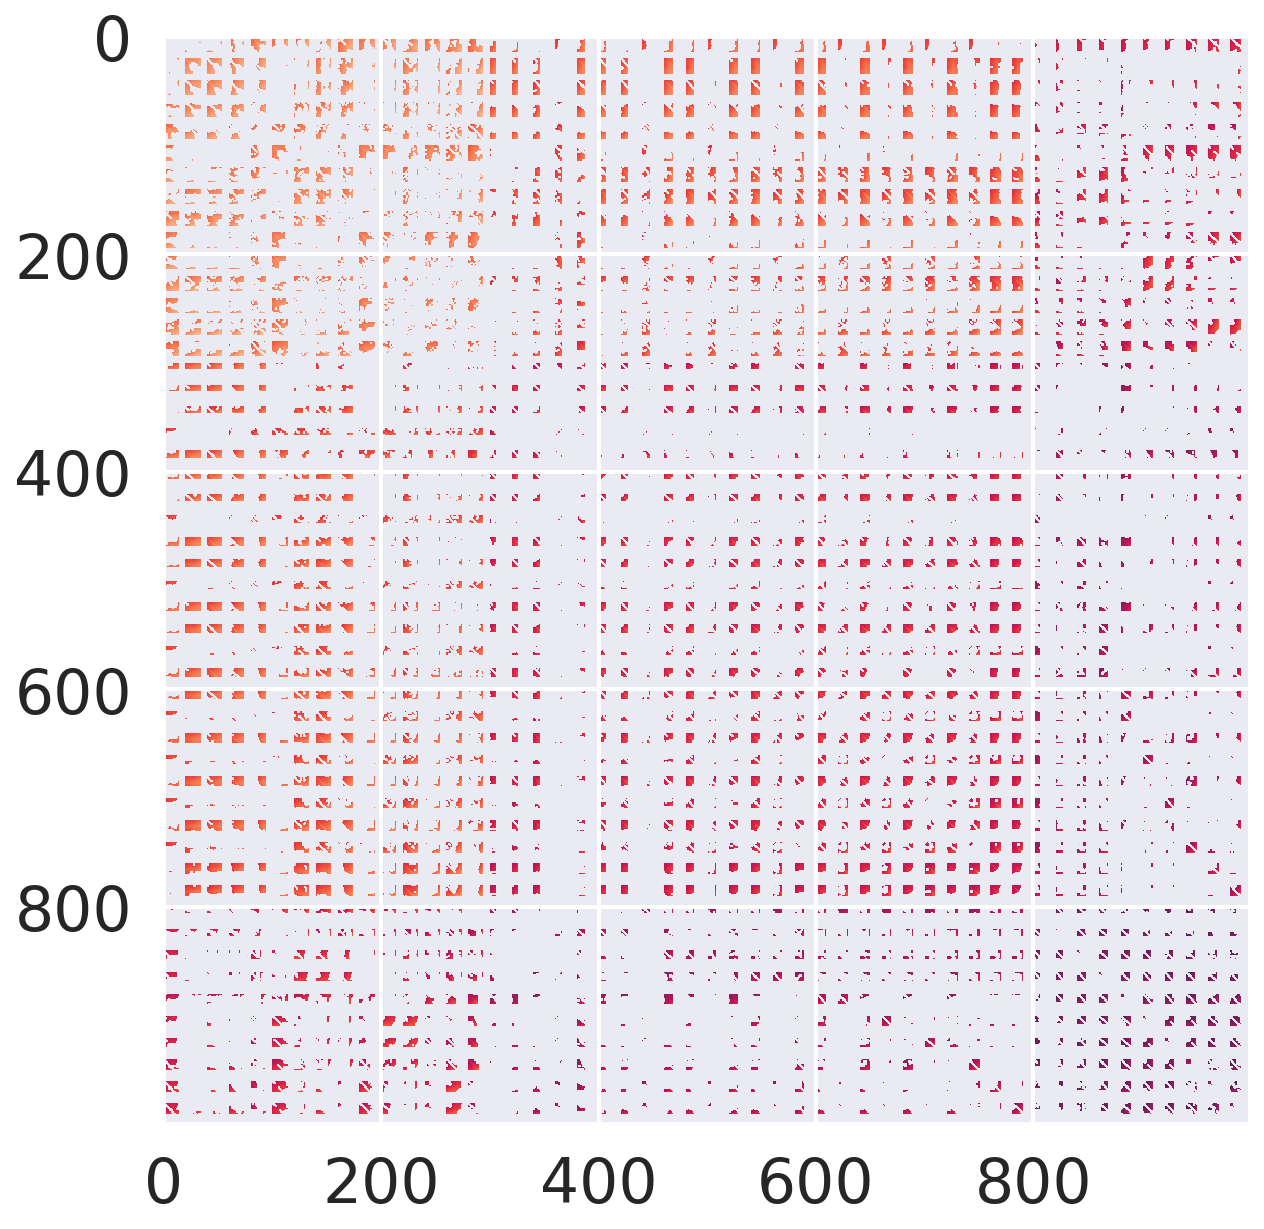

In [105]:
plt.imshow(np.log(obj.invcov))

In [2]:
d = {'ss': 'sl+ll',
     'sl': 'ss+ll',
     'll': 'ss+sl'}
for k, v in list(d.items()):
    d[v] = k

In [3]:
d

{'ss': 'sl+ll',
 'sl': 'ss+ll',
 'll': 'ss+sl',
 'sl+ll': 'ss',
 'ss+ll': 'sl',
 'ss+sl': 'll'}

In [116]:
fishers = {}
fishers['fid'] = obj.fisher
for exclusions in [['ss'], ['sl'], ['ll'], ['ss', 'sl'], ['ss', 'll'], ['sl', 'll']]:
    obj.masked = exclusions
    fishers['+'.join(exclusions)] = obj.getFisher()

Building fisher matrix
Building fisher matrix
Building fisher matrix
Building fisher matrix
Building fisher matrix
Building fisher matrix


In [14]:
obj.param_order = ['omega_m', 'sigma_8', 'n_s', 'w_0', 'w_a', 'omega_b', 'h', 'A0', 'beta', 'etal', 'etah'] + ['zbias'+str(i) for i in range(1, 6)] + ['zvariance'+str(i) for i in range(1,6)] + ['zoutlier'+str(i) for i in range(1,6)] 

In [11]:
from itertools import permutations
sns.set_context('paper')
params = ['omega_m', 'omega_b', 'h', 'sigma_8', 'n_s', 'w_0', 'w_a']
a = np.array(list(permutations(params, 2)))
a = a.reshape(7, 7-1, 2)

In [45]:
lims = {
    'omega_m': (0.2, 0.4),
    'omega_b': (0.035, 0.065),
    'sigma_8': (0.72, 0.93),
    'h':(0.45, 0.74),
    'n_s': (0.85, 1.06),
    'w_0': (-2.1, 0.1),
    'w_a': (-3, 3)
}

In [13]:
def dif(c):
    a, b = c
    return b-a

In [47]:
pickle.dump(fishers, open('maskedFishers.p', 'wb'))

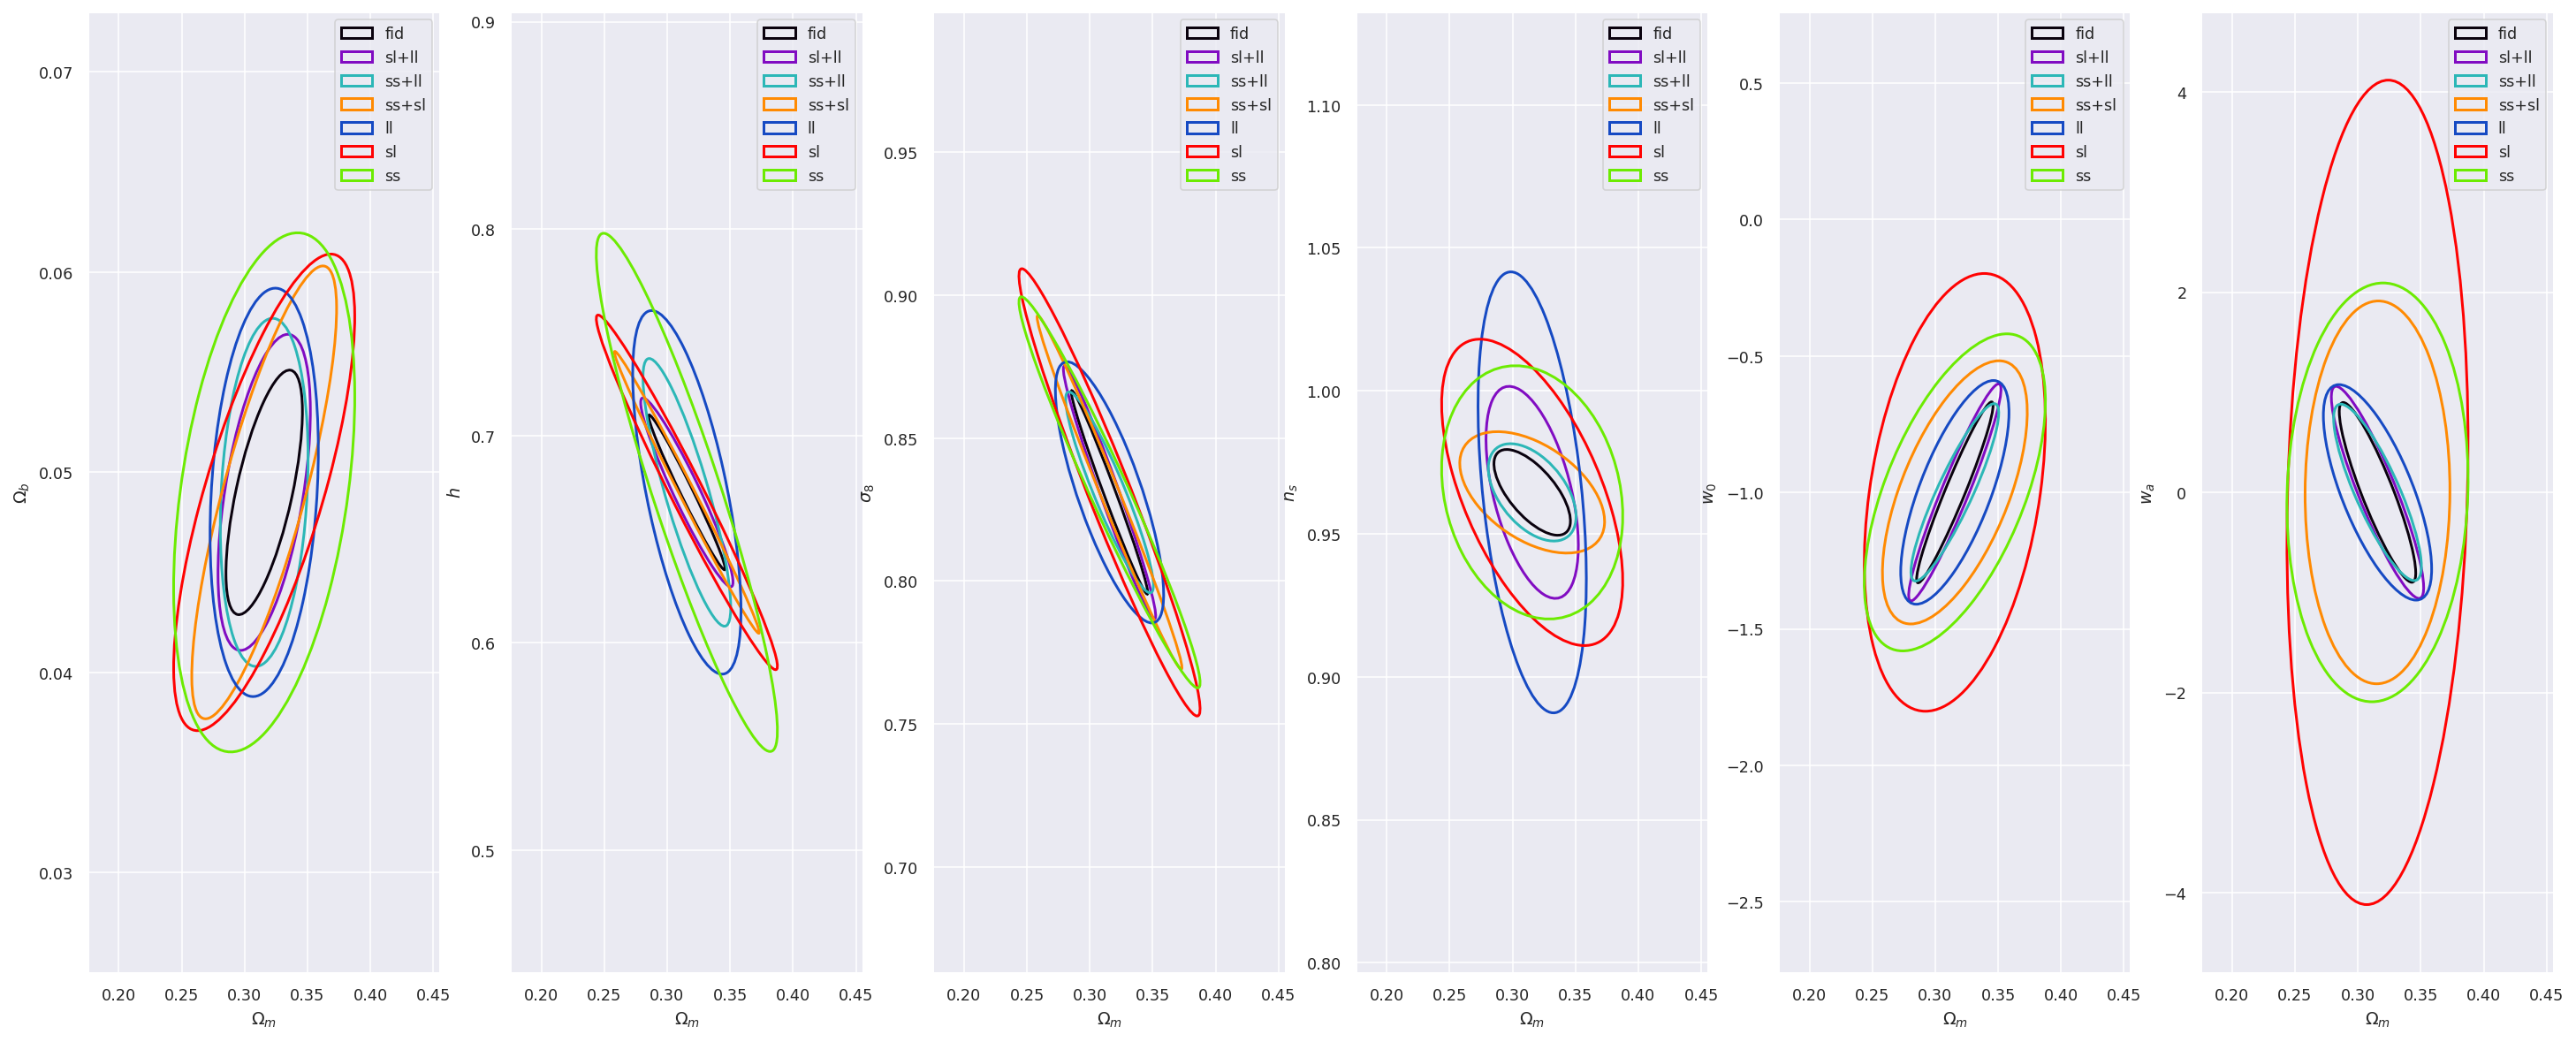

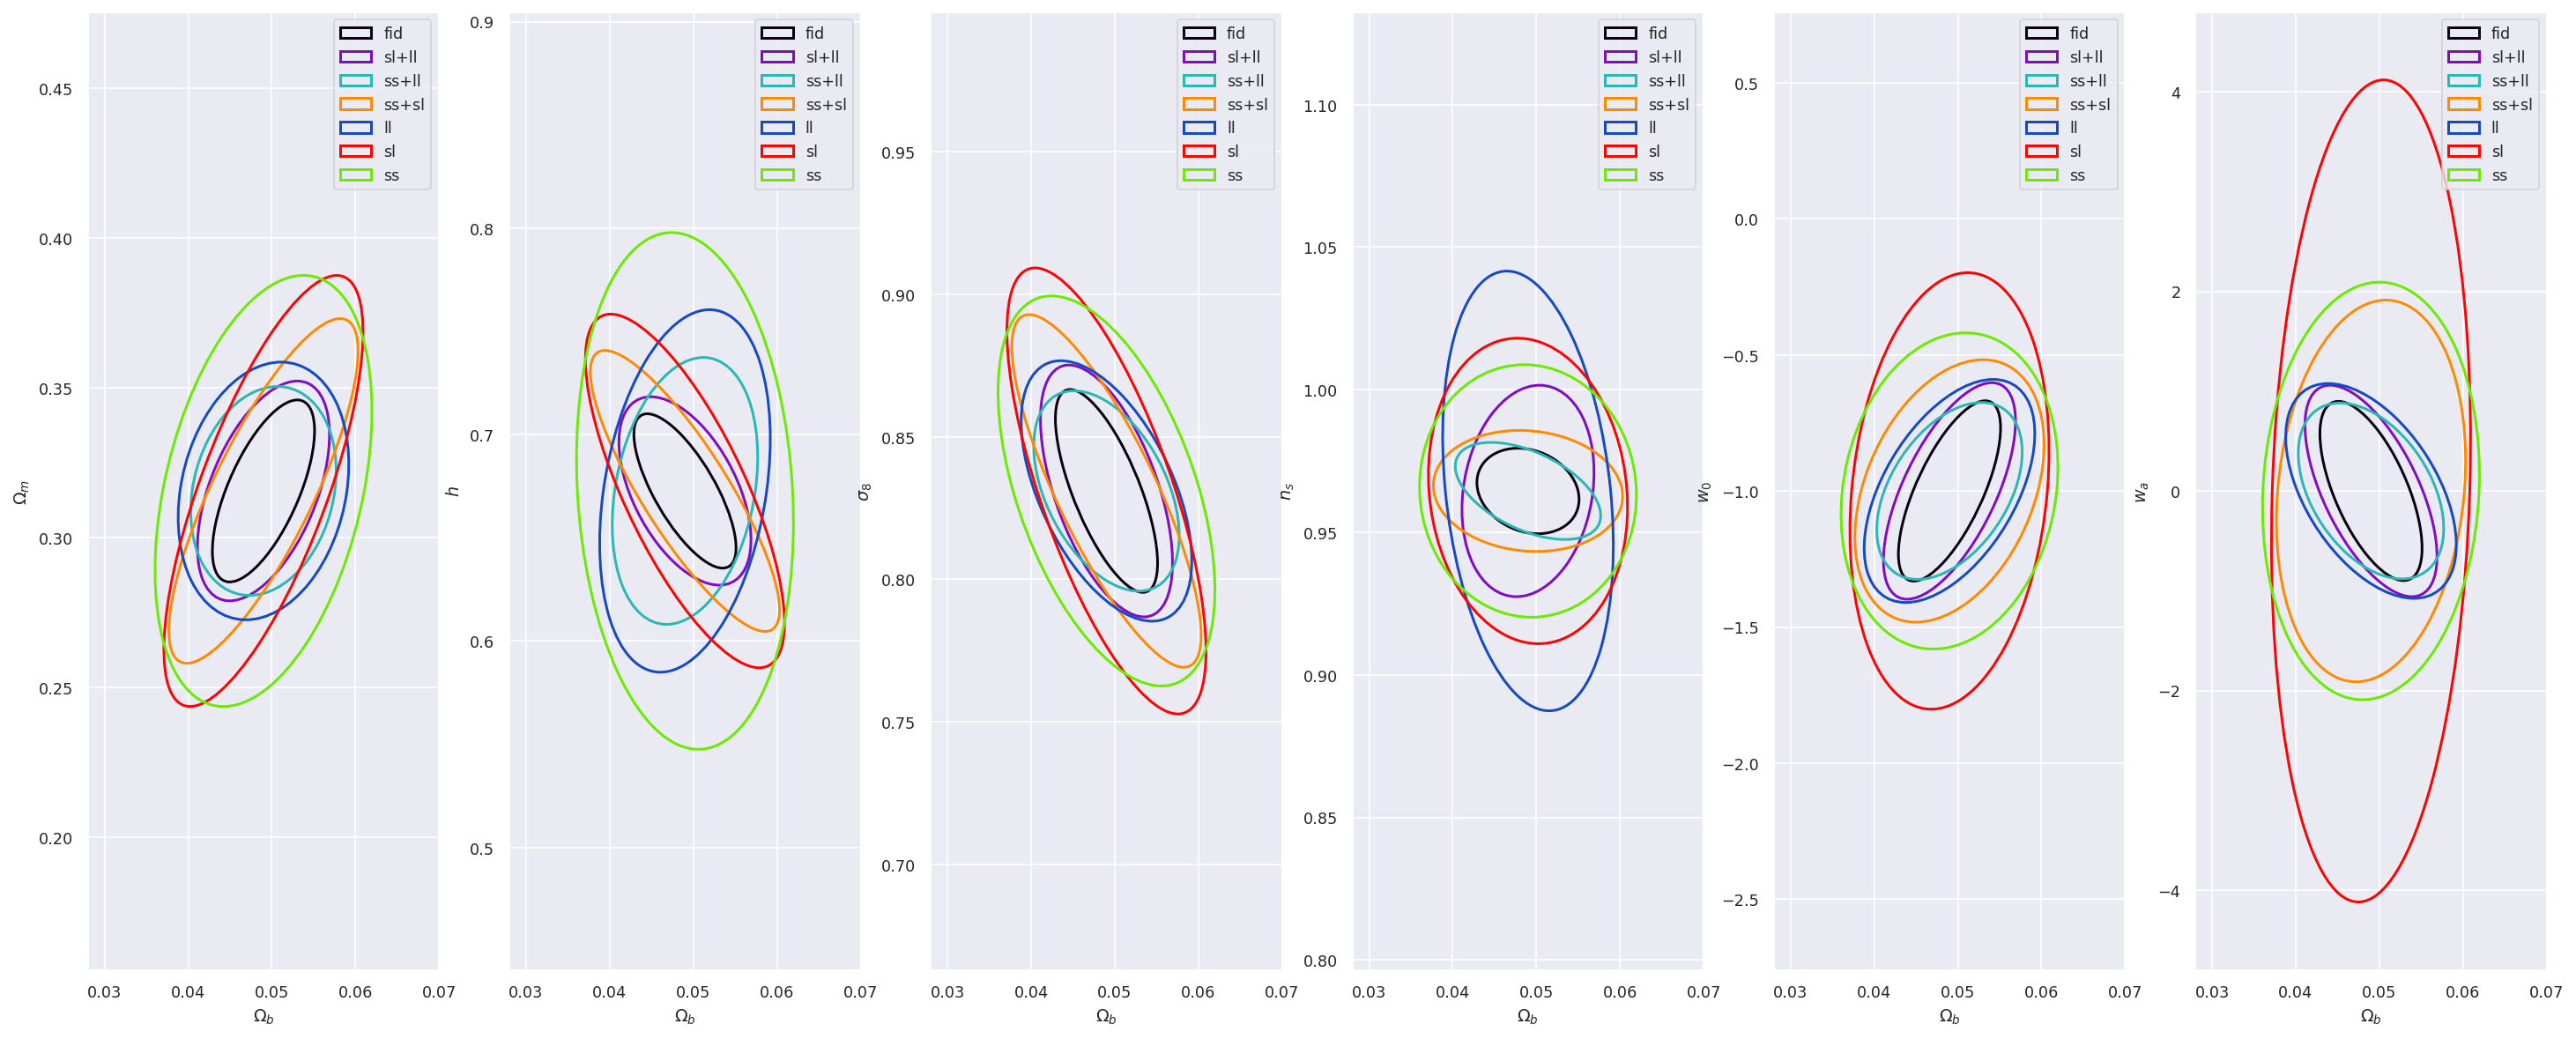

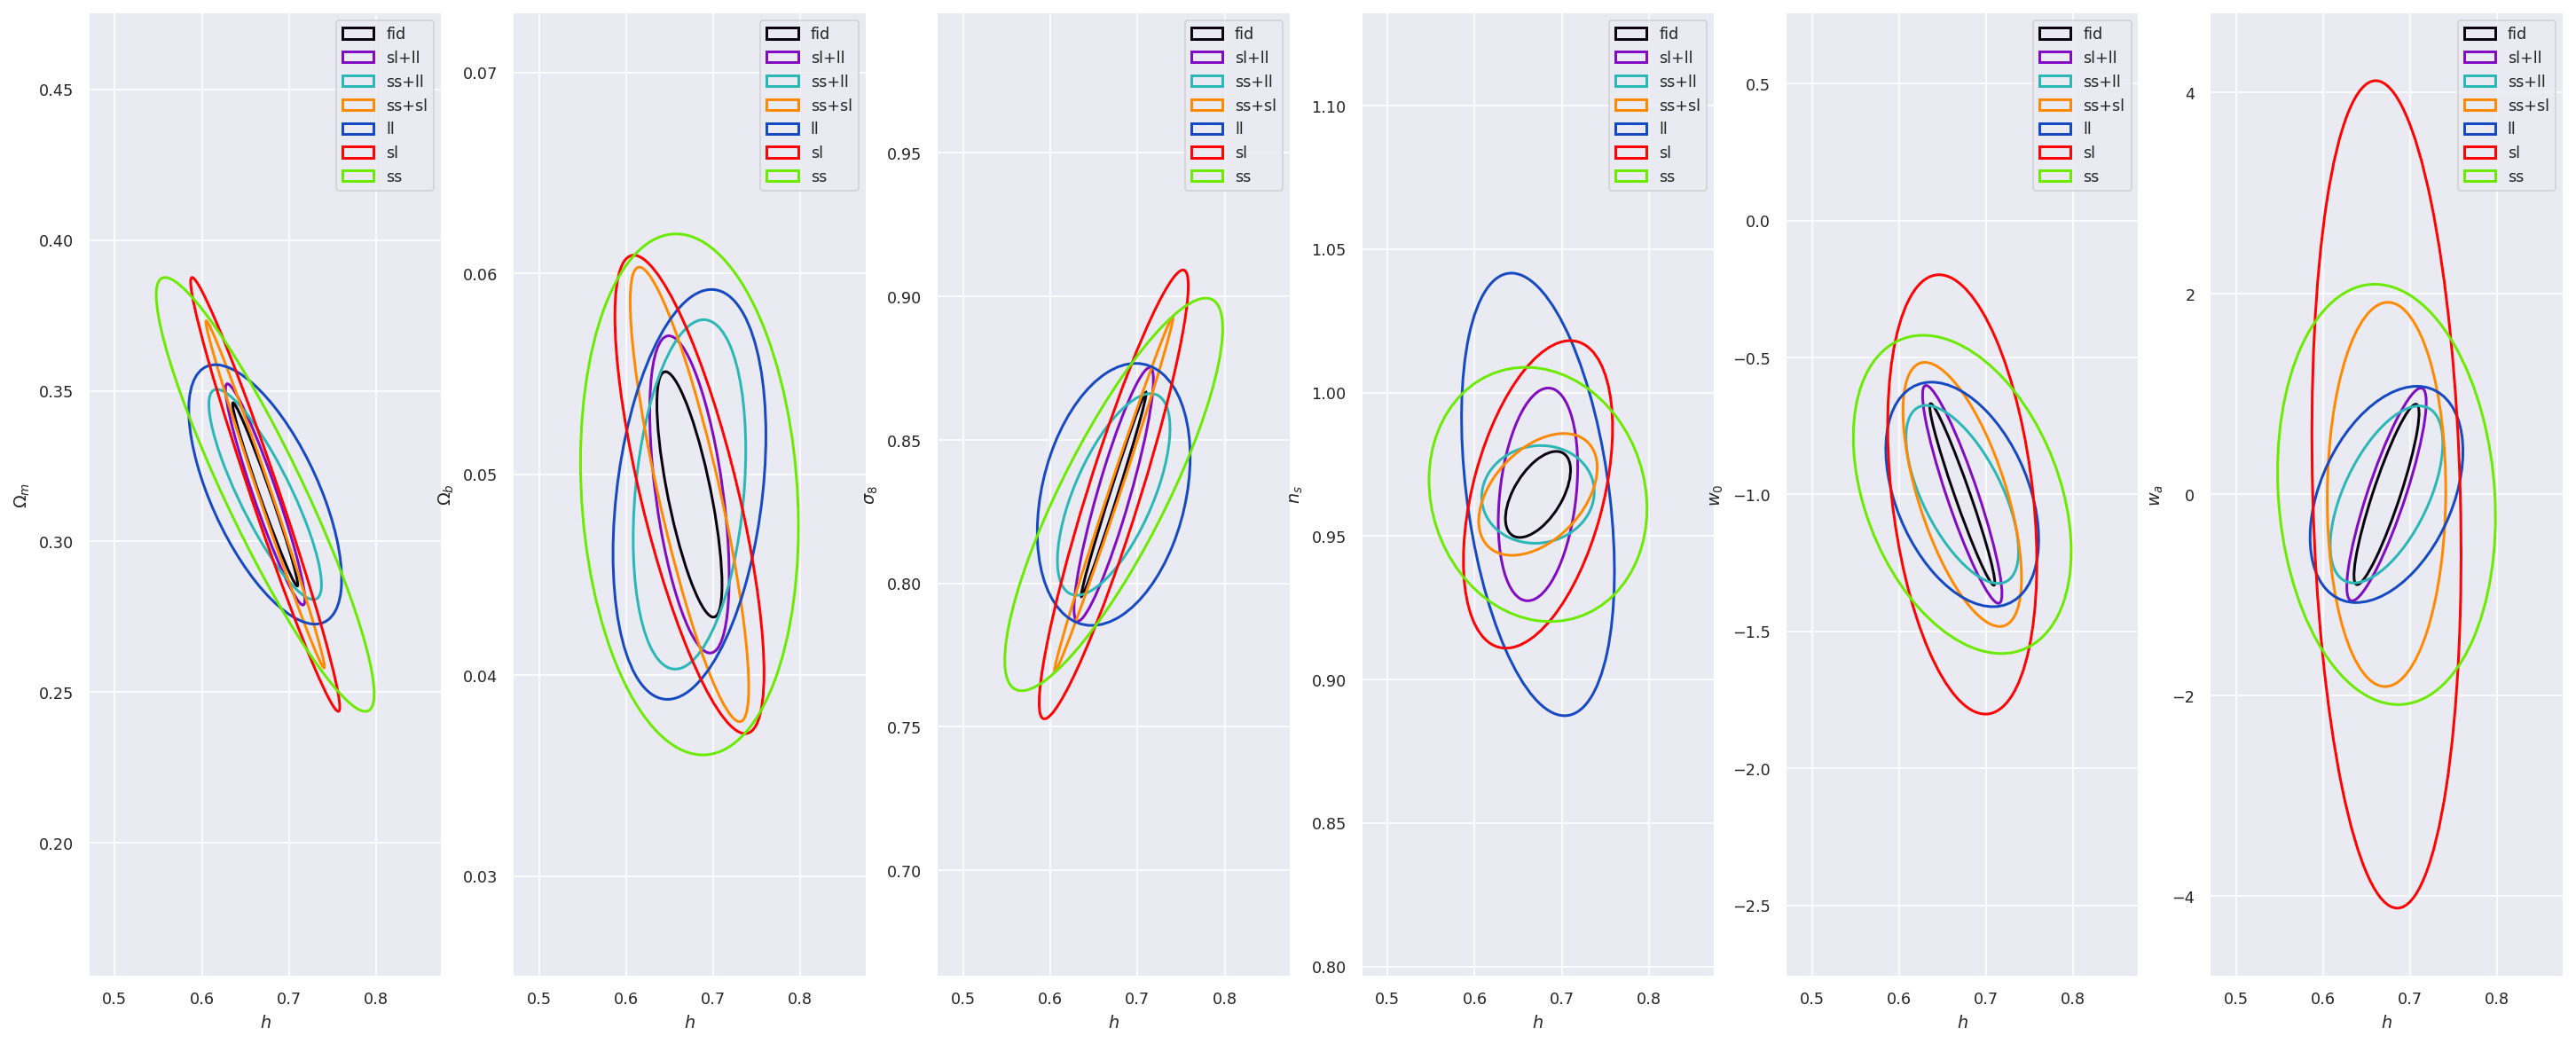

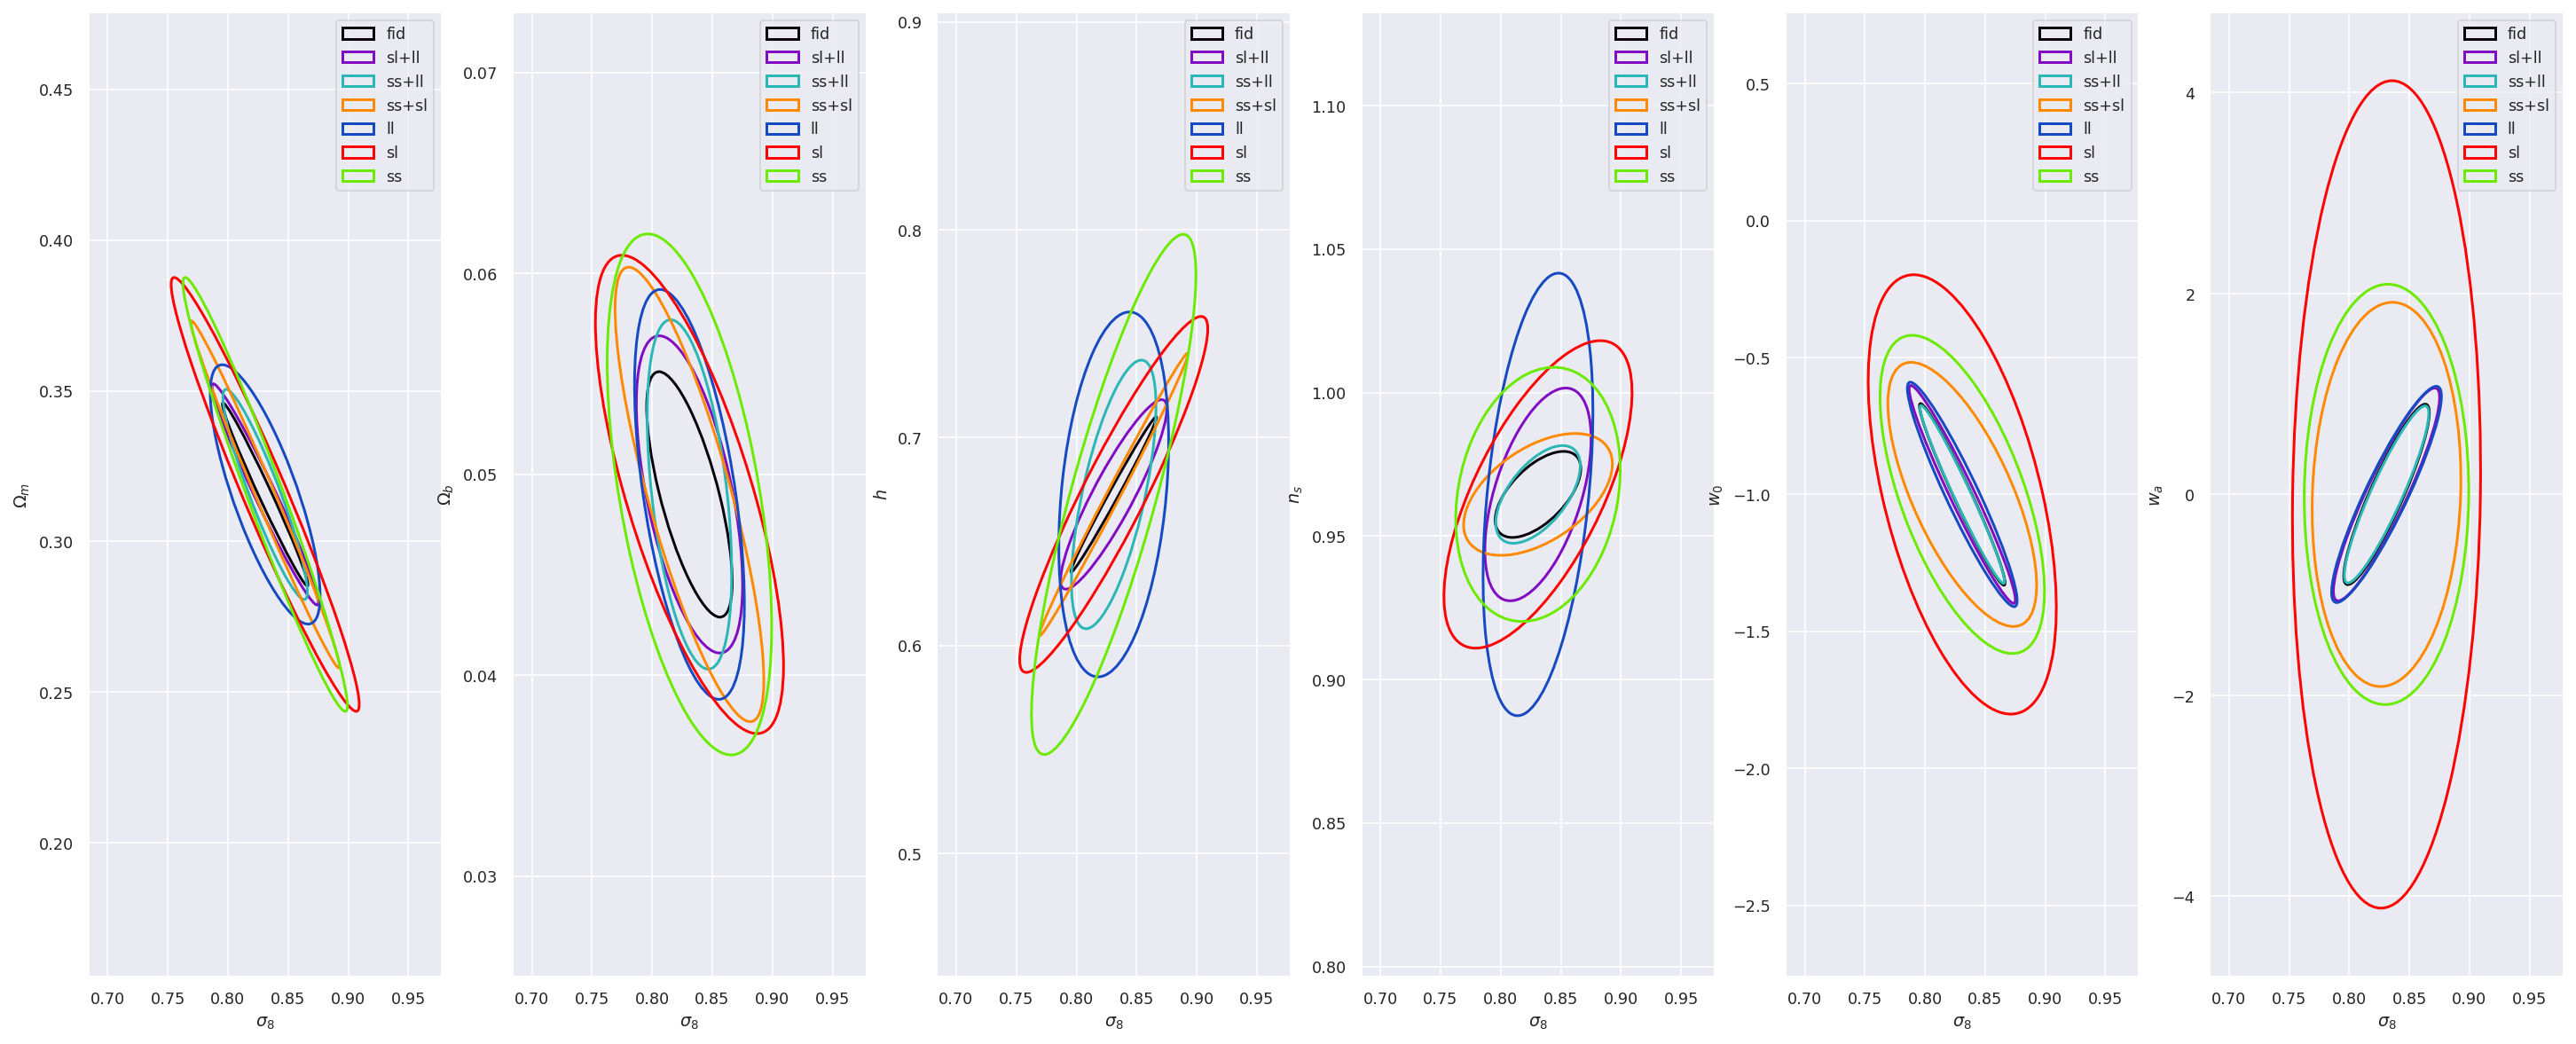

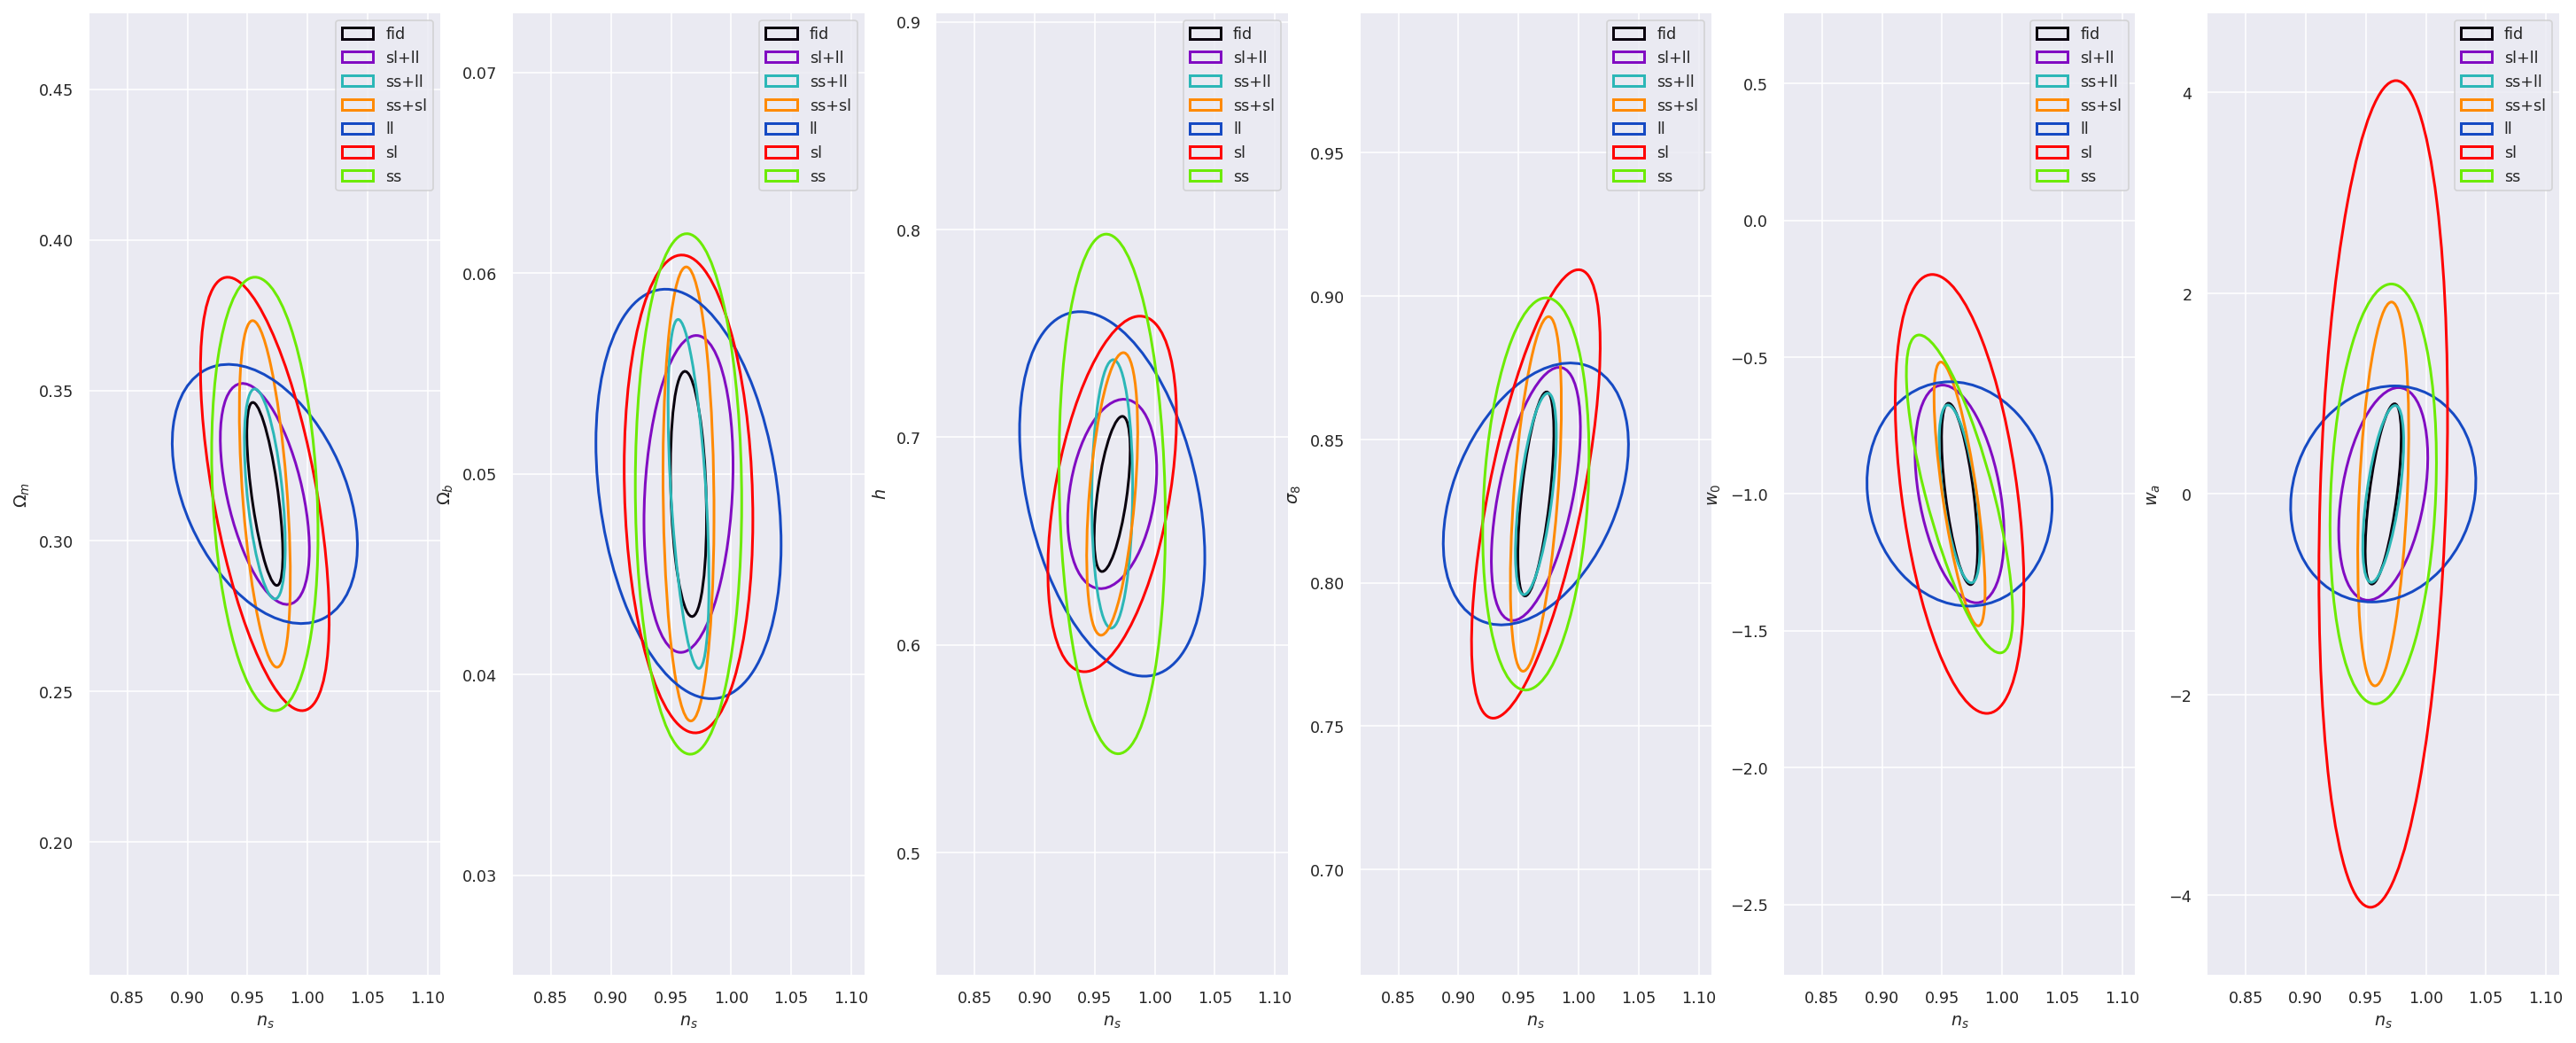

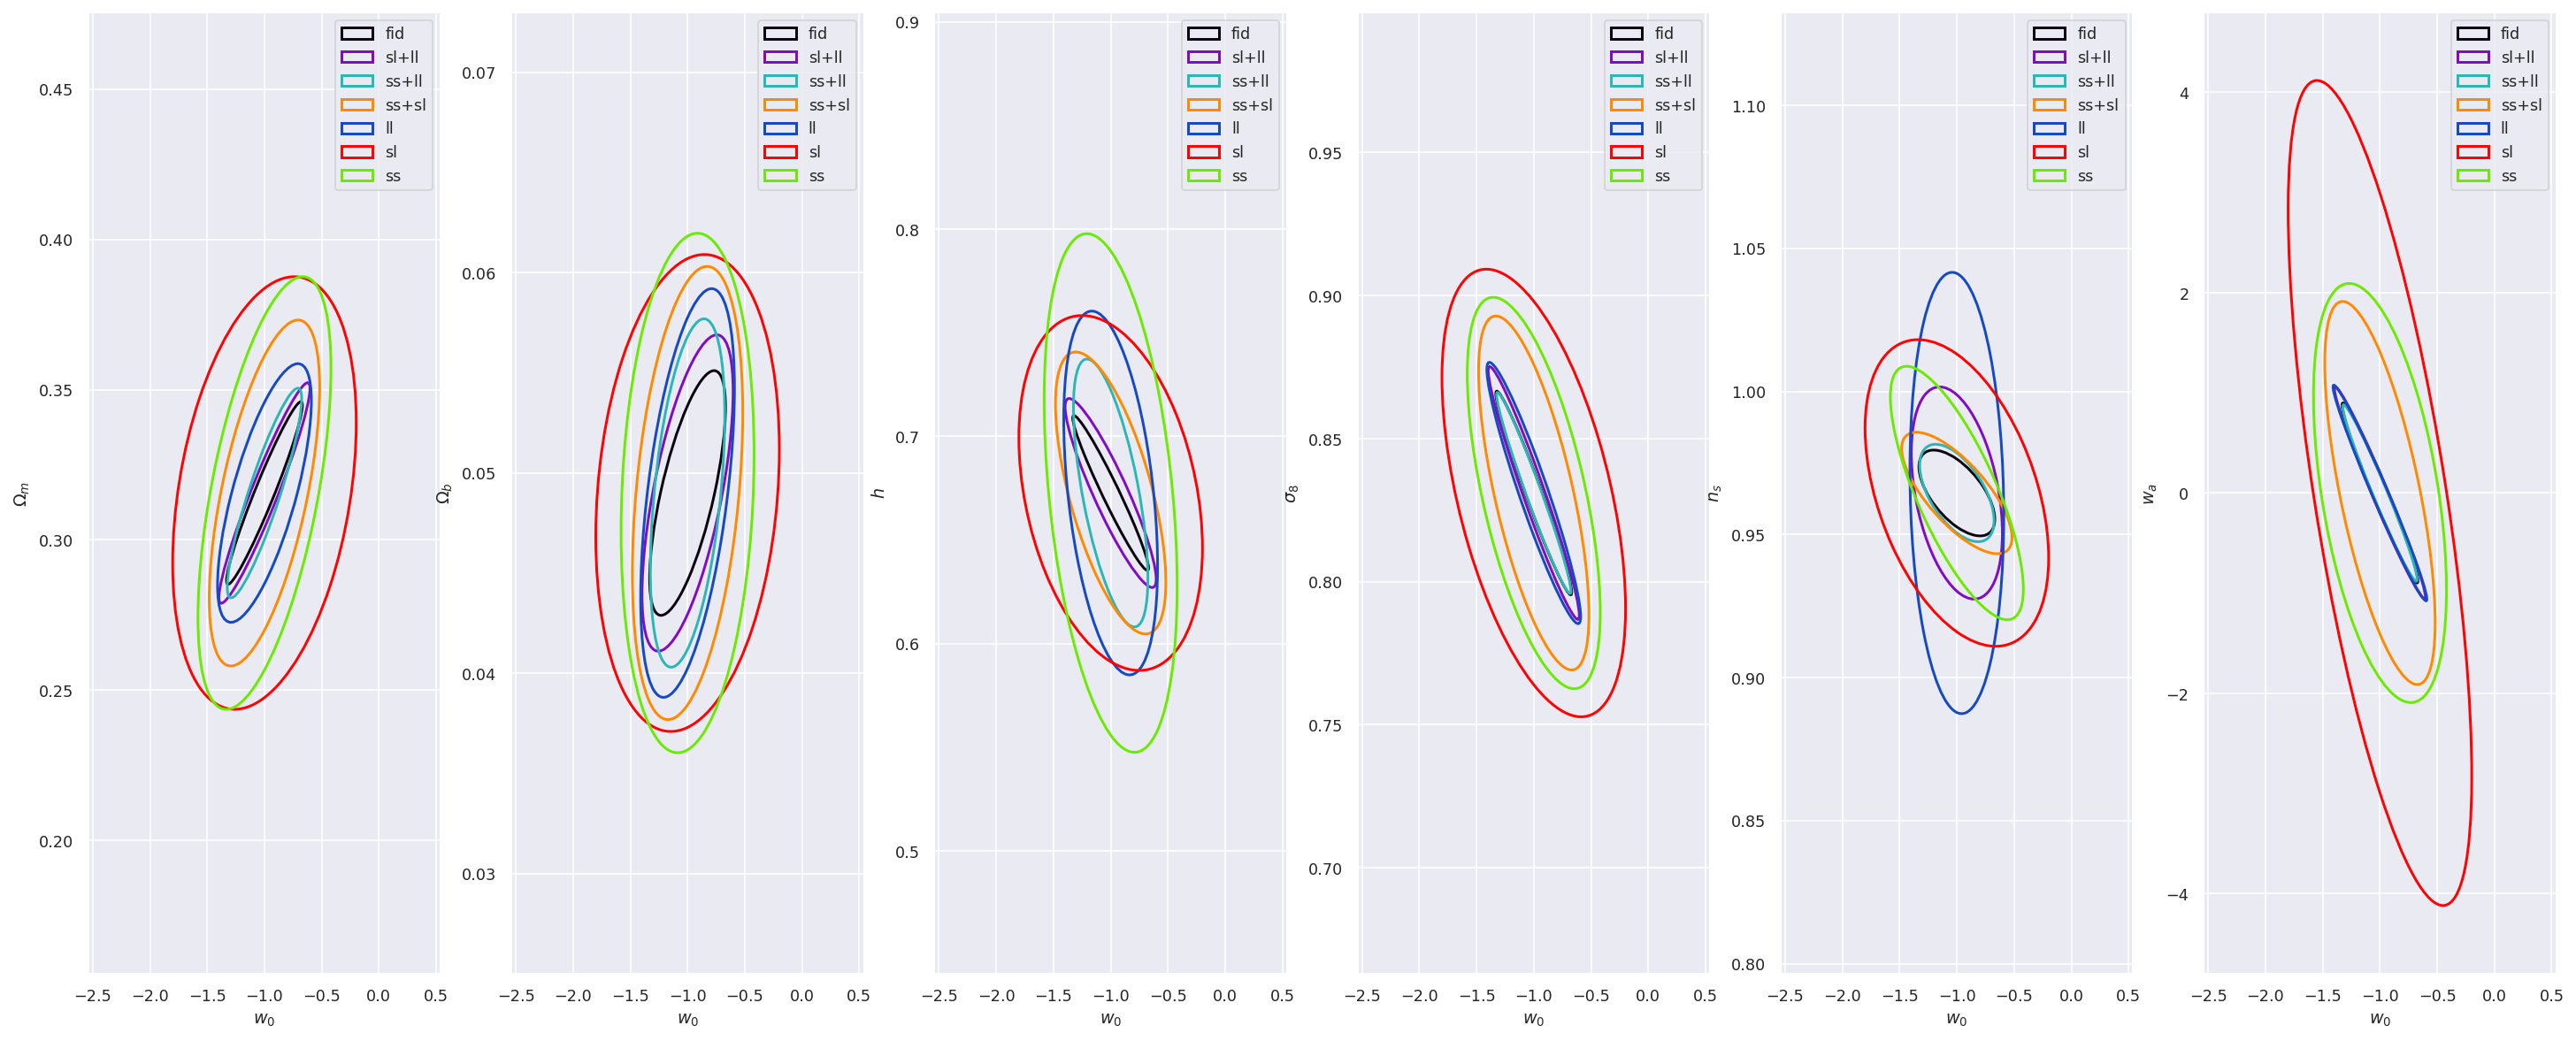

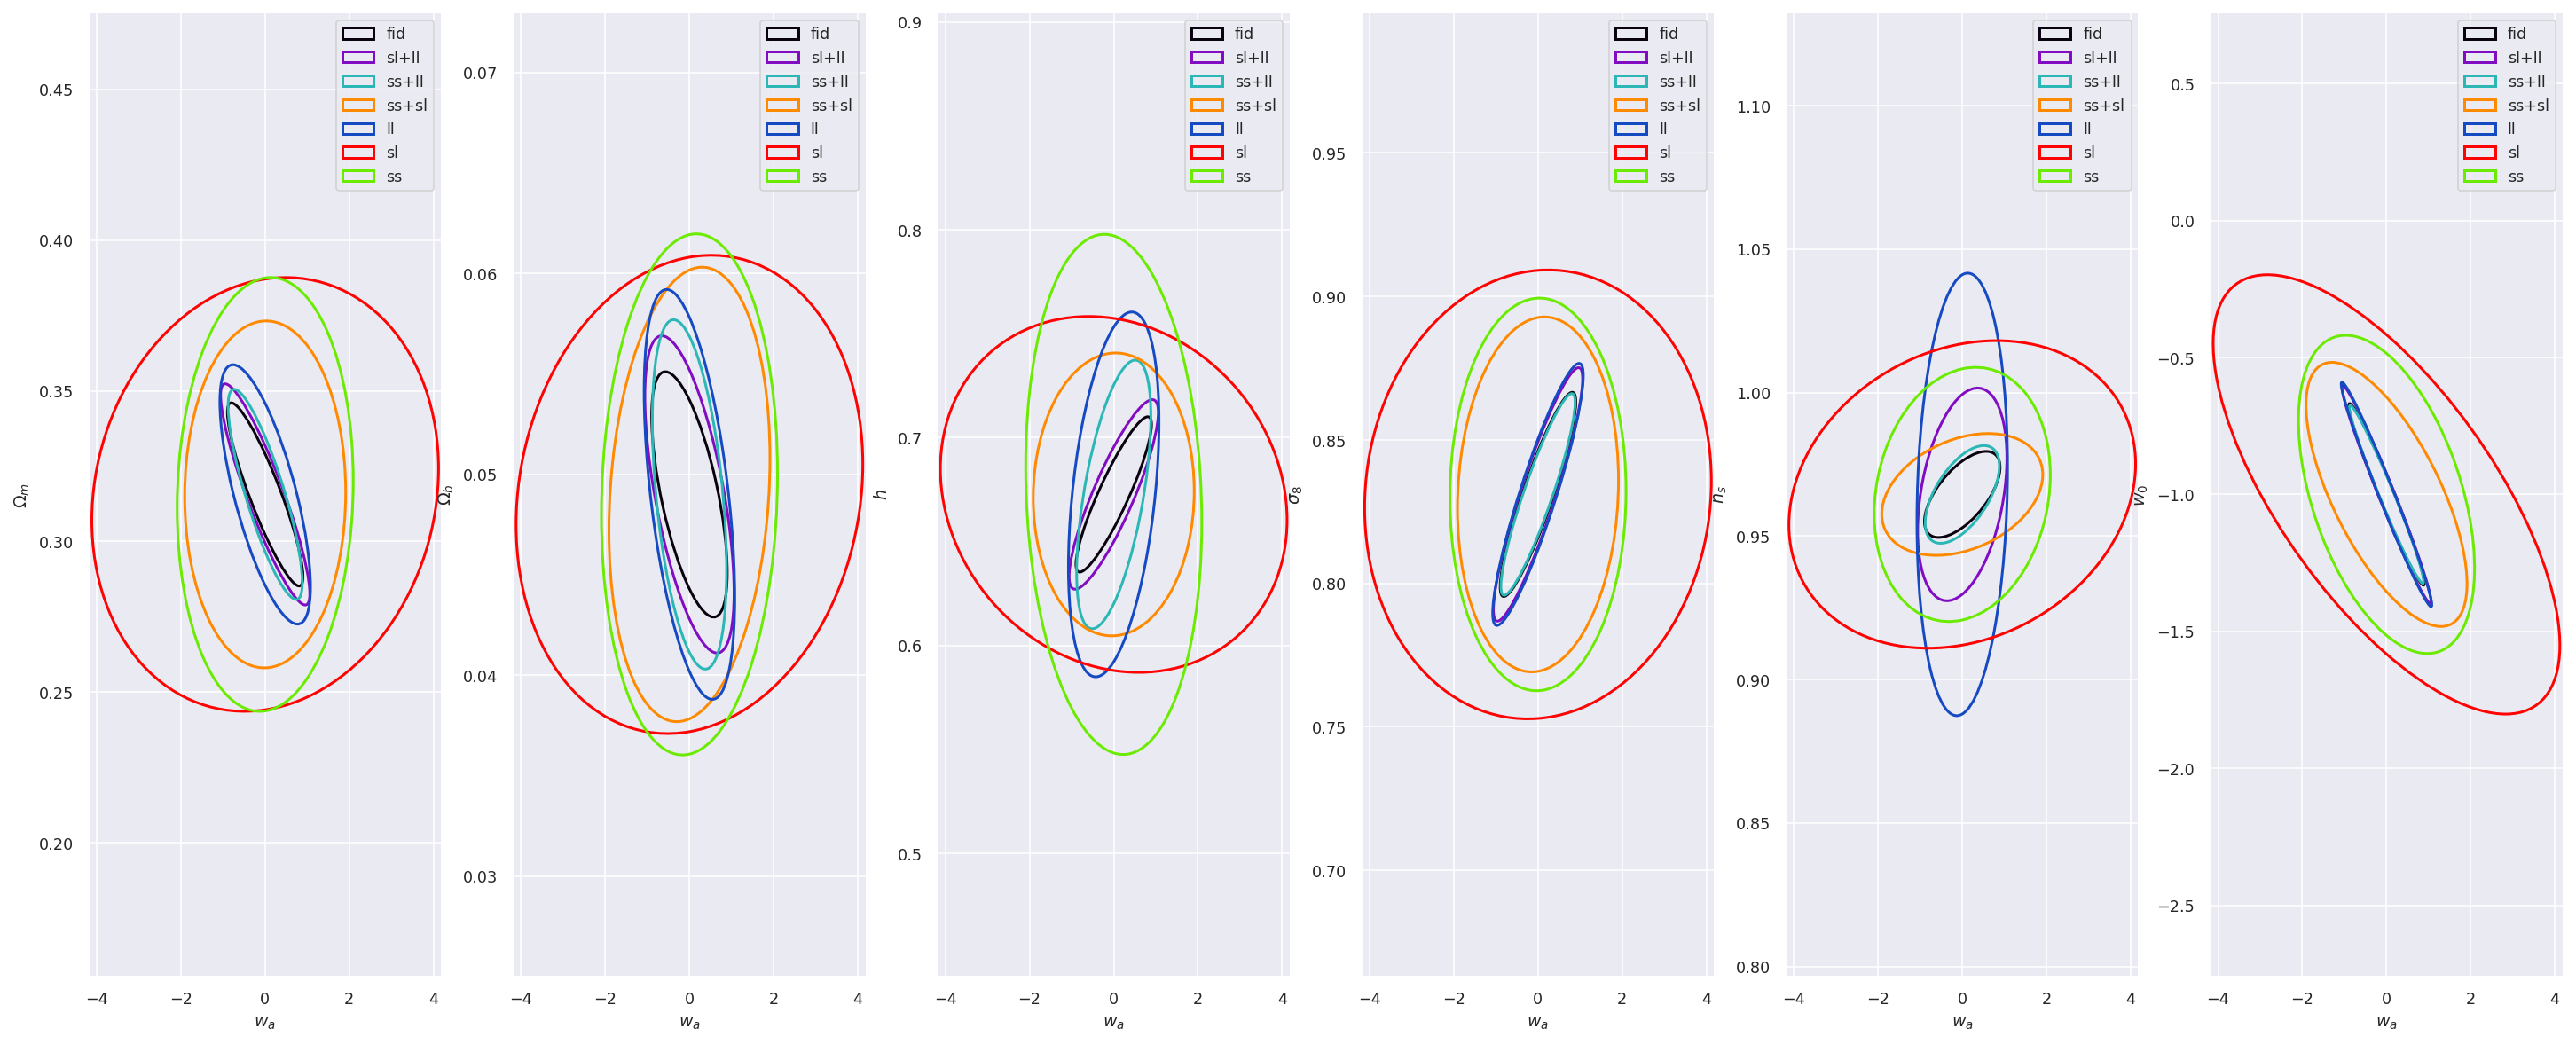

In [46]:
arg = obj
for paramset in a:
    fig, ax = plt.subplots(1, 6)
    for j, params in enumerate(paramset):
        es = []
        labels = []
        
        colors = sns.color_palette(list(reversed(['#6CEB02', '#FF0202', '#164AC3', '#FF8A02', '#2CB7B7', '#810CC2', '#0A020E'])))
        for i, (k,v) in enumerate(fishers.items()):
            matrix = v
            if k != 'fid':
                labels.append(d[k])
            else:
                labels.append(k)
            color = colors[i]
            fid=(arg.vals[params[0]], arg.vals[params[1]])
            e, (xlim, ylim) = plot_contours(
                marginalize(matrix, 
                            arg.param_order.index(params[0]), 
                            arg.param_order.index(params[1])),
                sigmas=2, fid=fid, edgecolor=color, lw=1.5
                )


            e.set_label(label)
            e.set_edgecolor(color)
            e.set_facecolor('none')
            e.set_alpha(1)
            es.append(e)
            ax[j].add_artist(e)
        ax[j].legend(es, labels)
        ax[j].set_xlim(fid[0] - 0.7*dif(lims[params[0]]), fid[0] + 0.7*dif(lims[params[0]]))
        ax[j].set_ylim(fid[1] - 0.8*dif(lims[params[1]]), fid[1] + 0.8*dif(lims[params[1]]))
        ax[j].set_xlabel(arg.param_labels[arg.param_order.index(params[0])])
        ax[j].set_ylabel(arg.param_labels[arg.param_order.index(params[1])])




/tmp/ipykernel_28648/1812968311.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


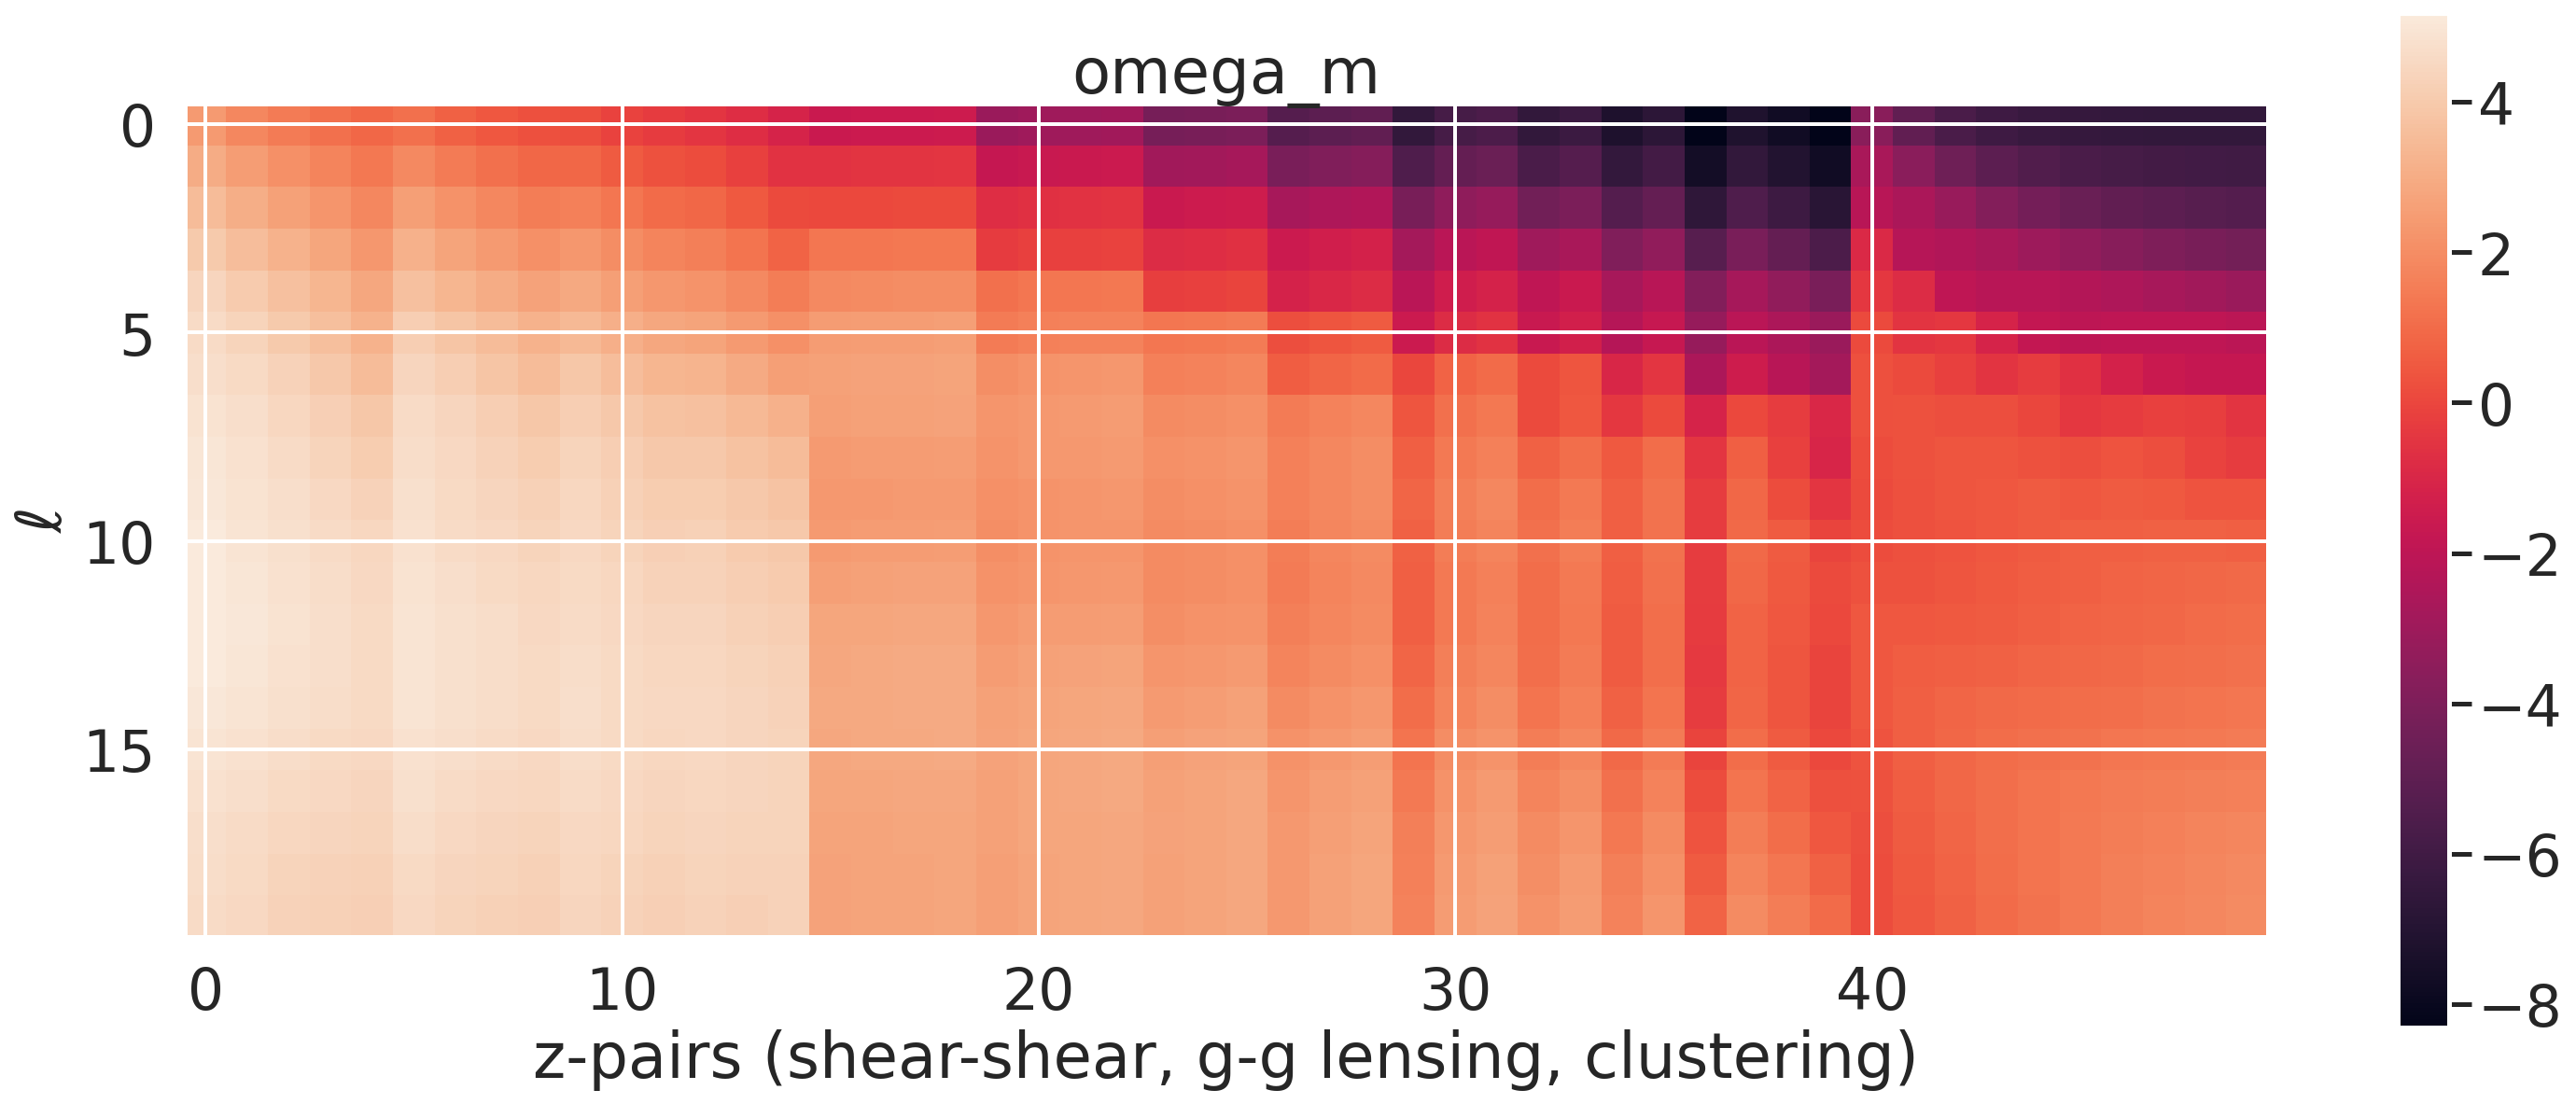

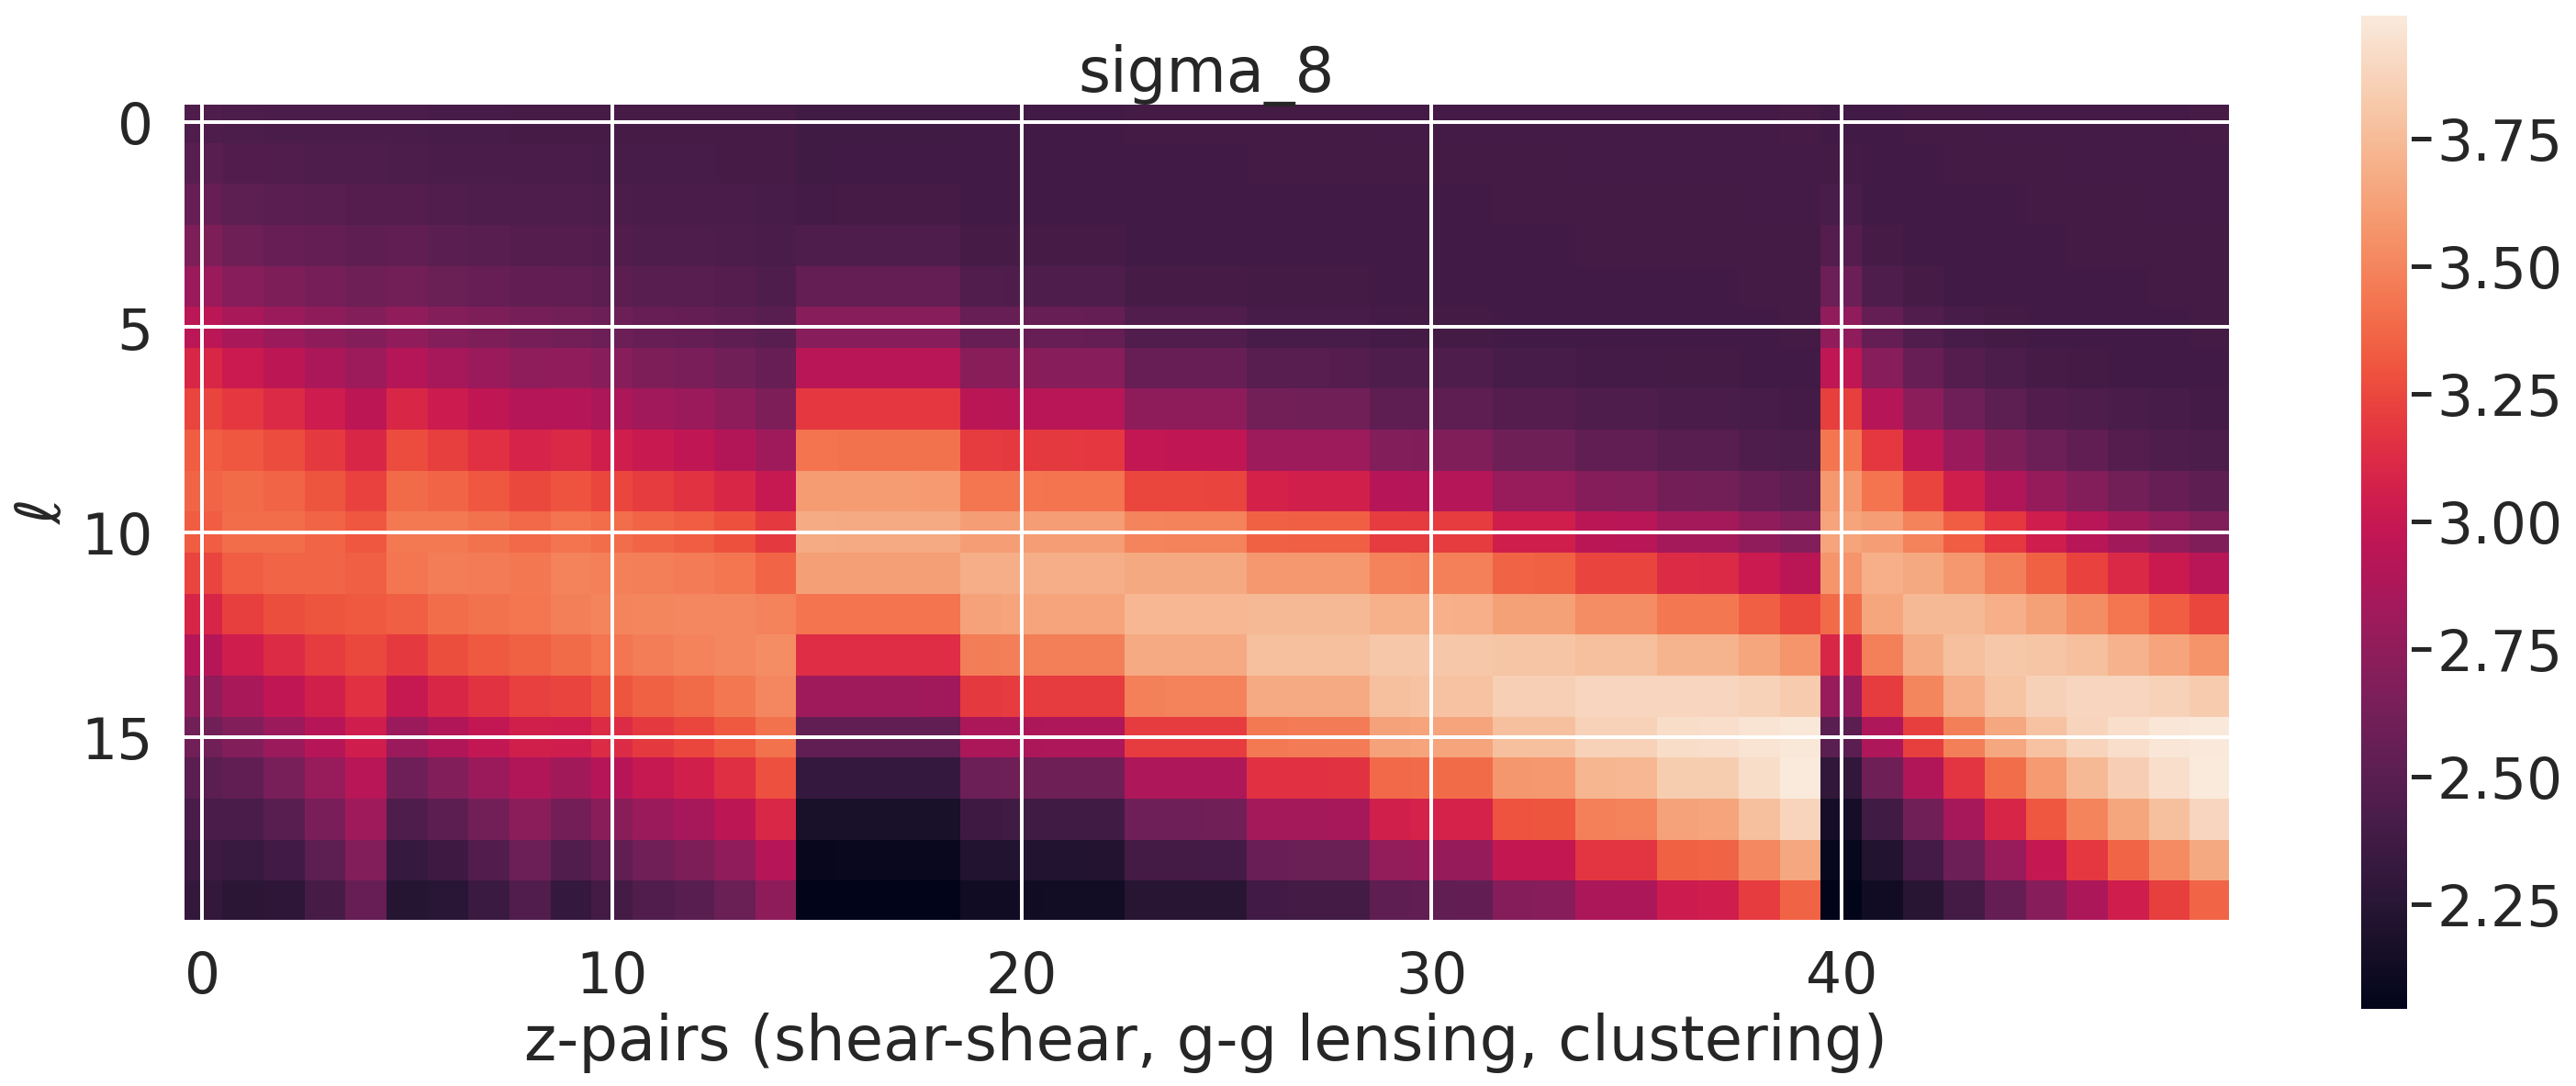

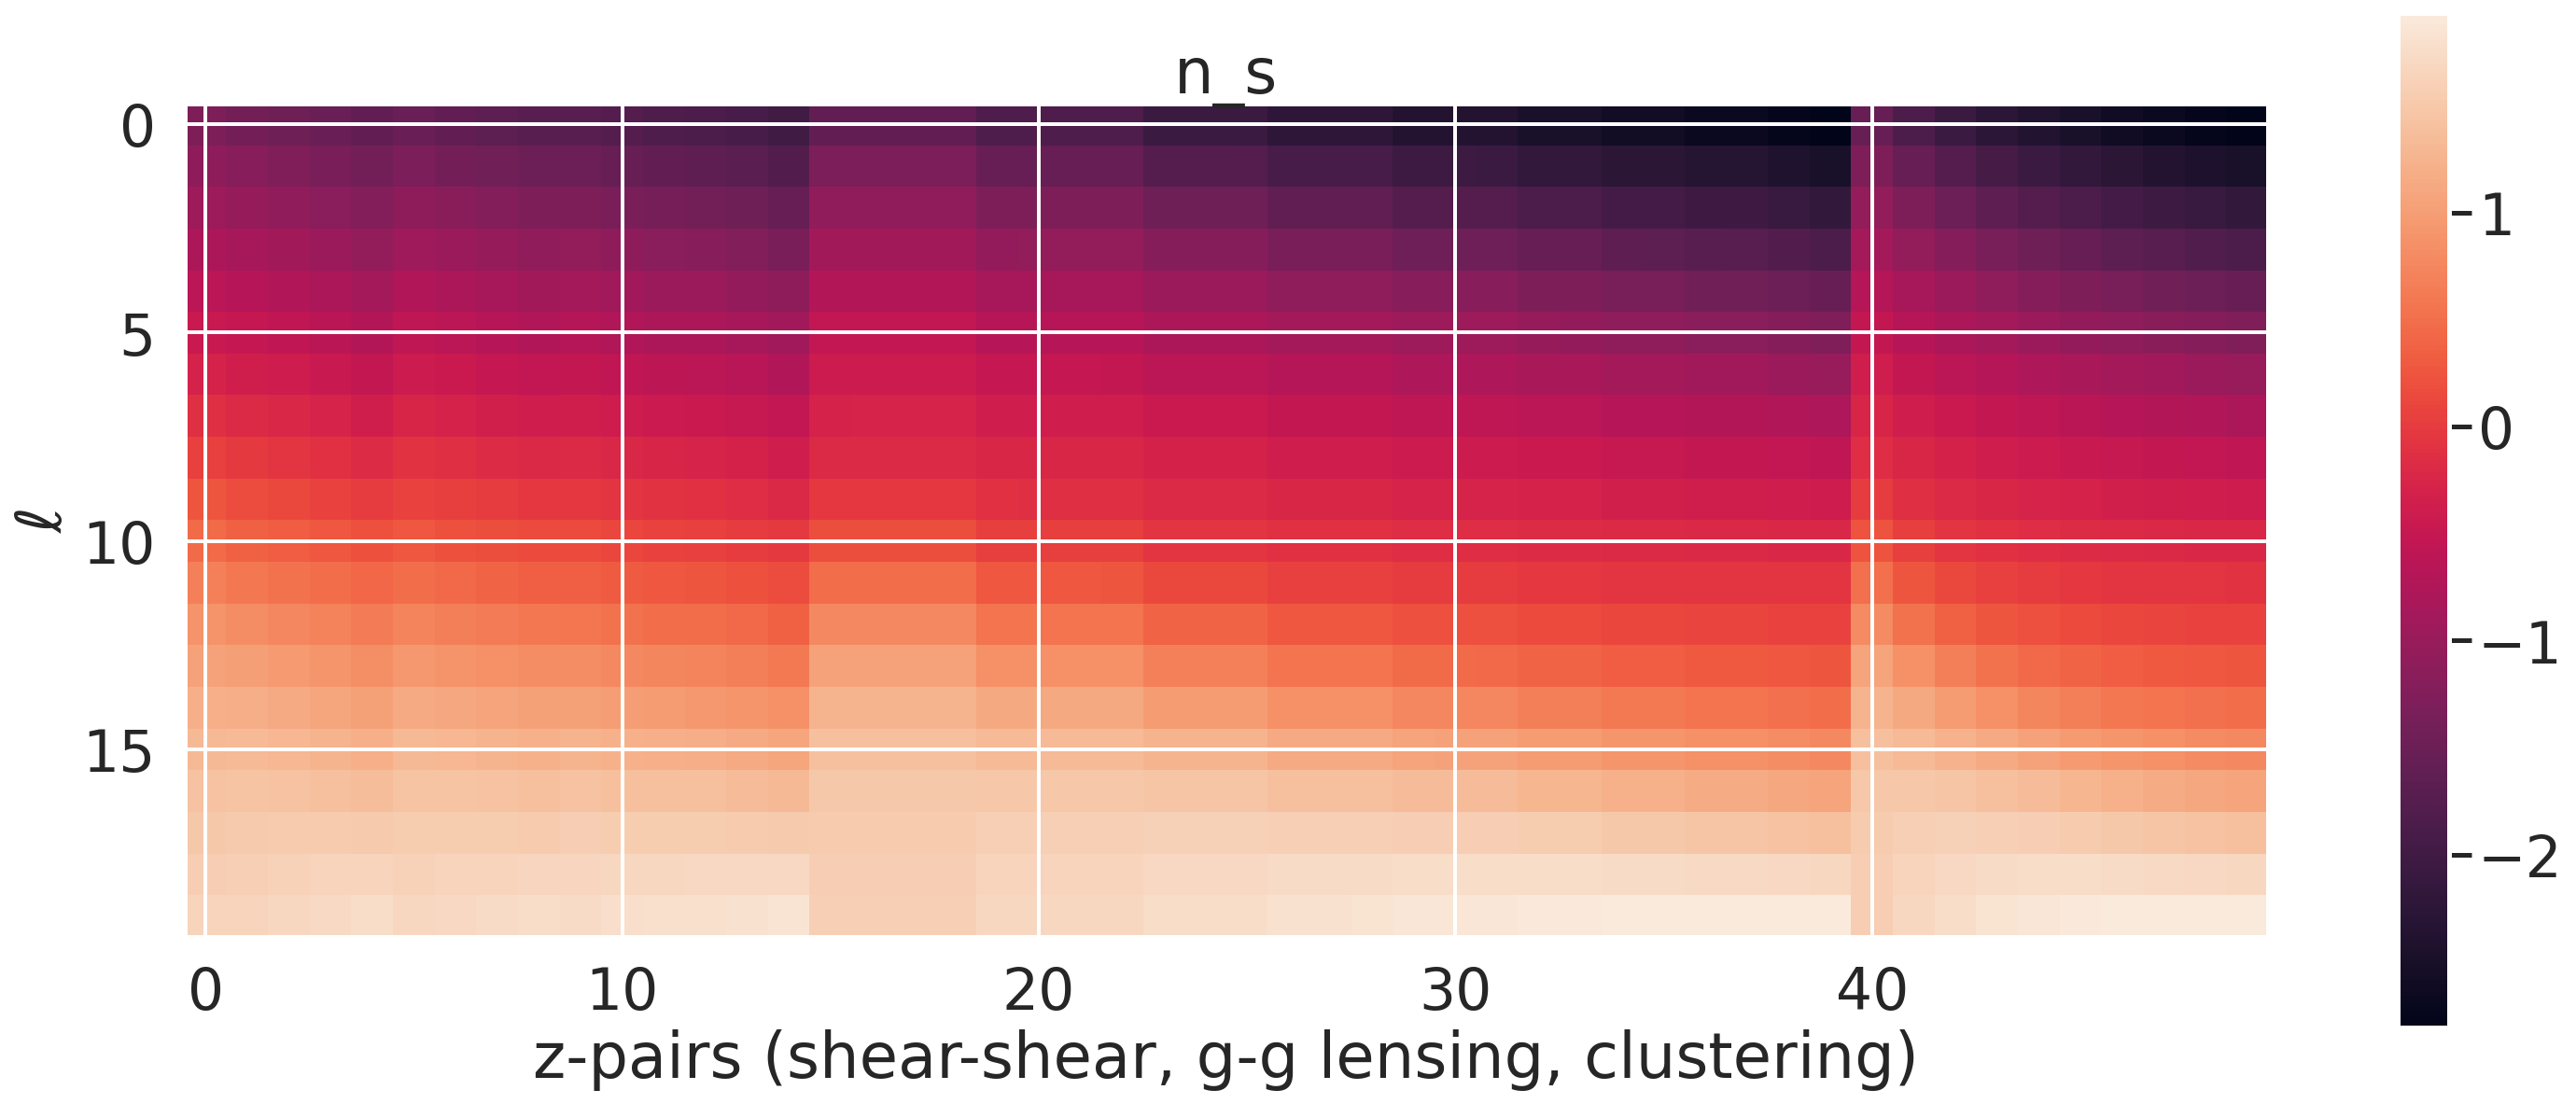

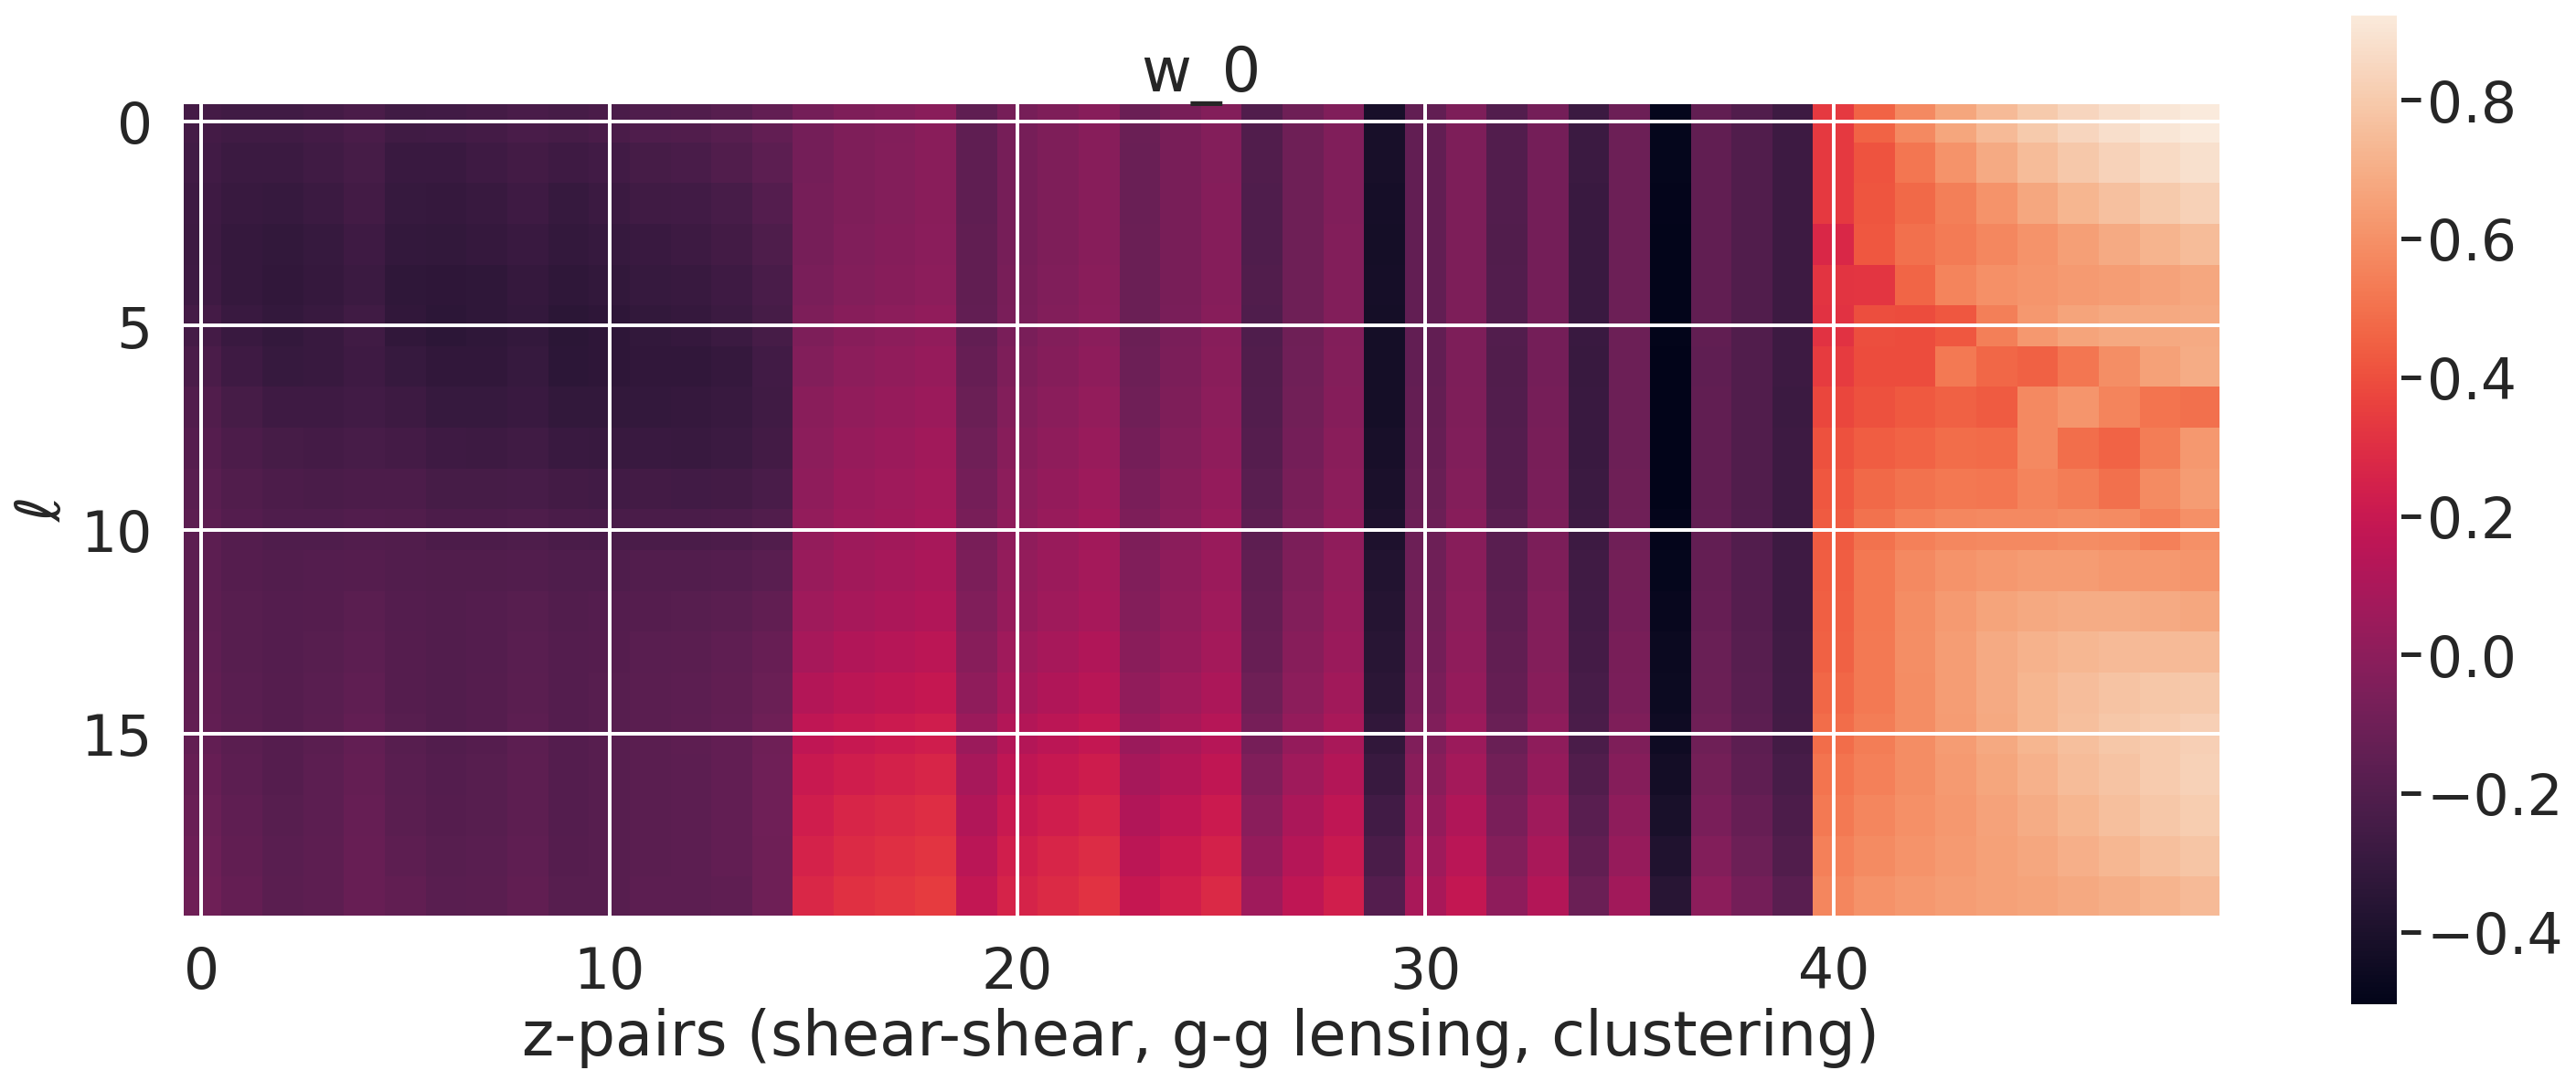

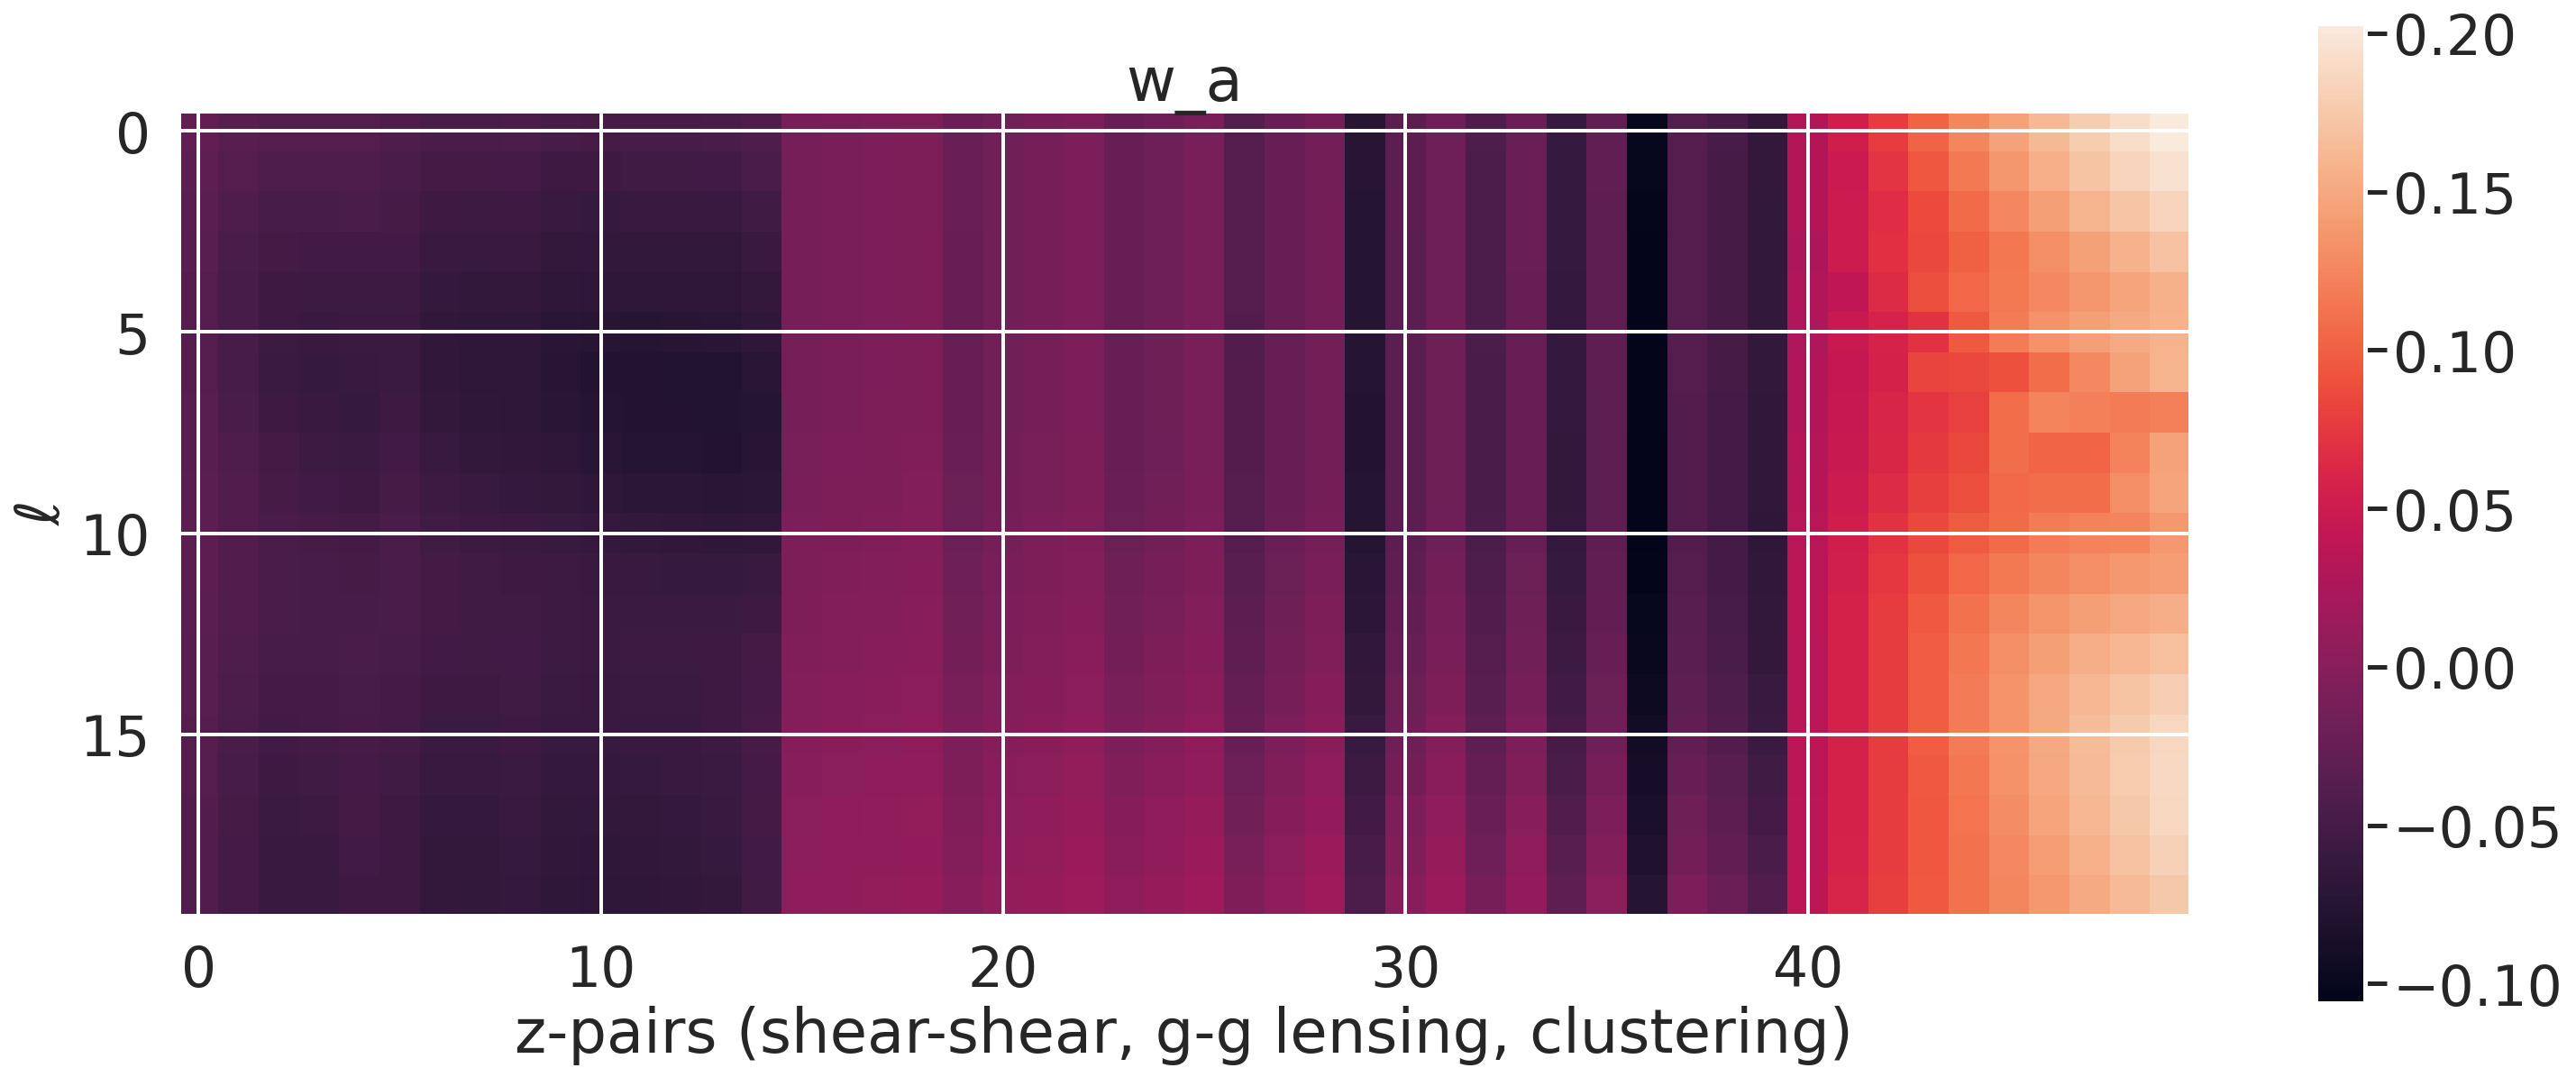

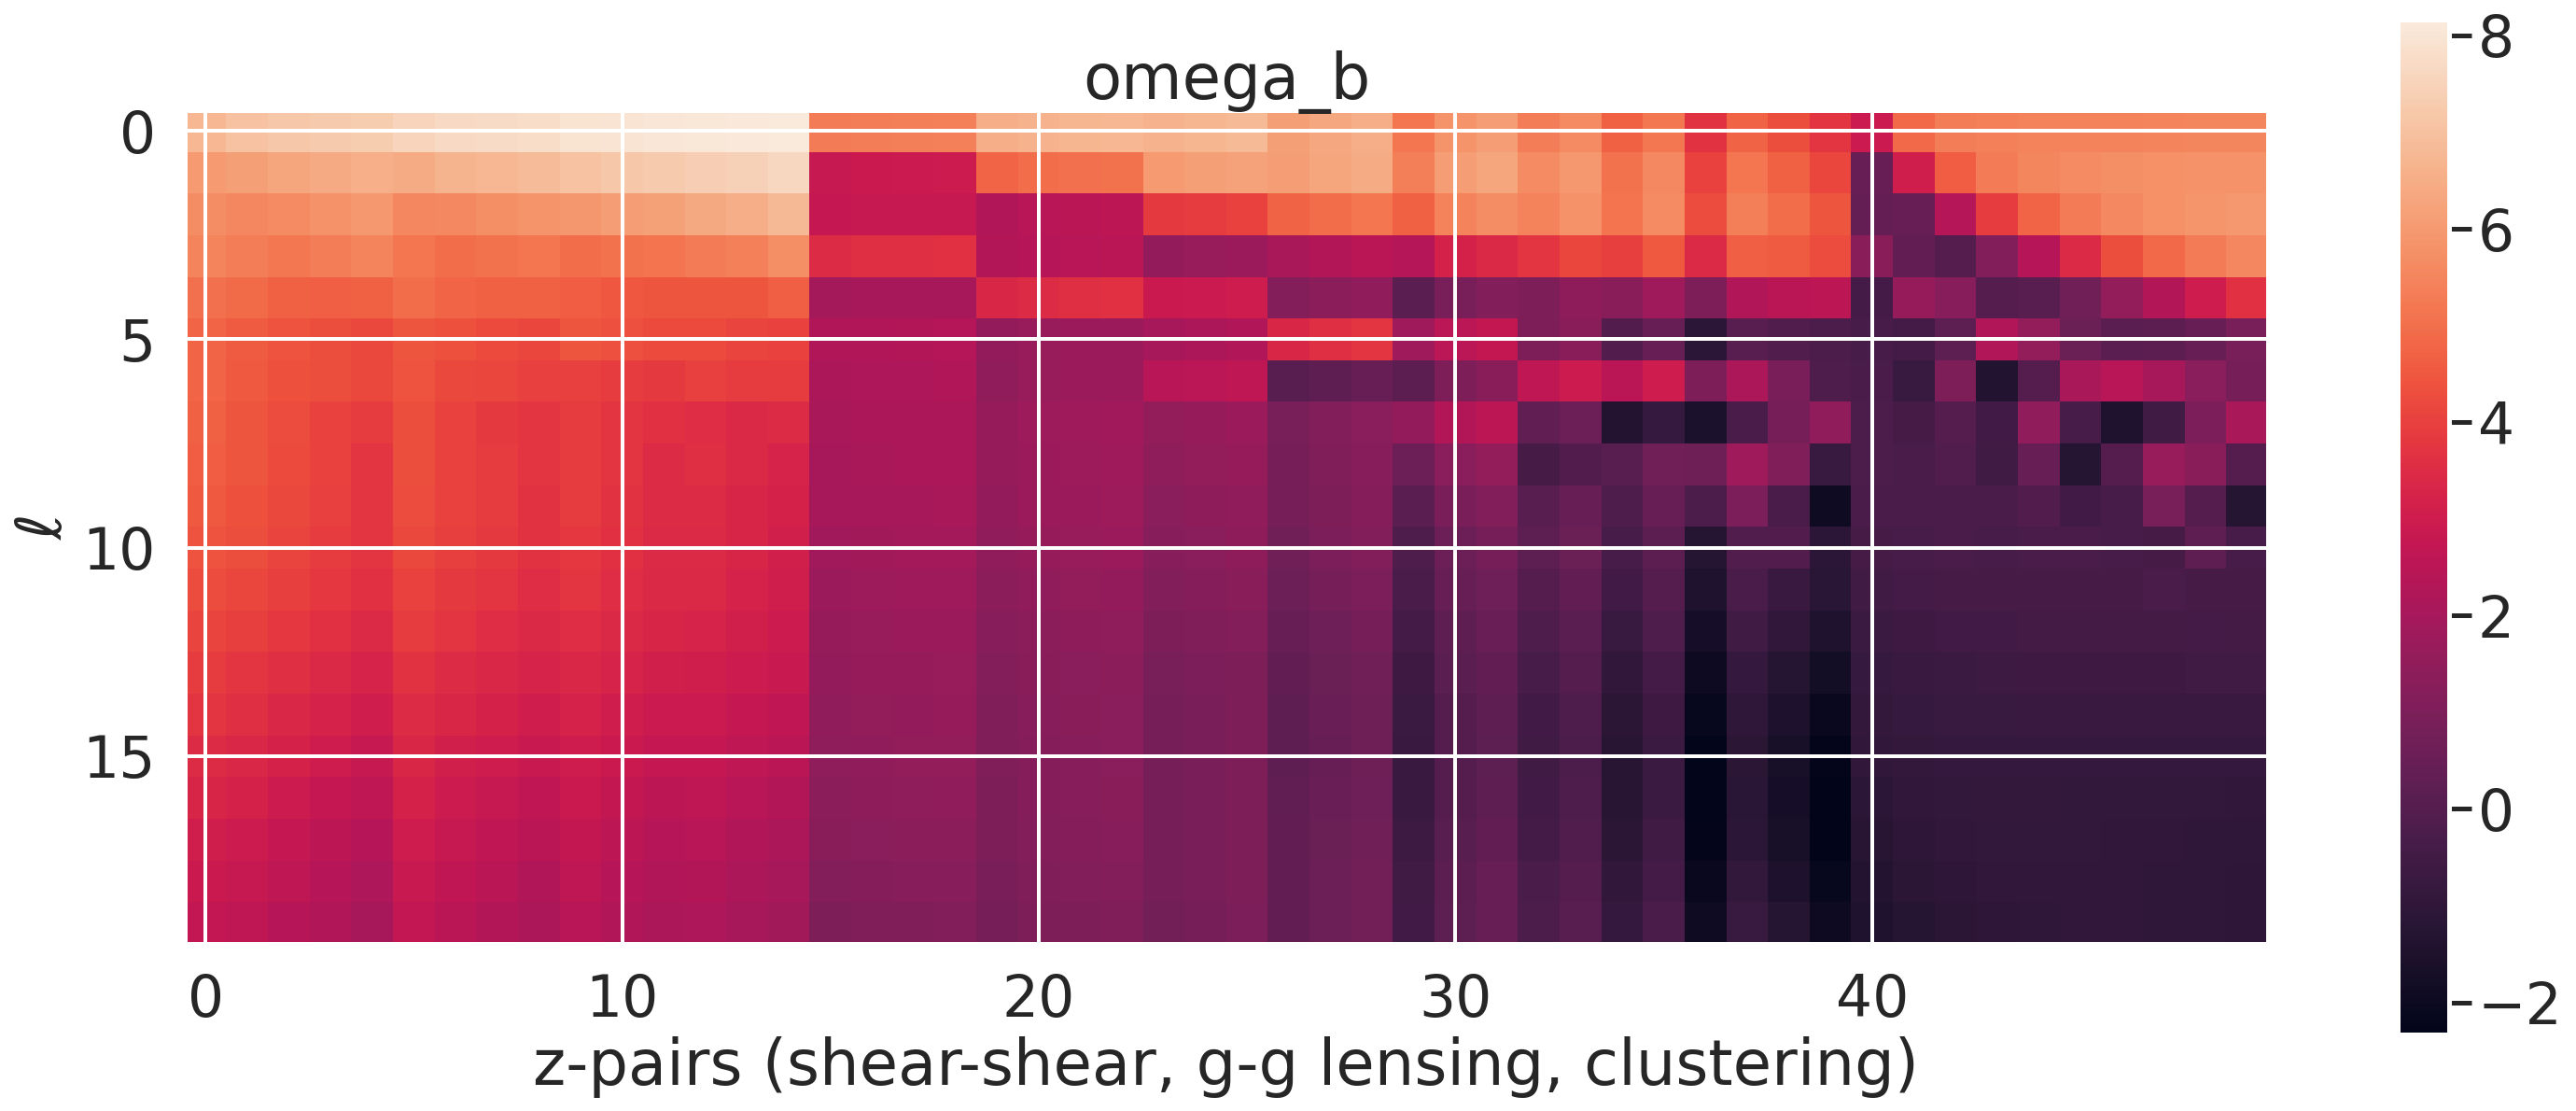

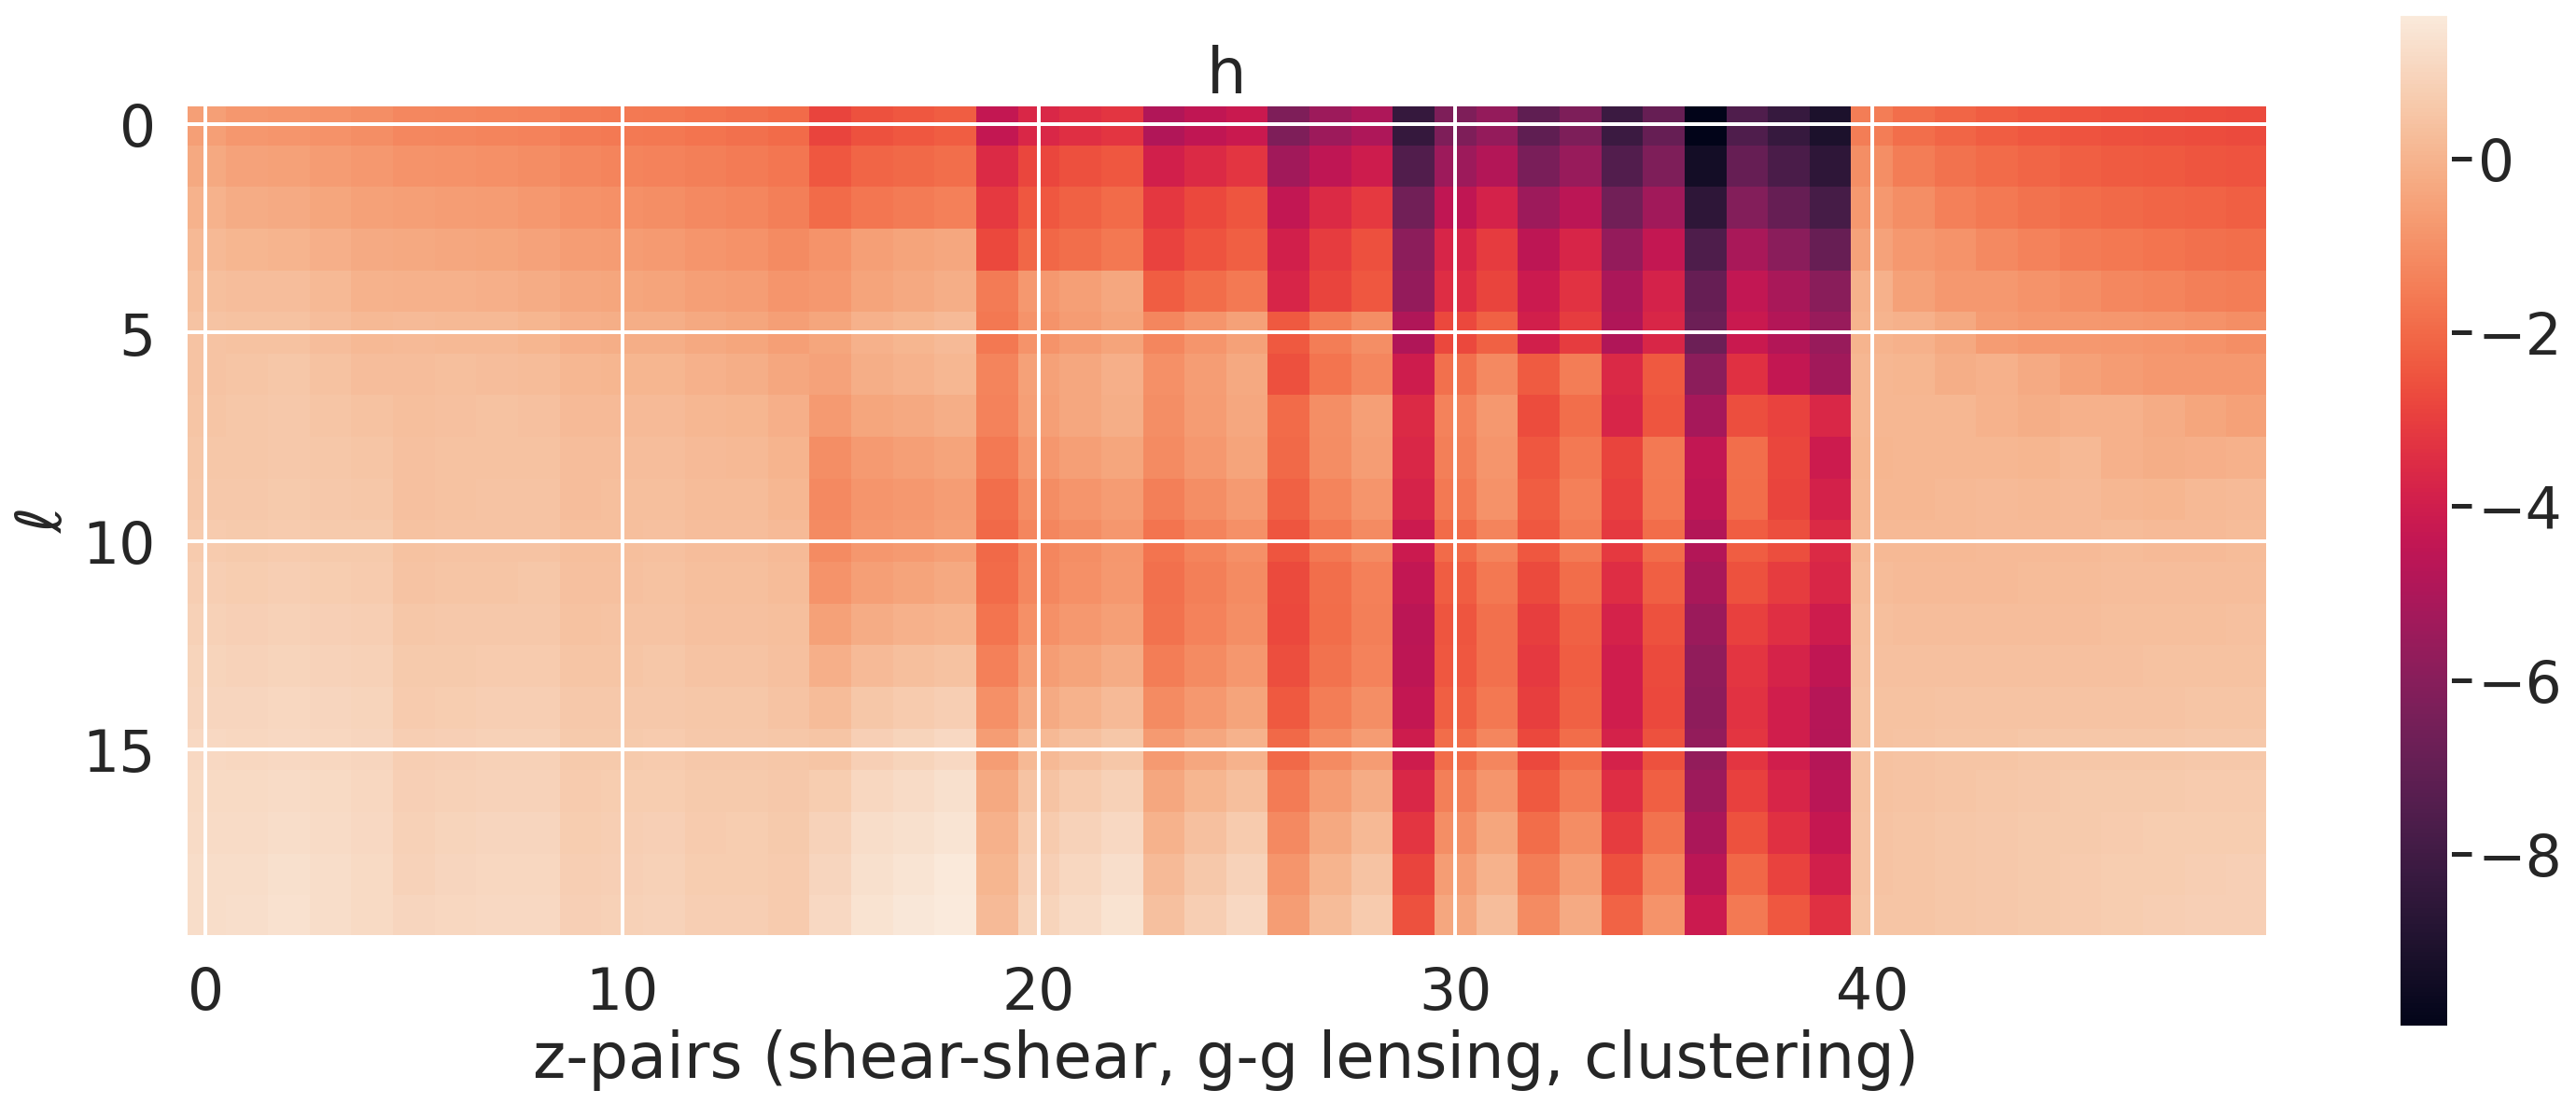

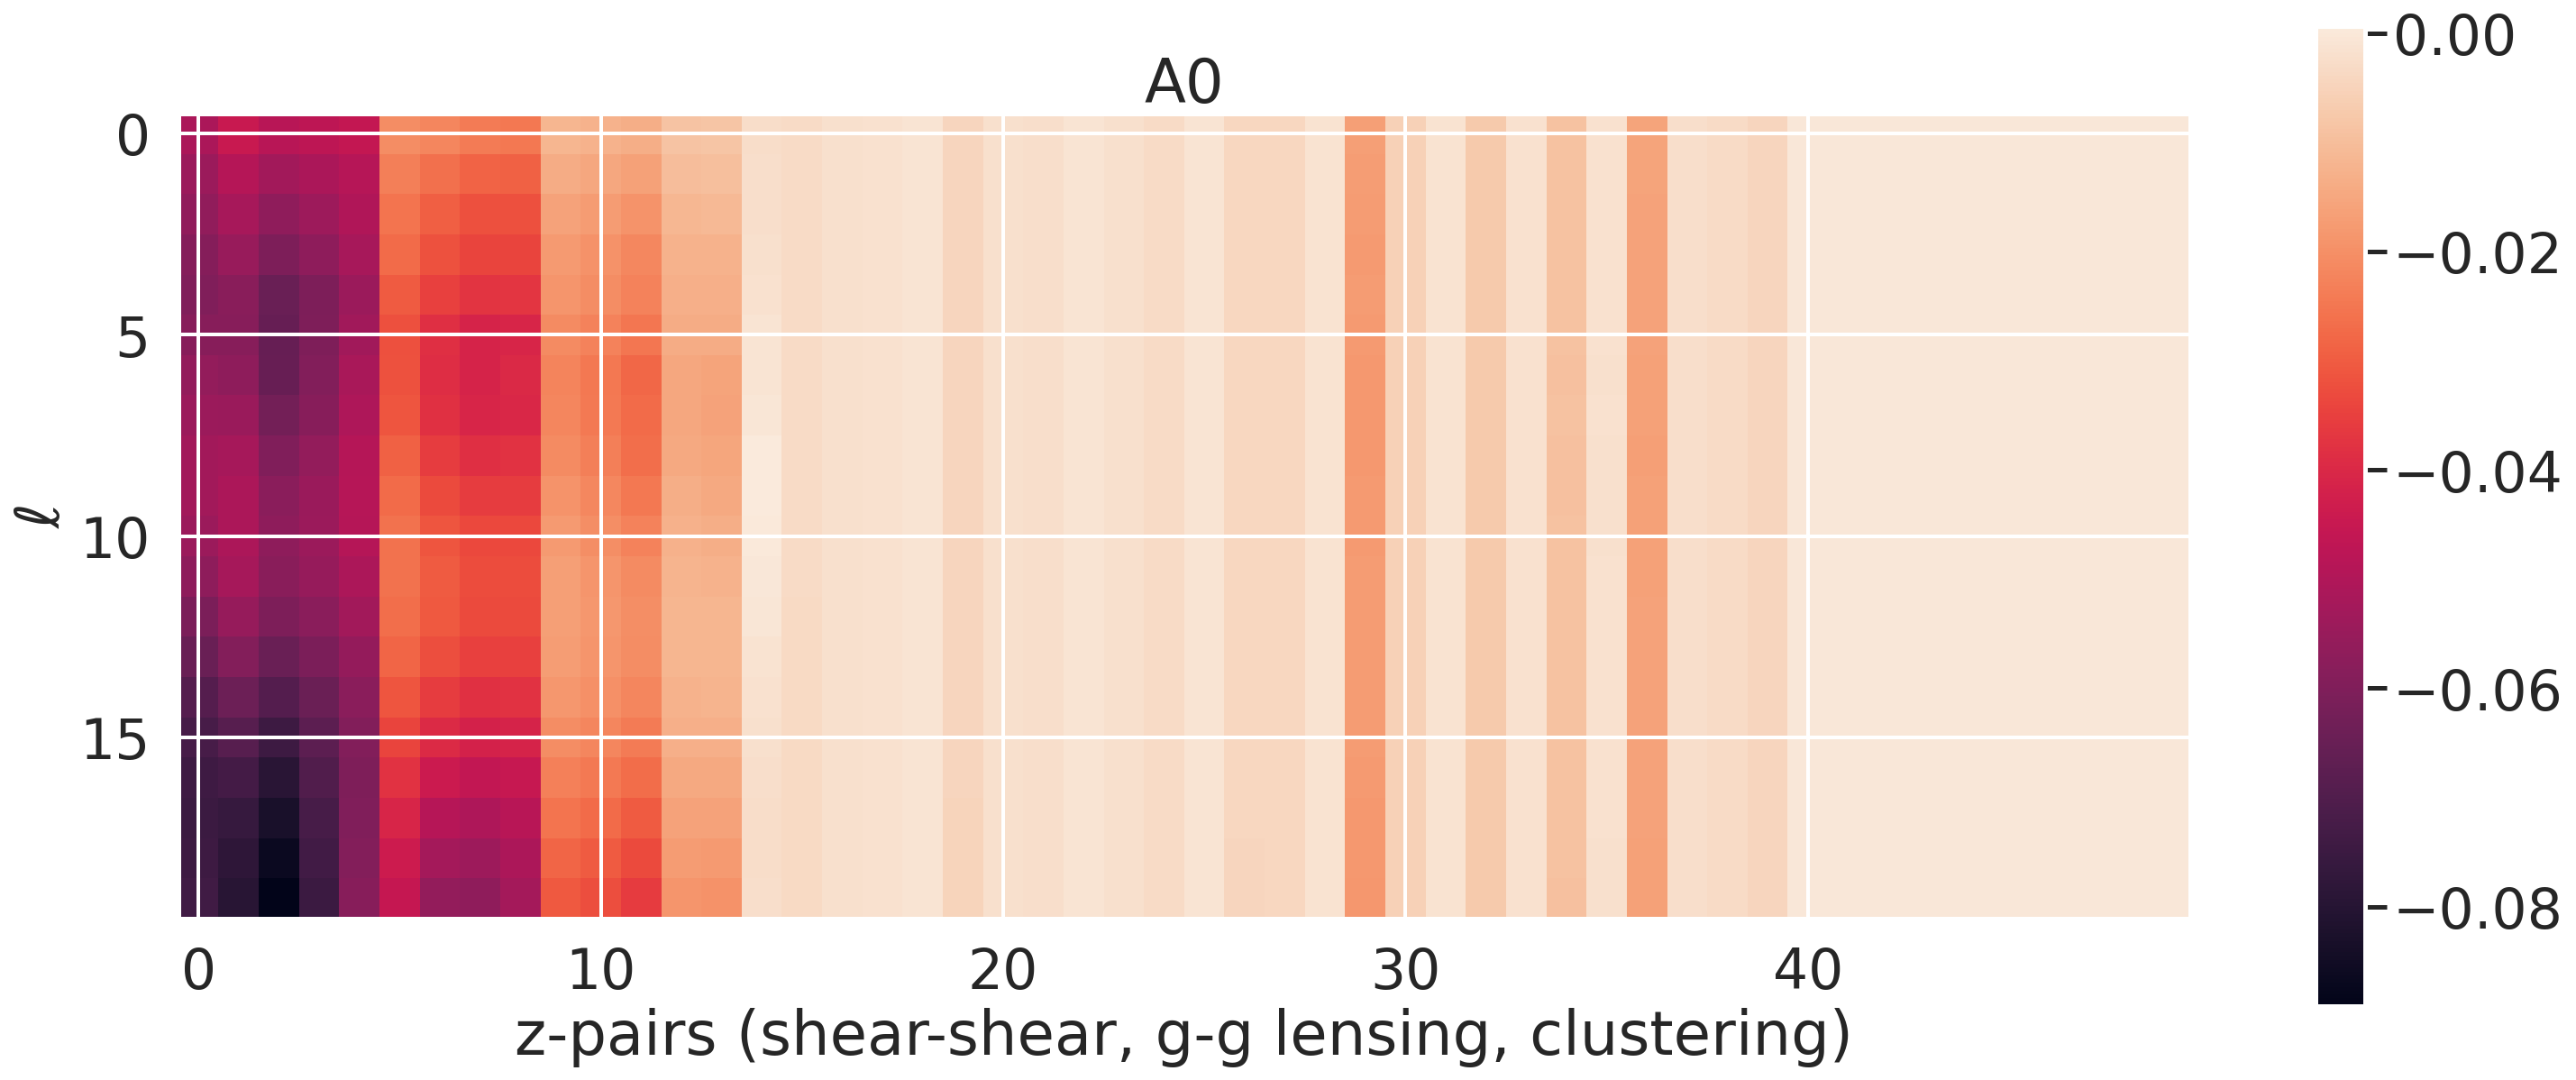

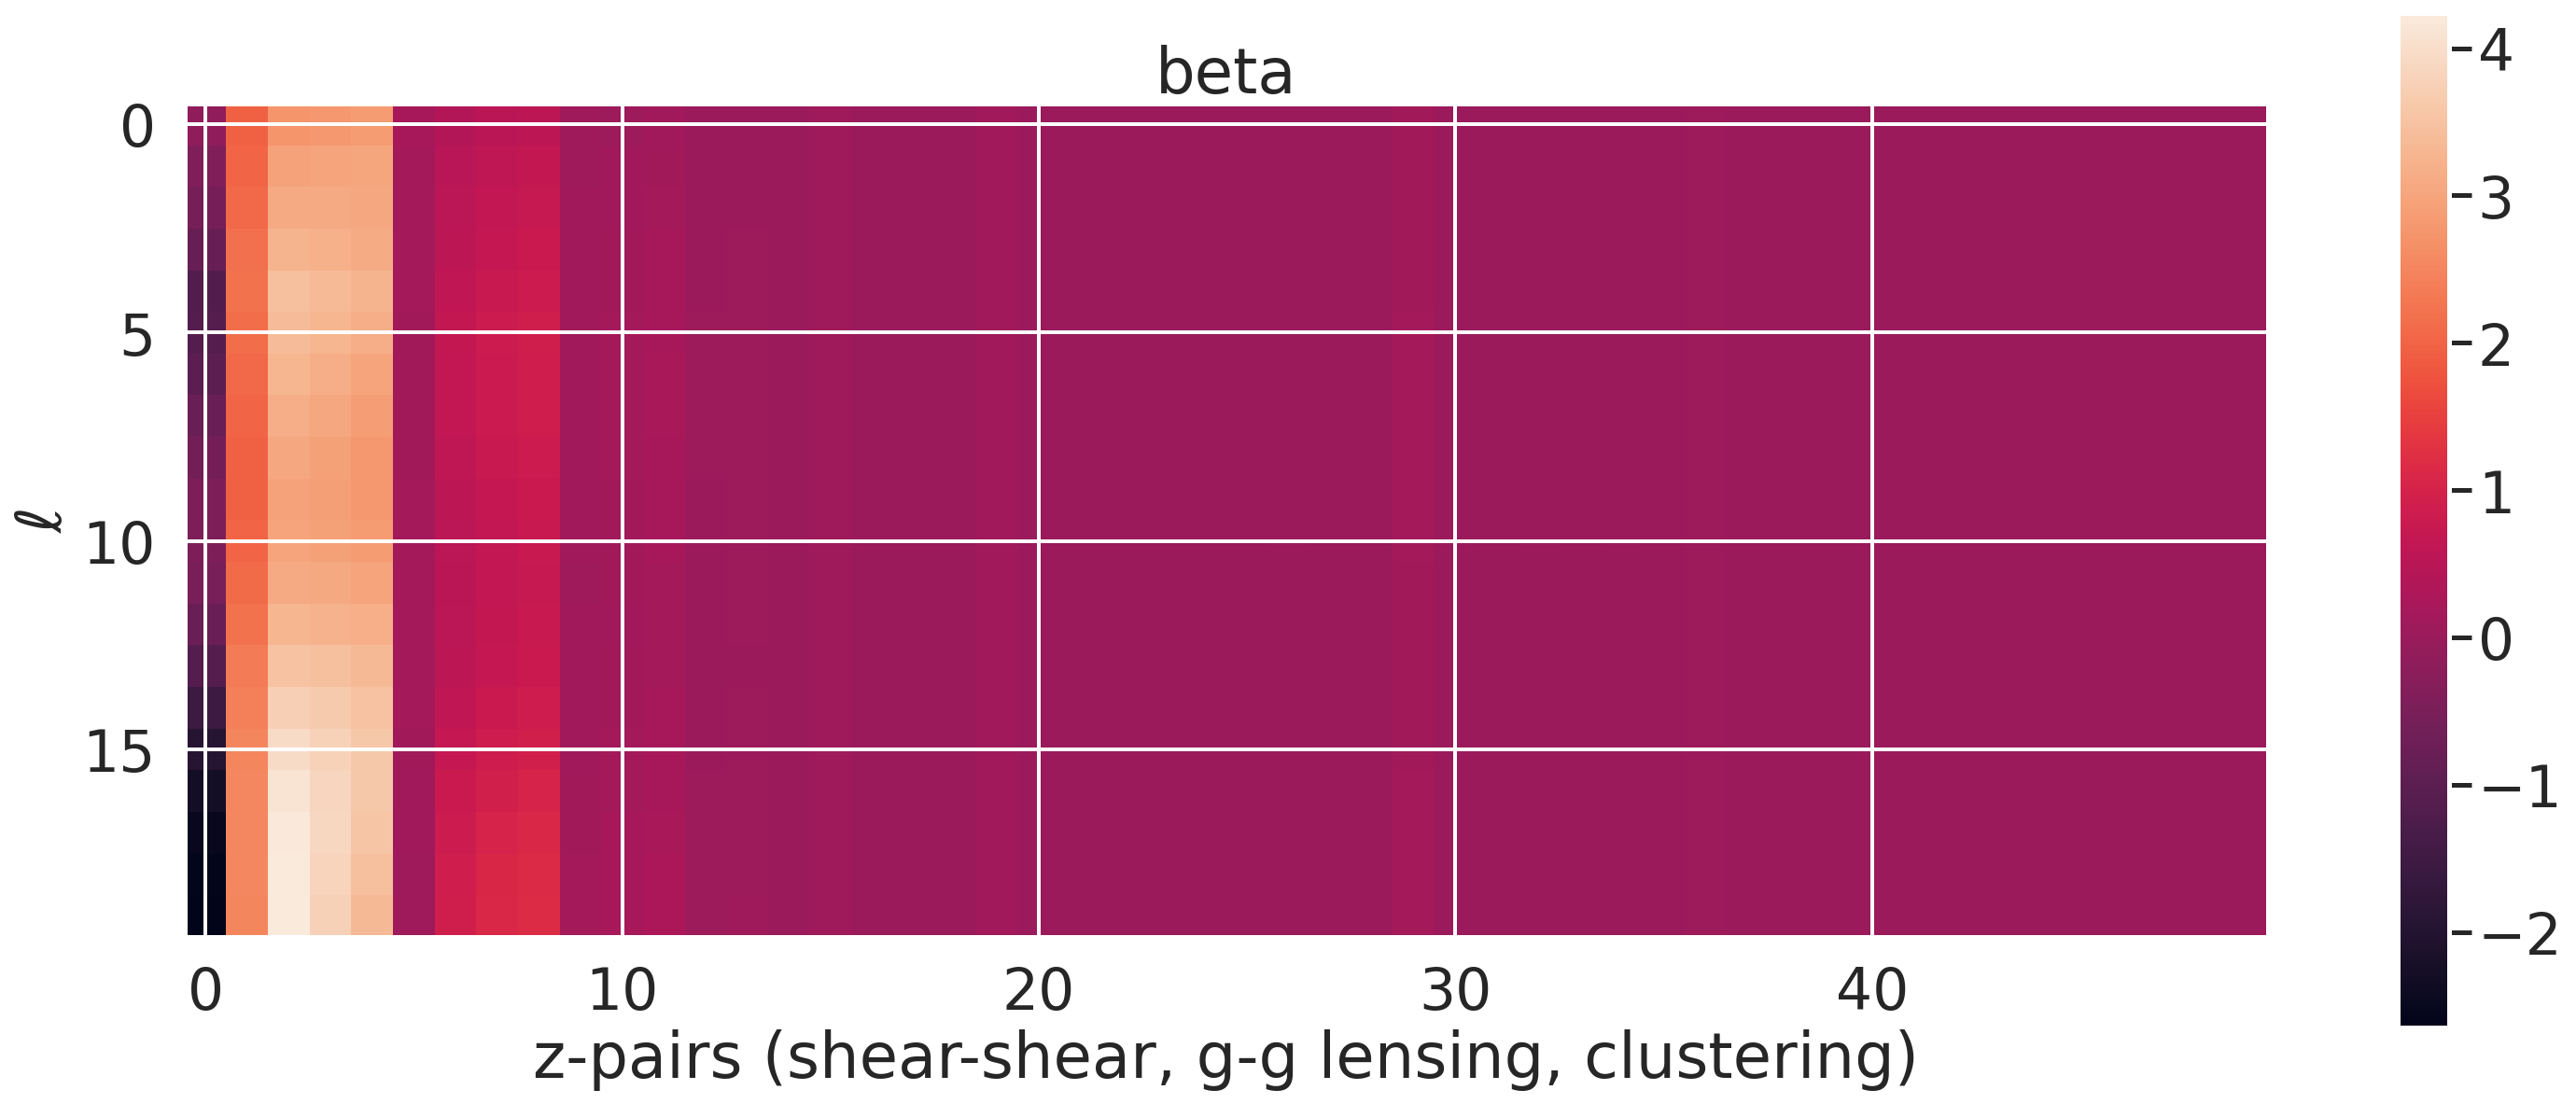

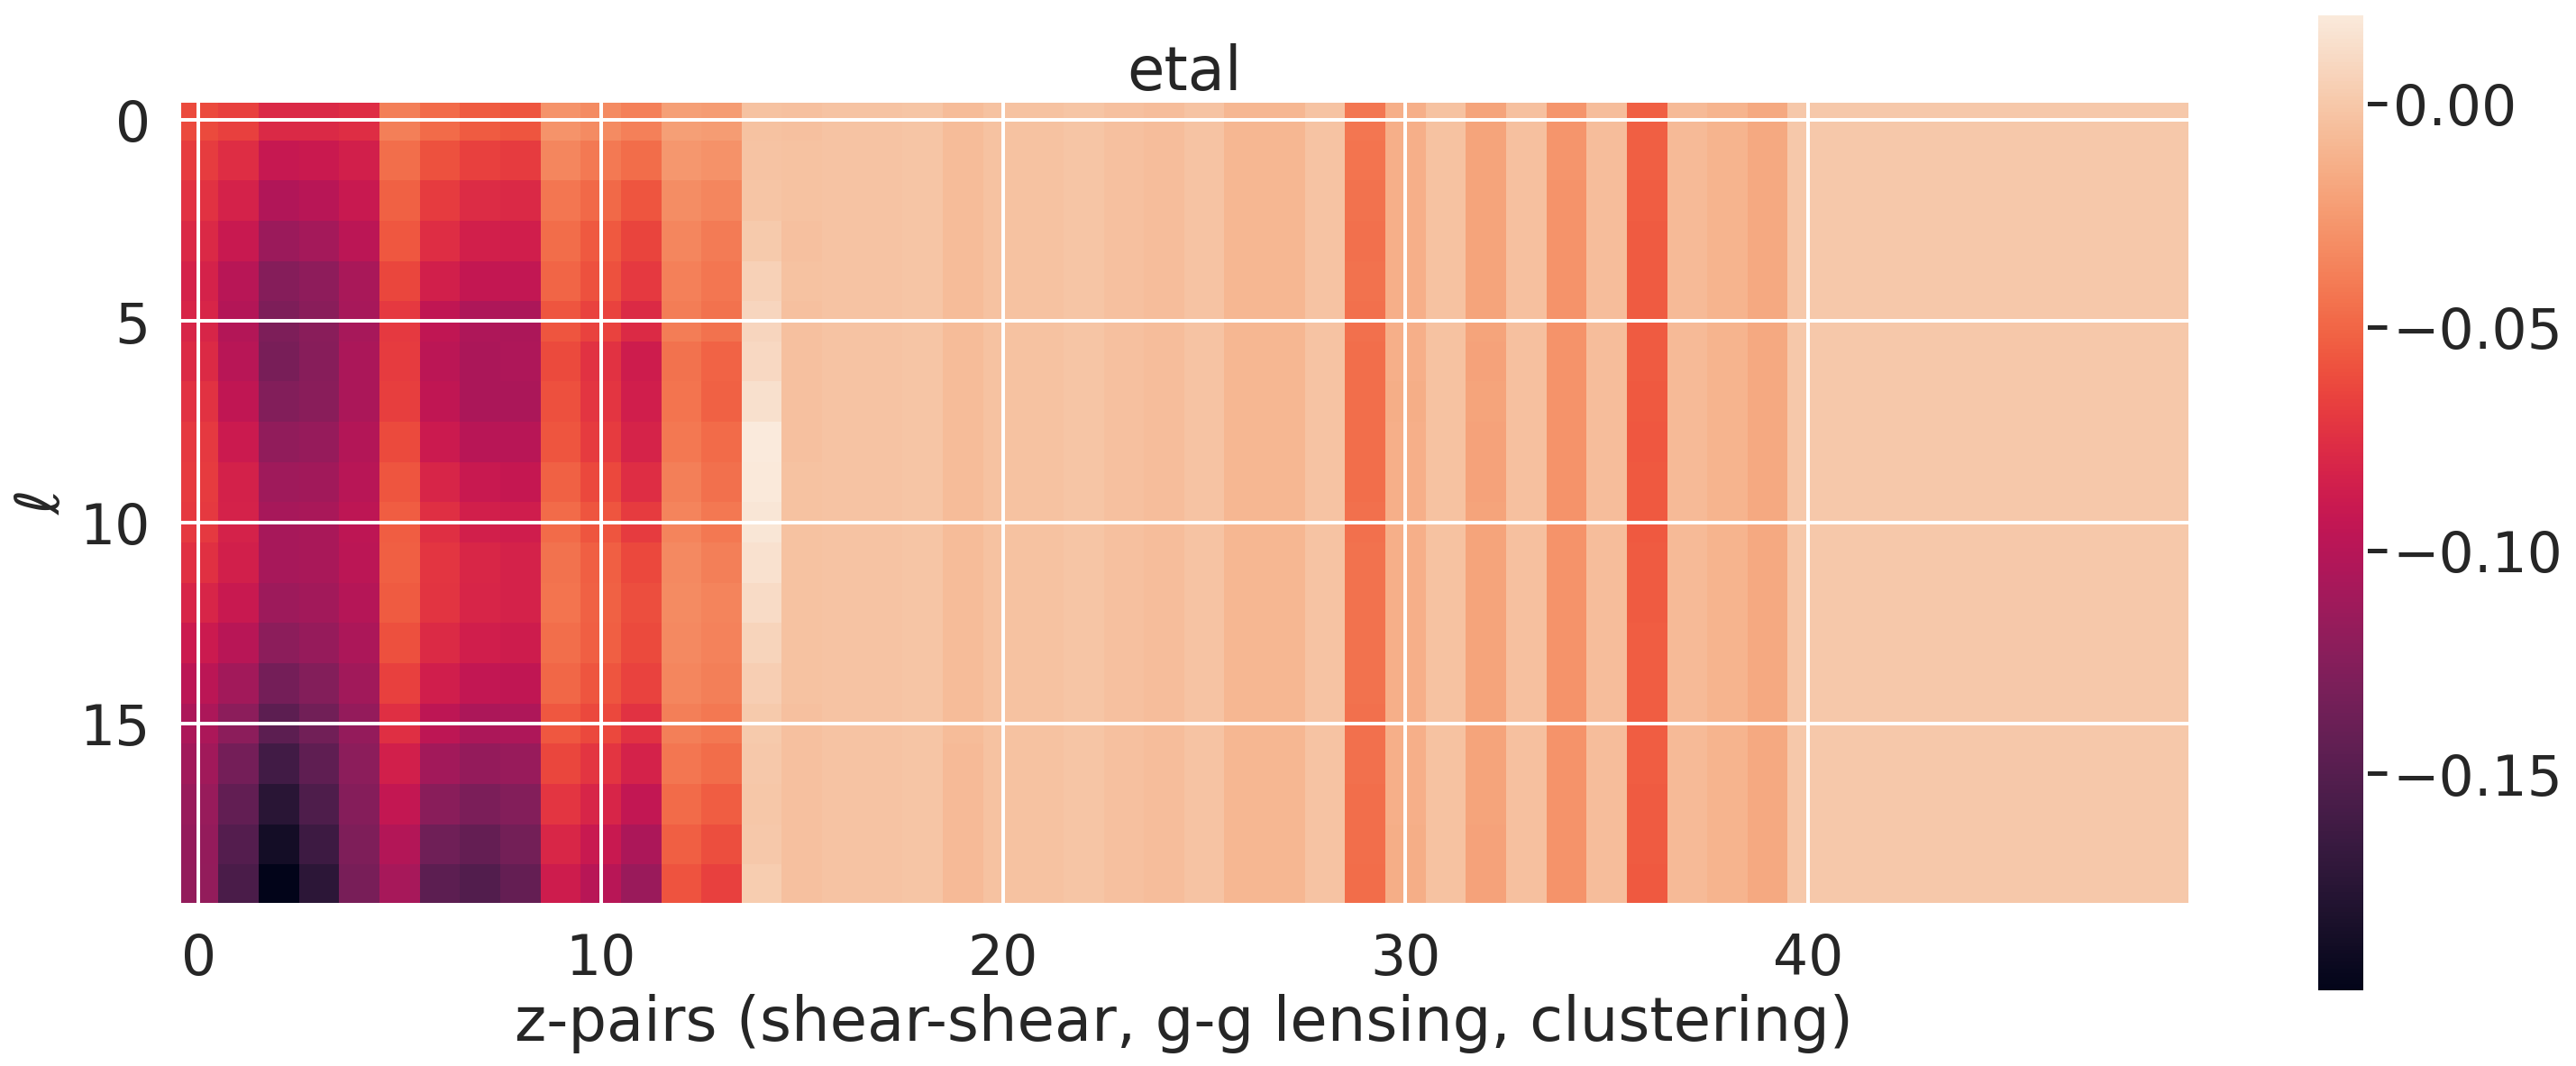

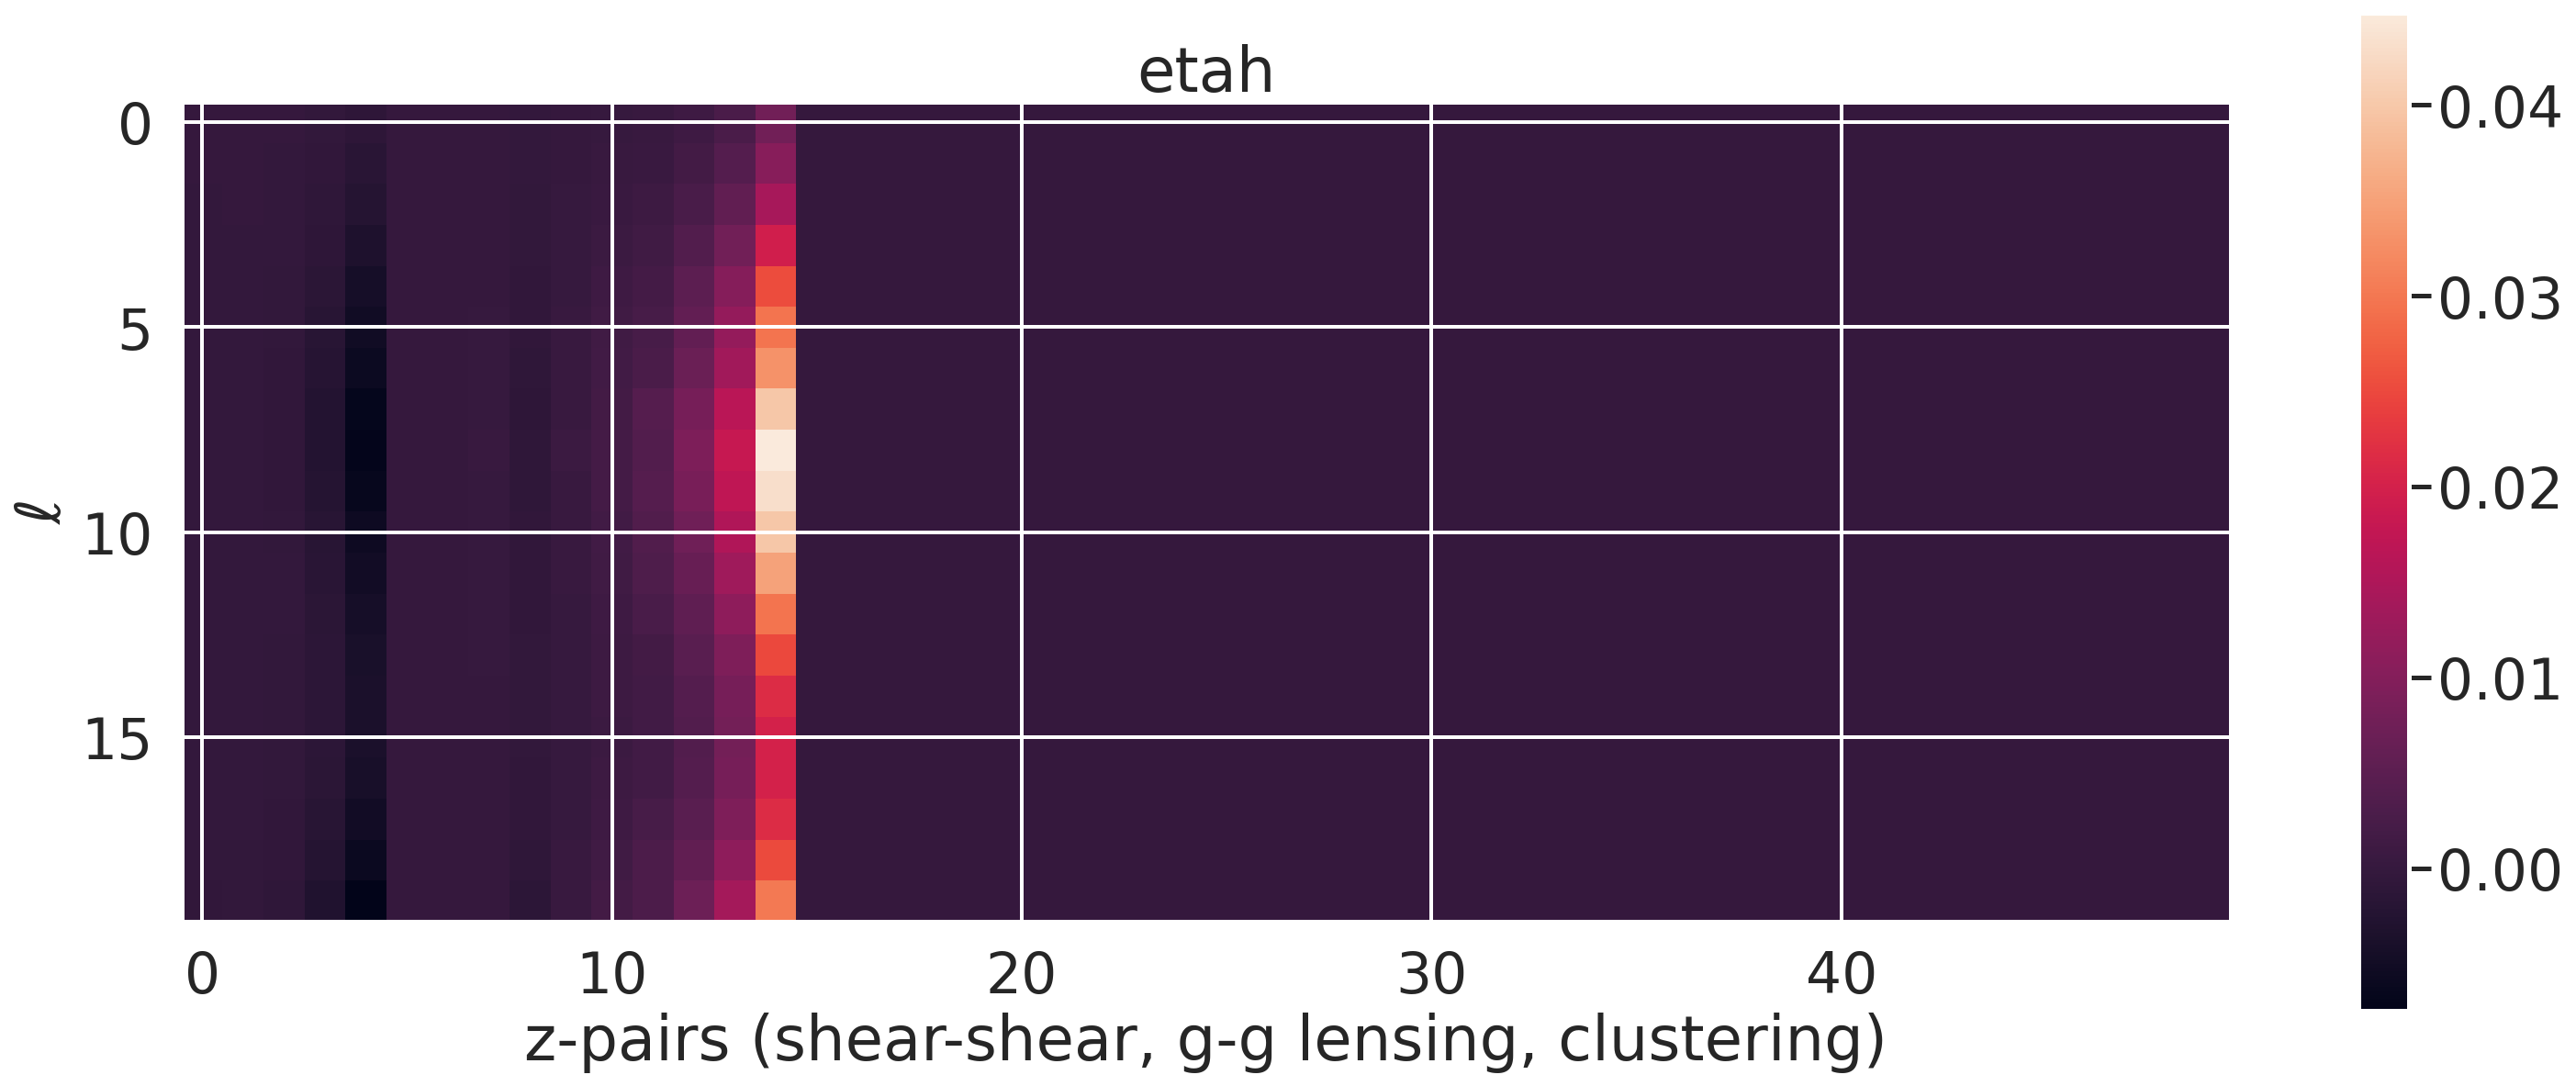

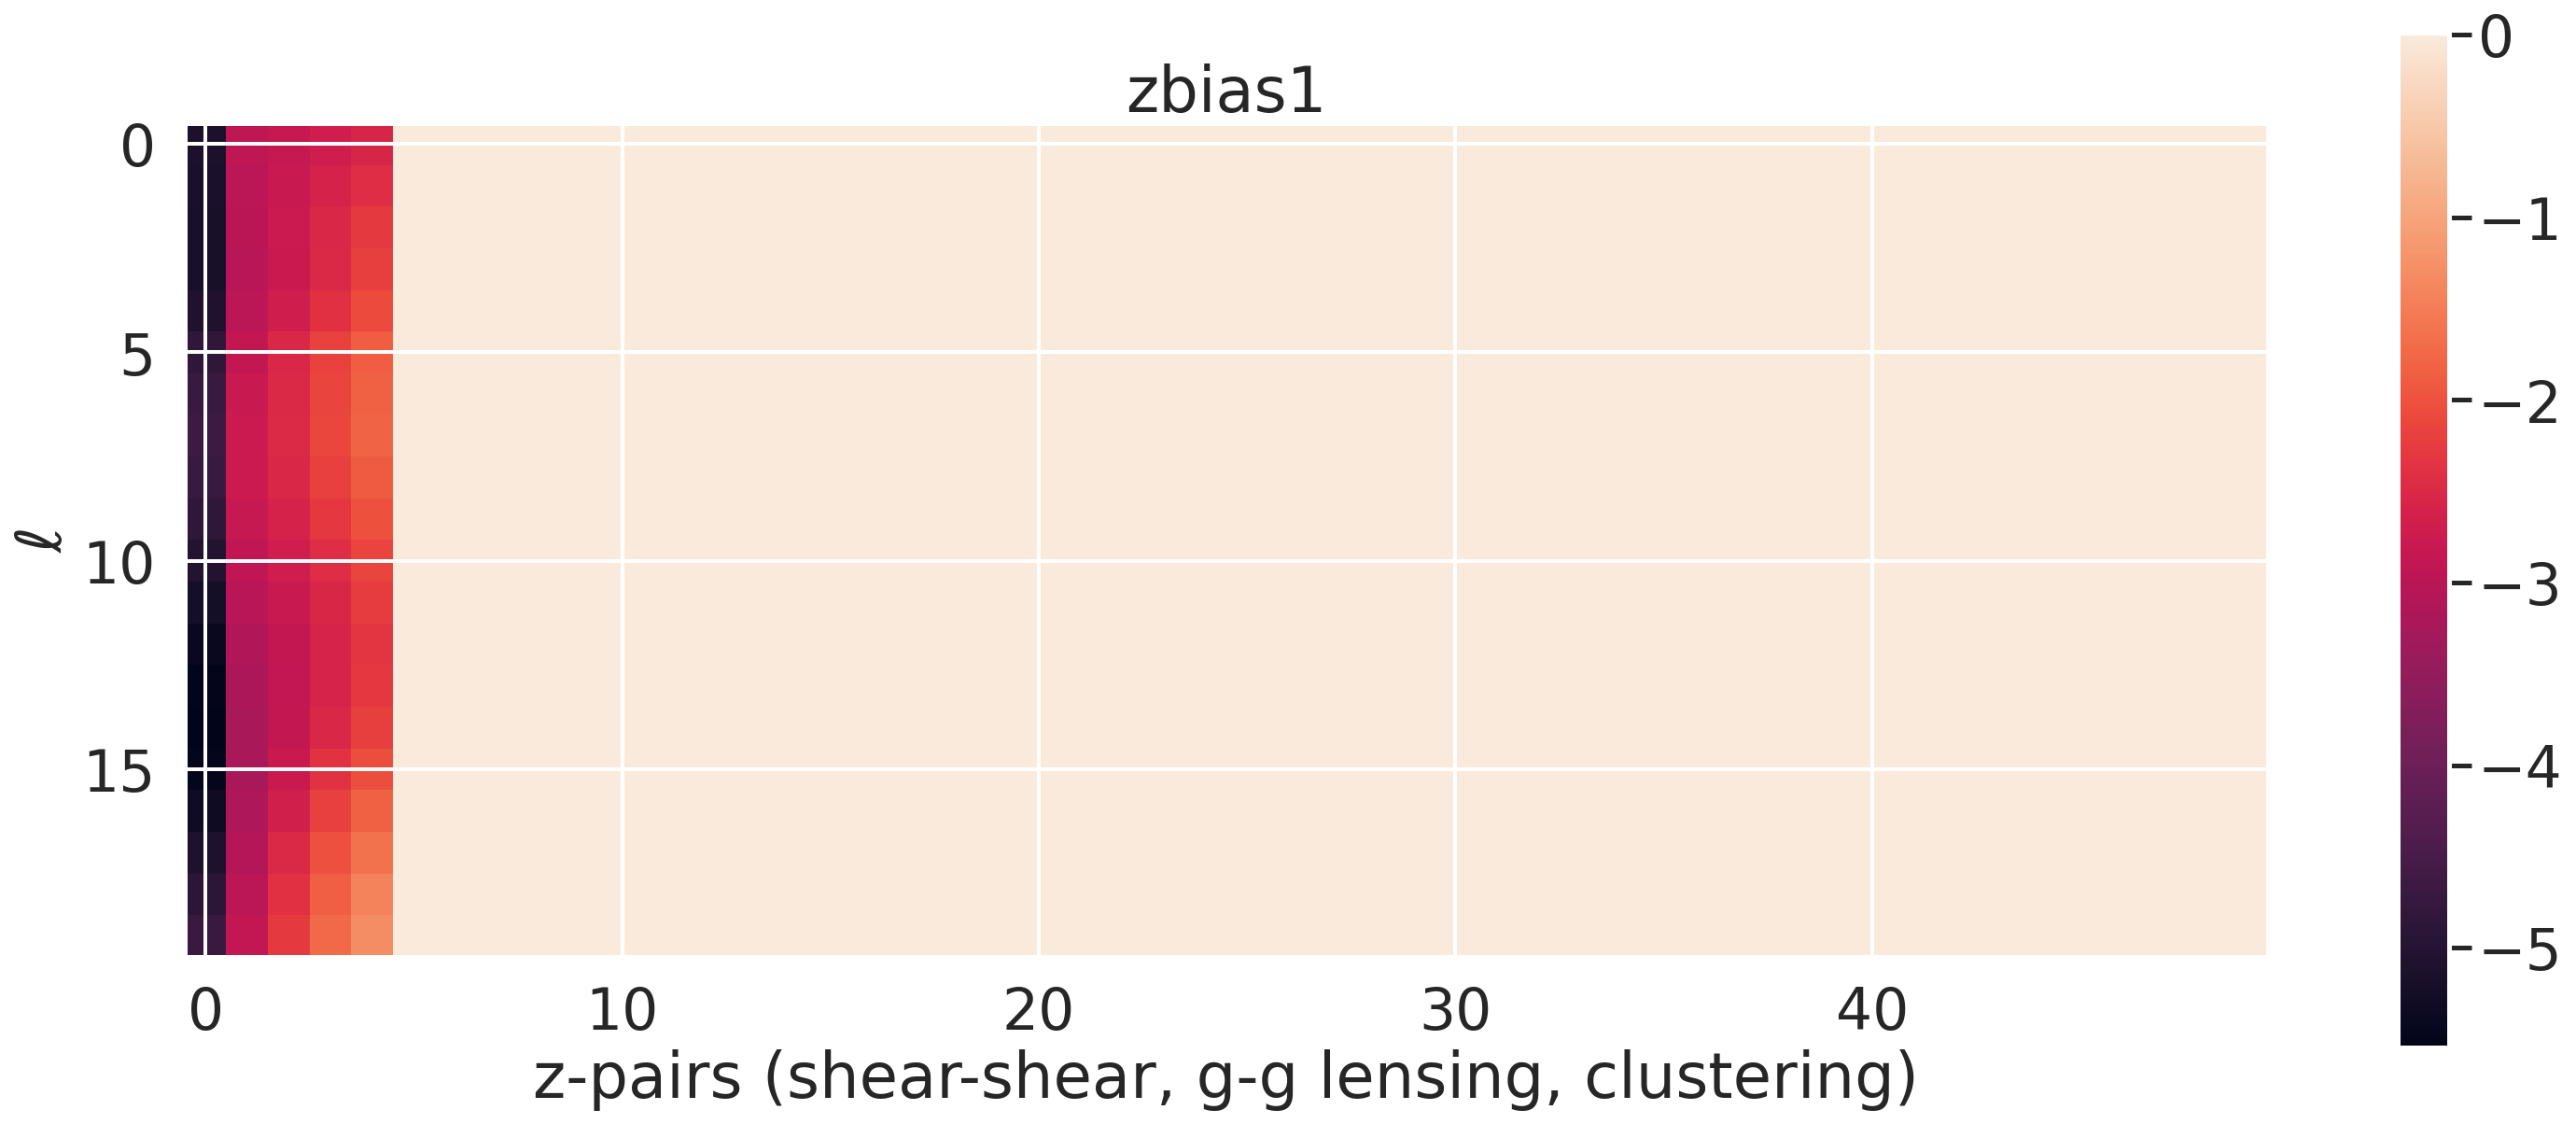

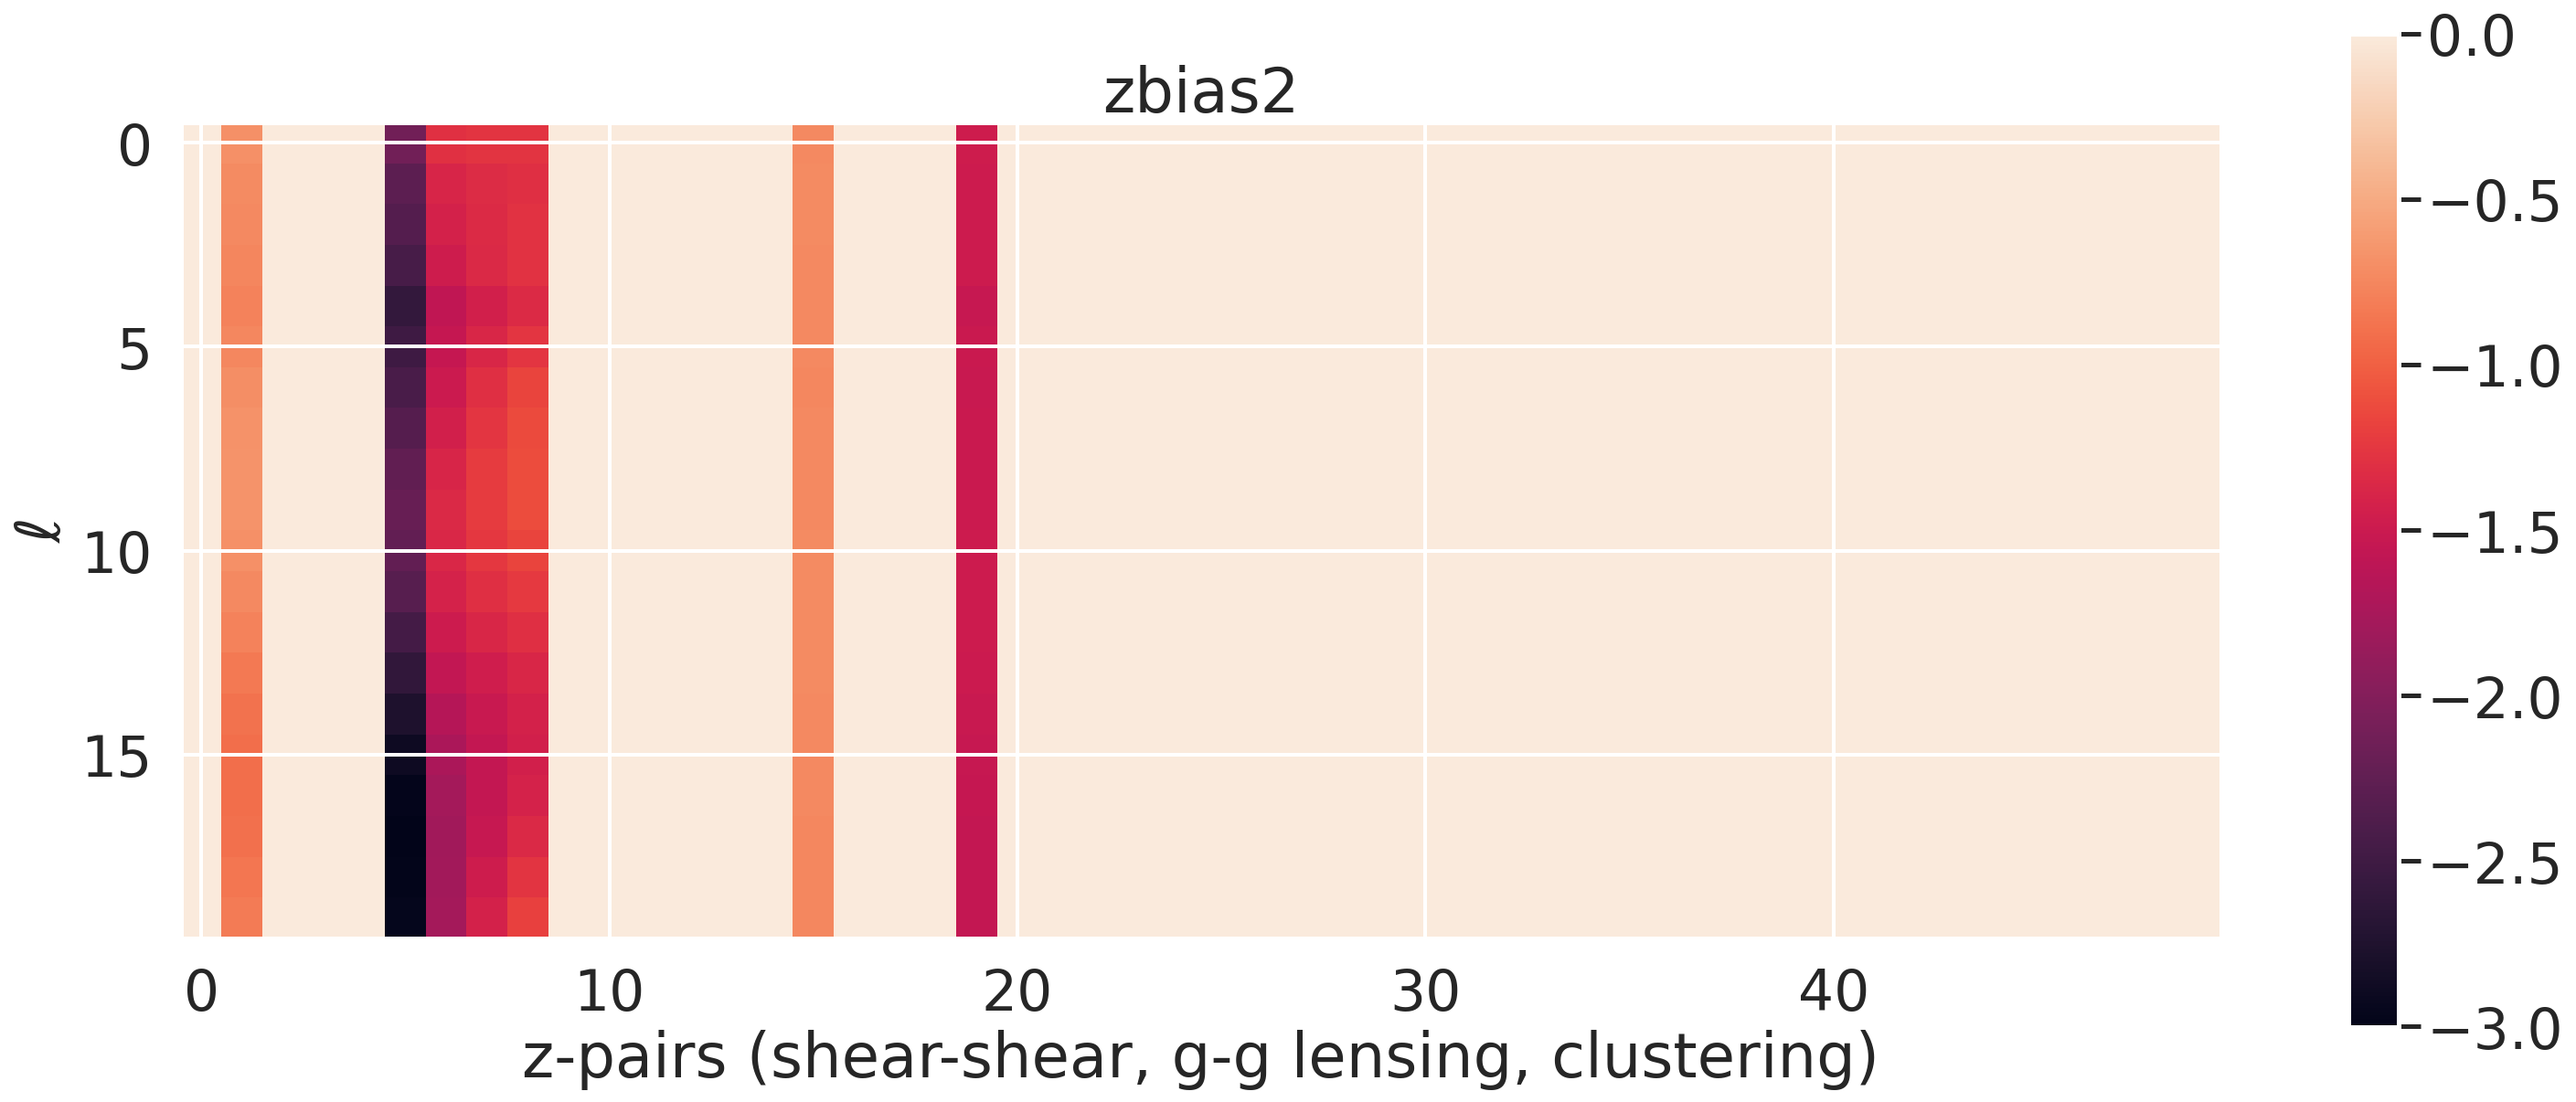

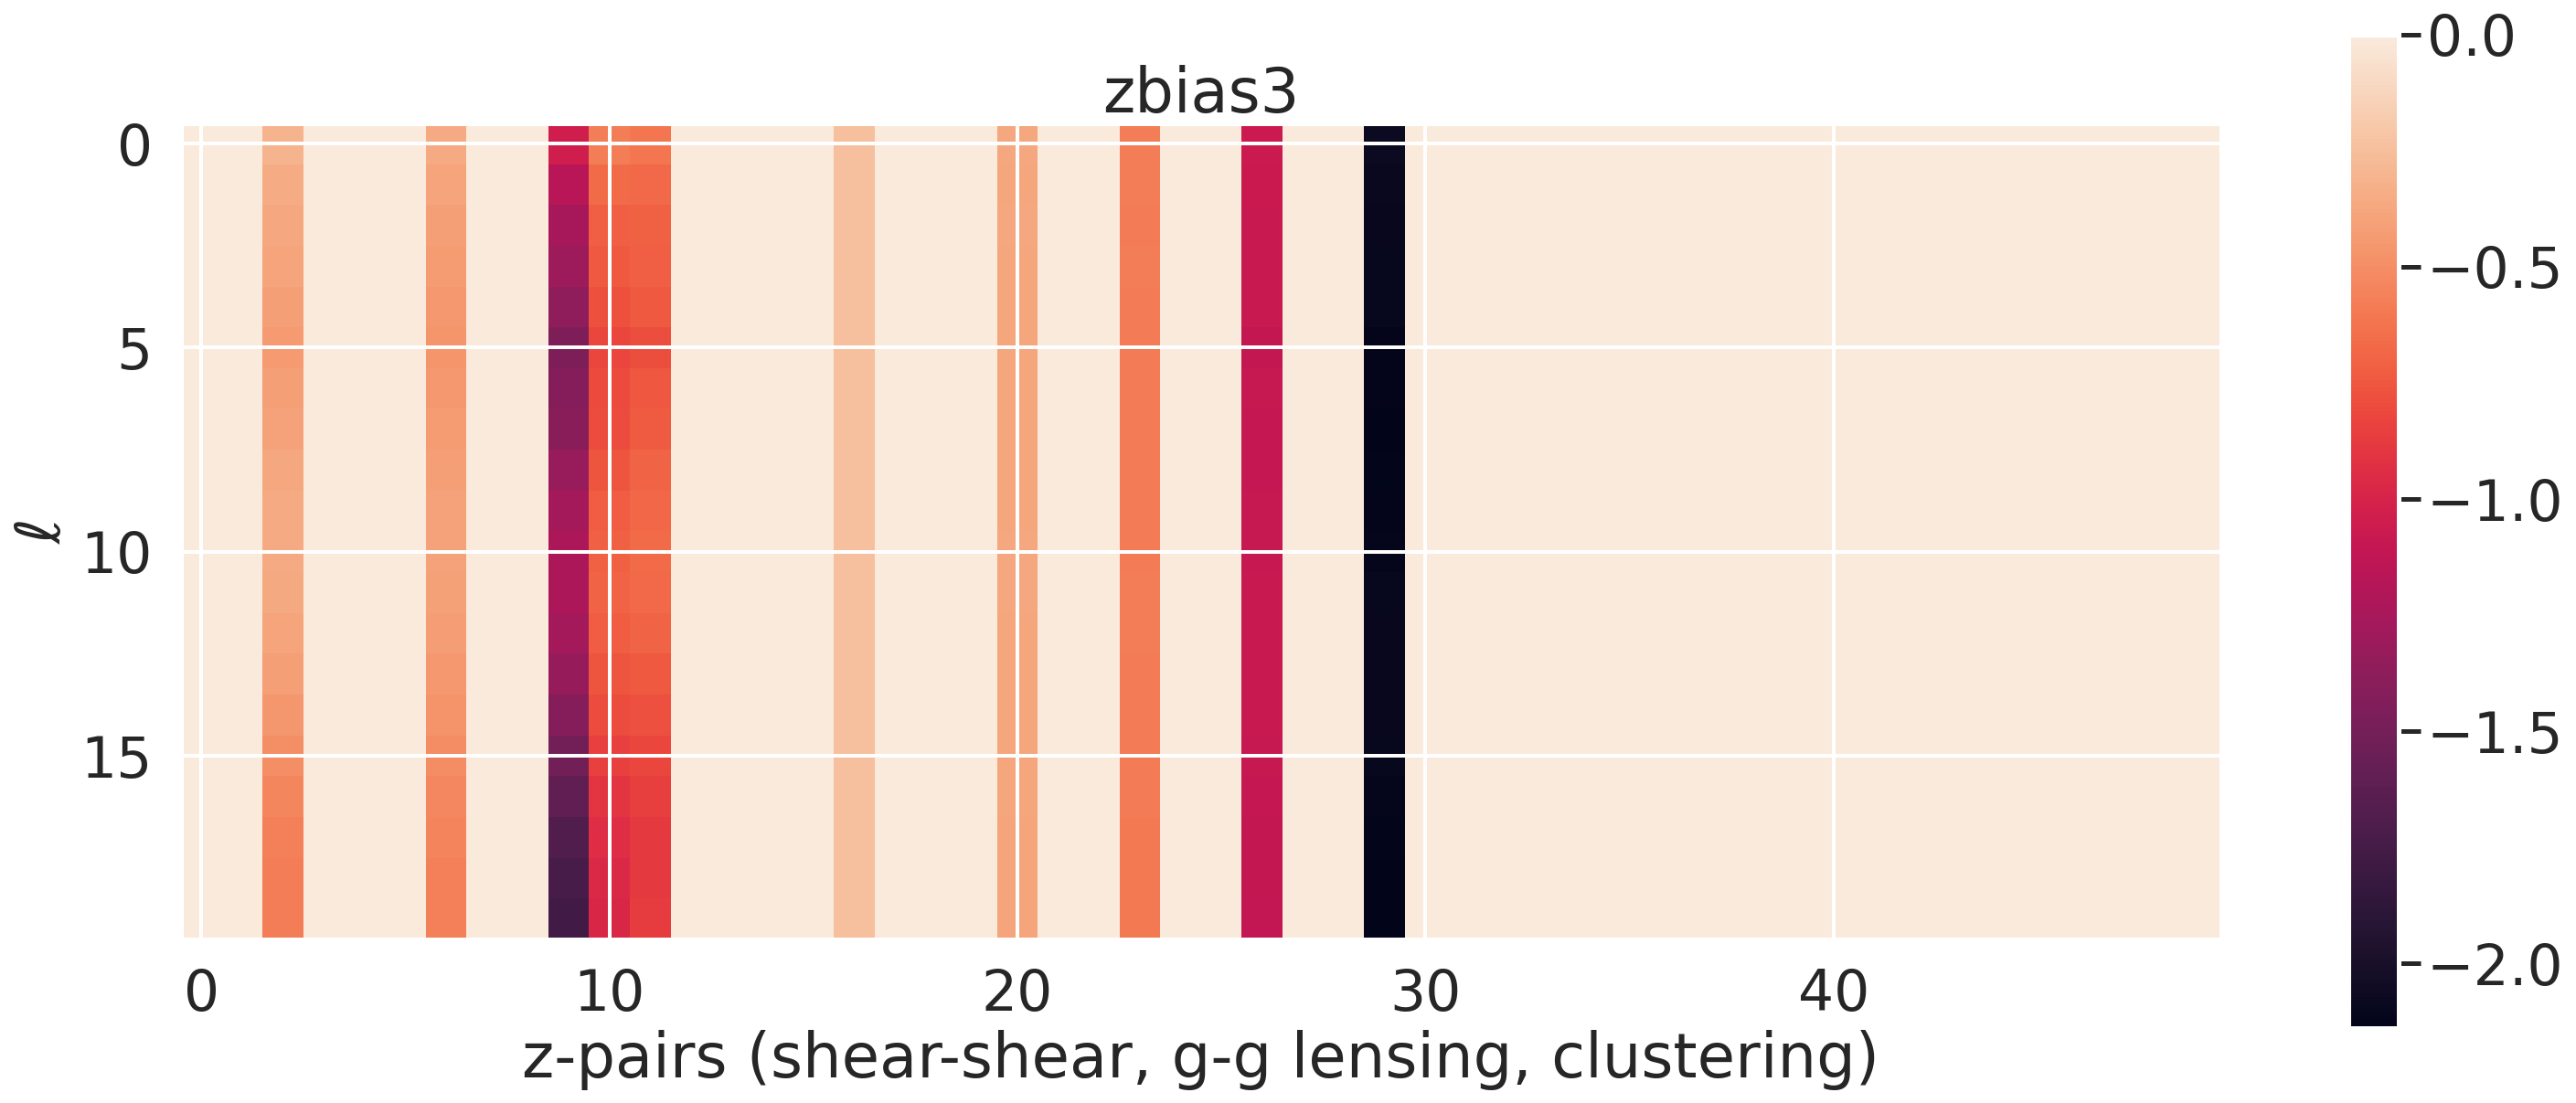

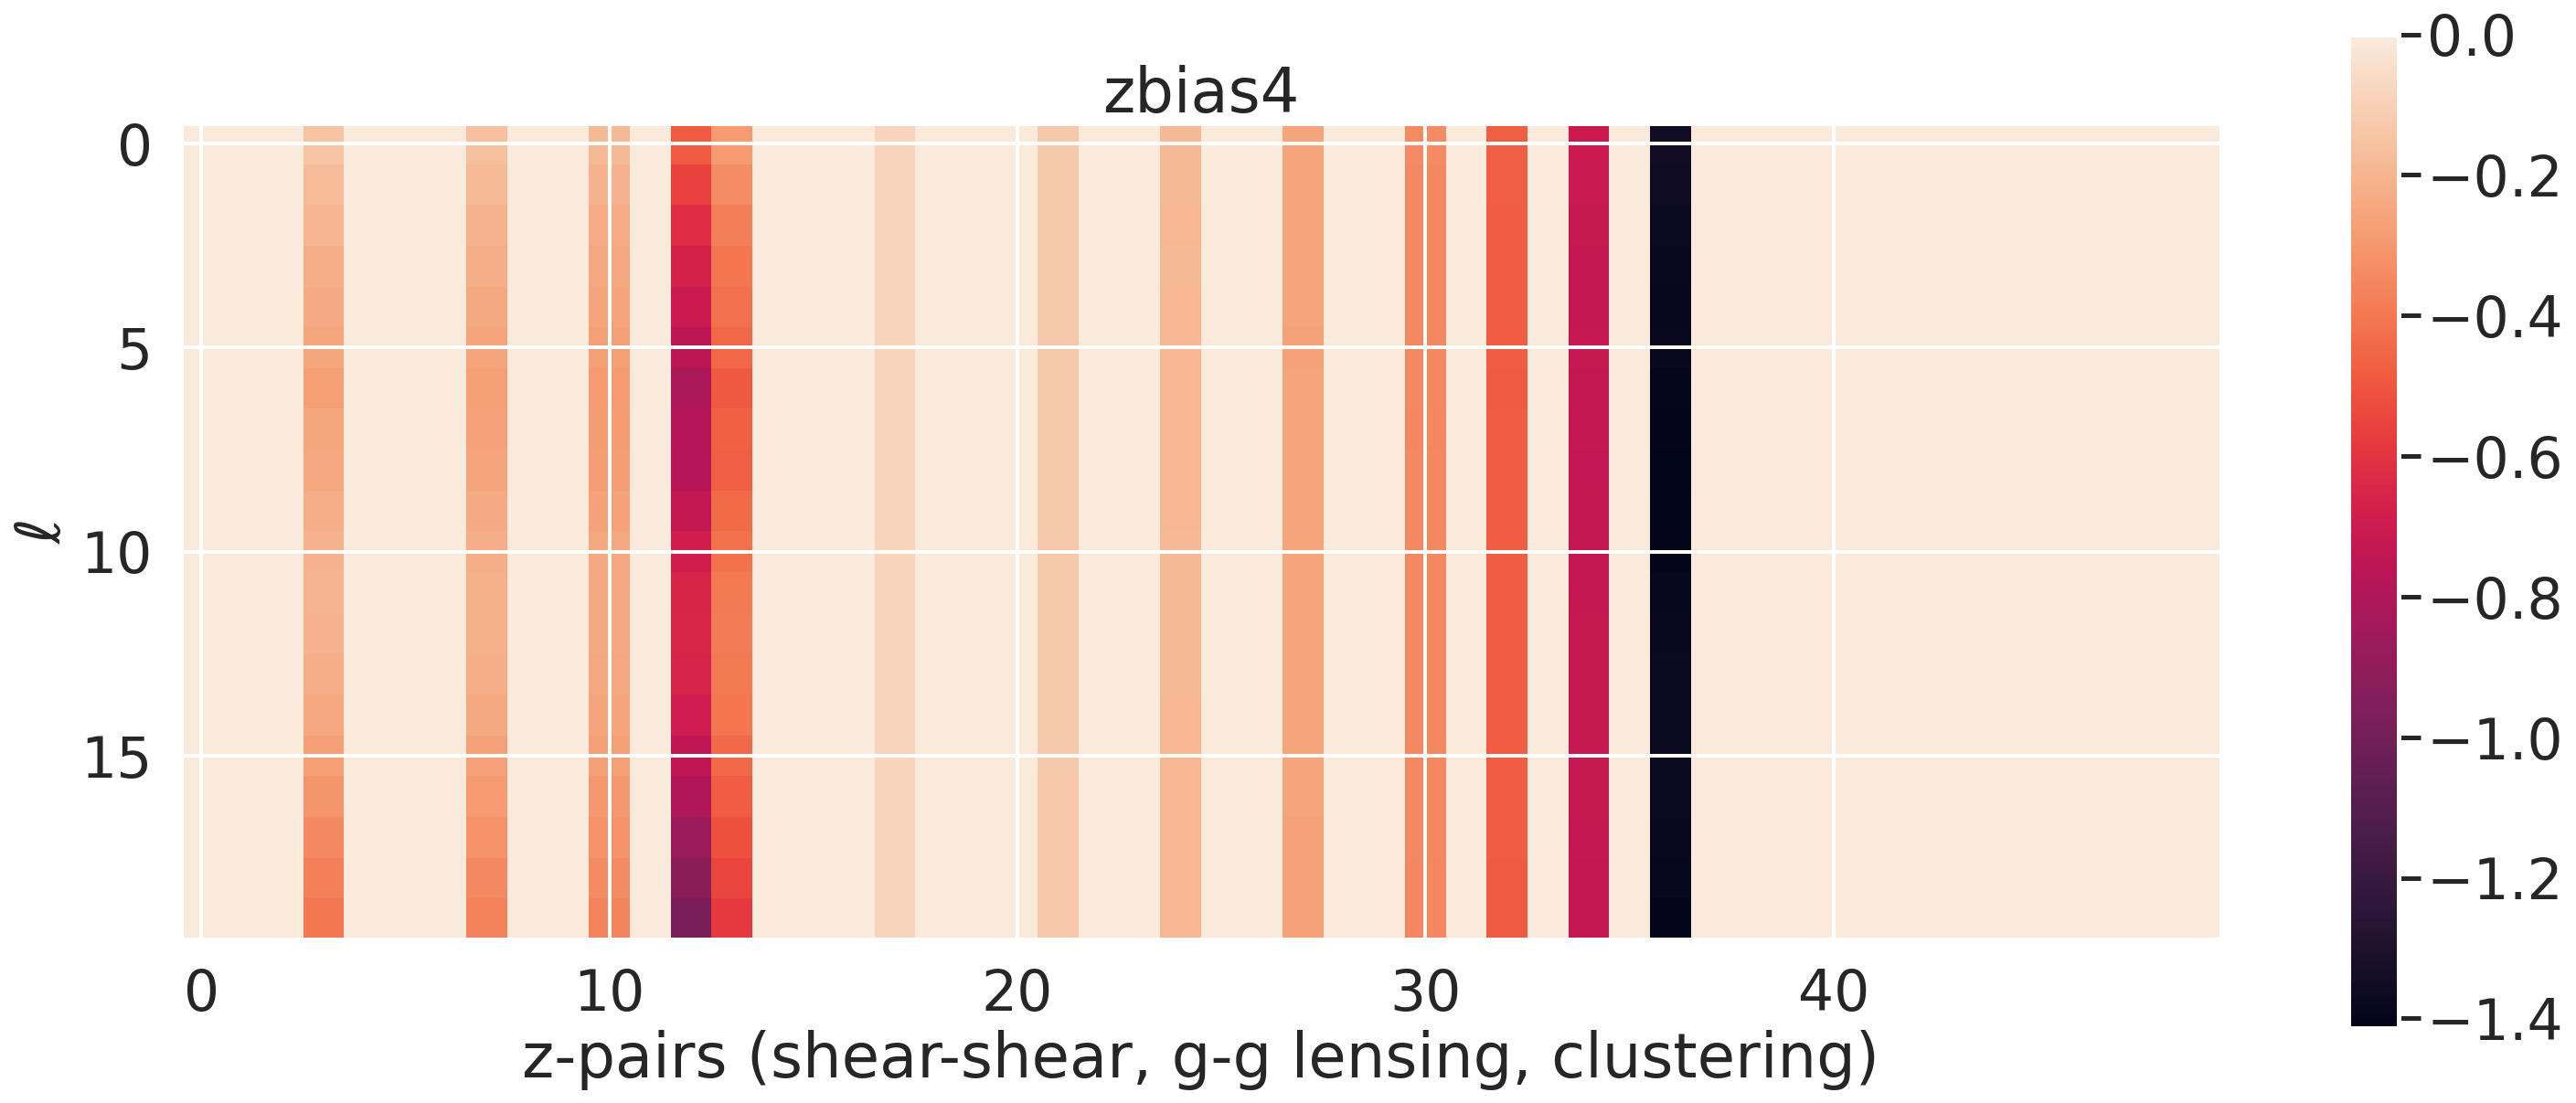

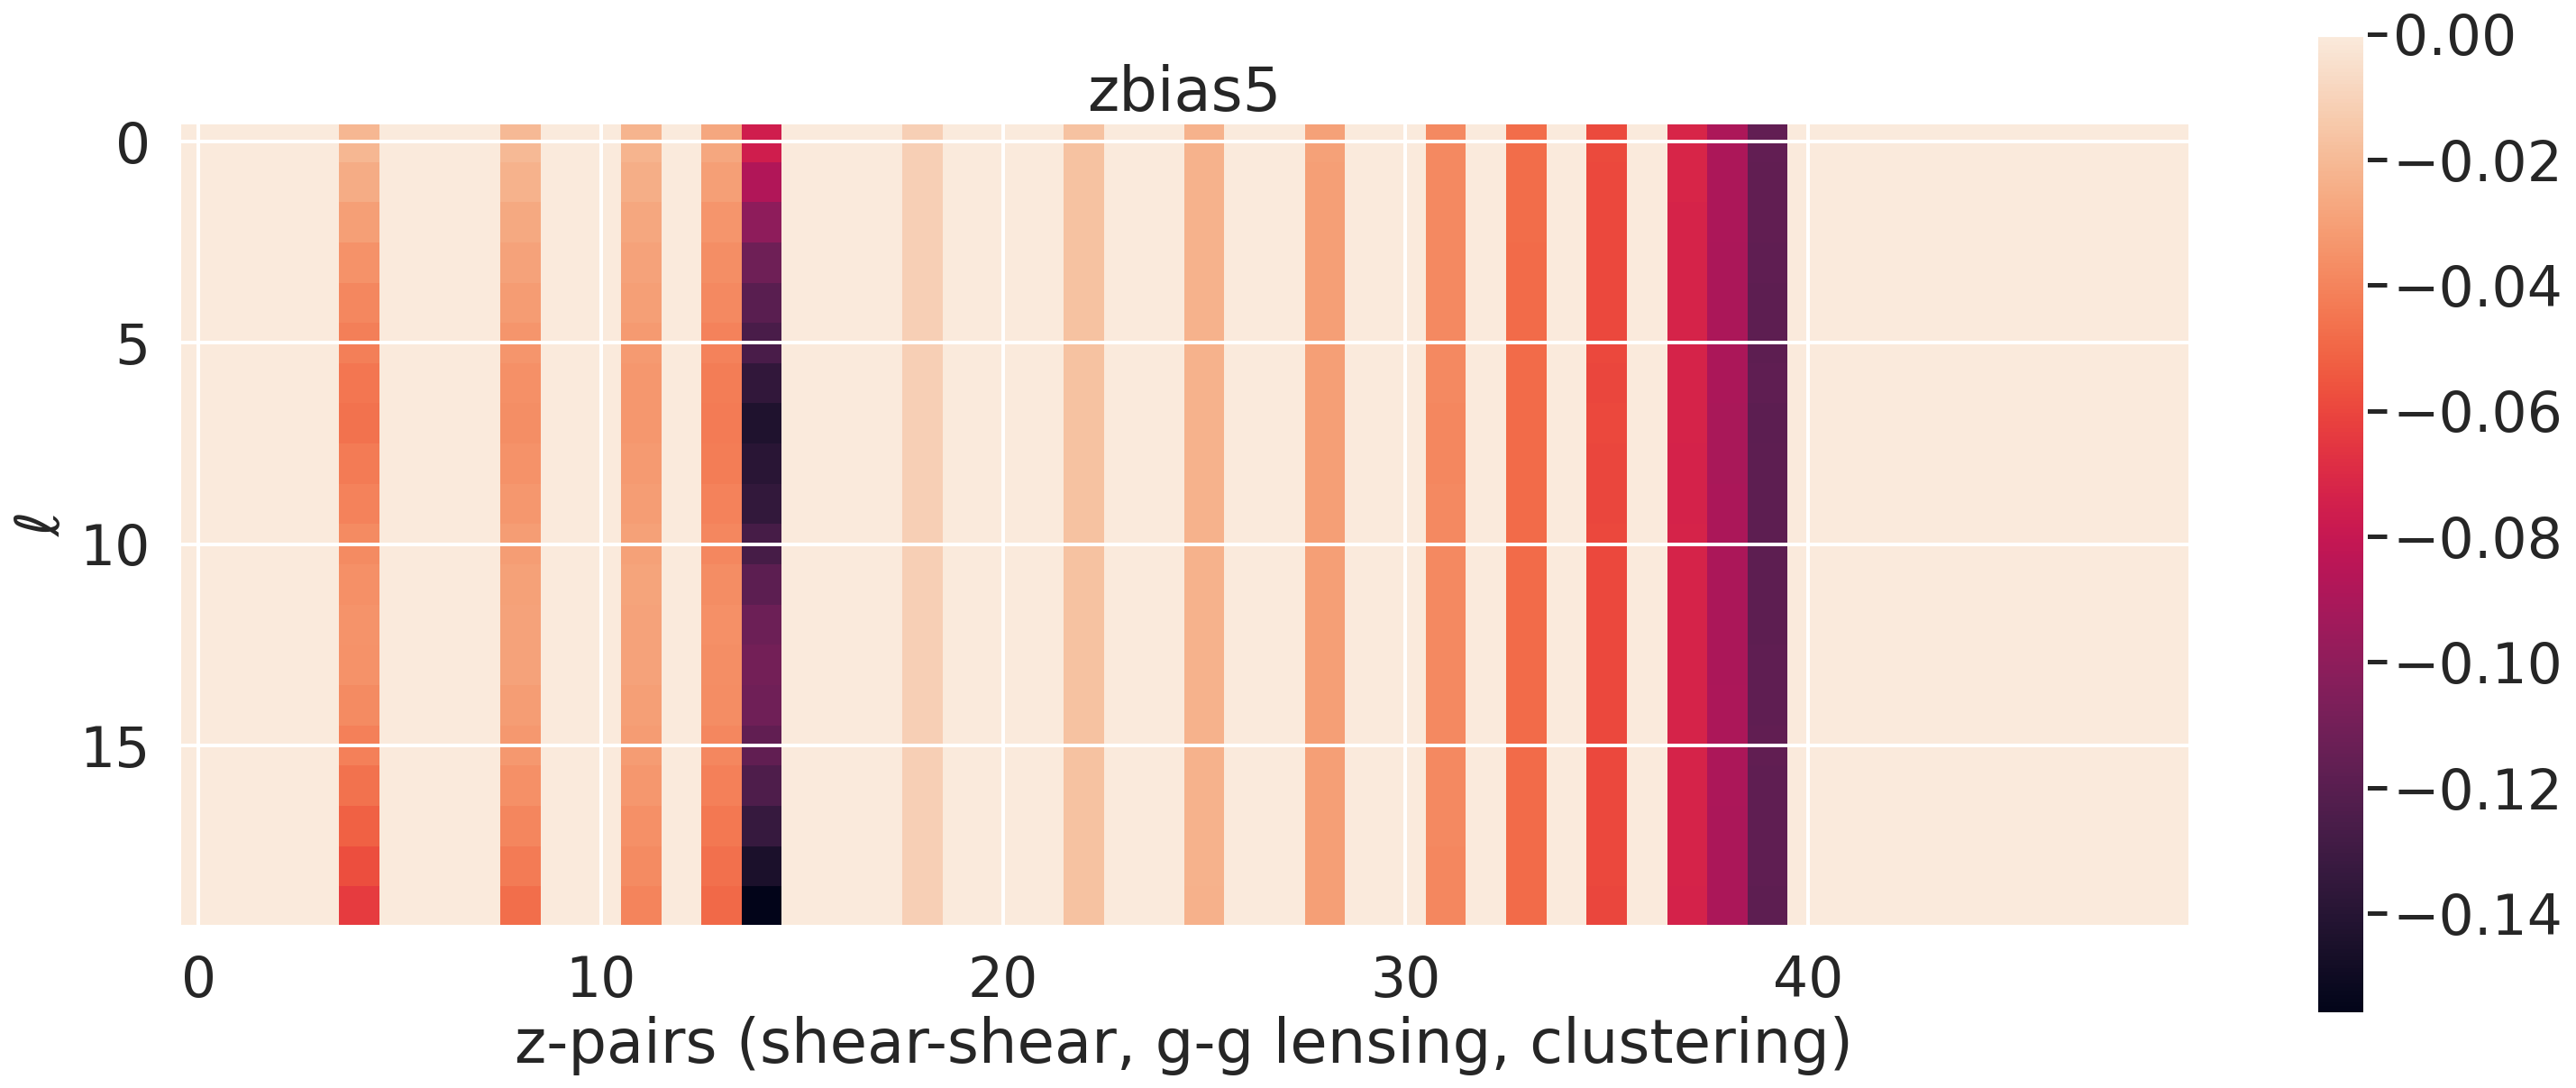

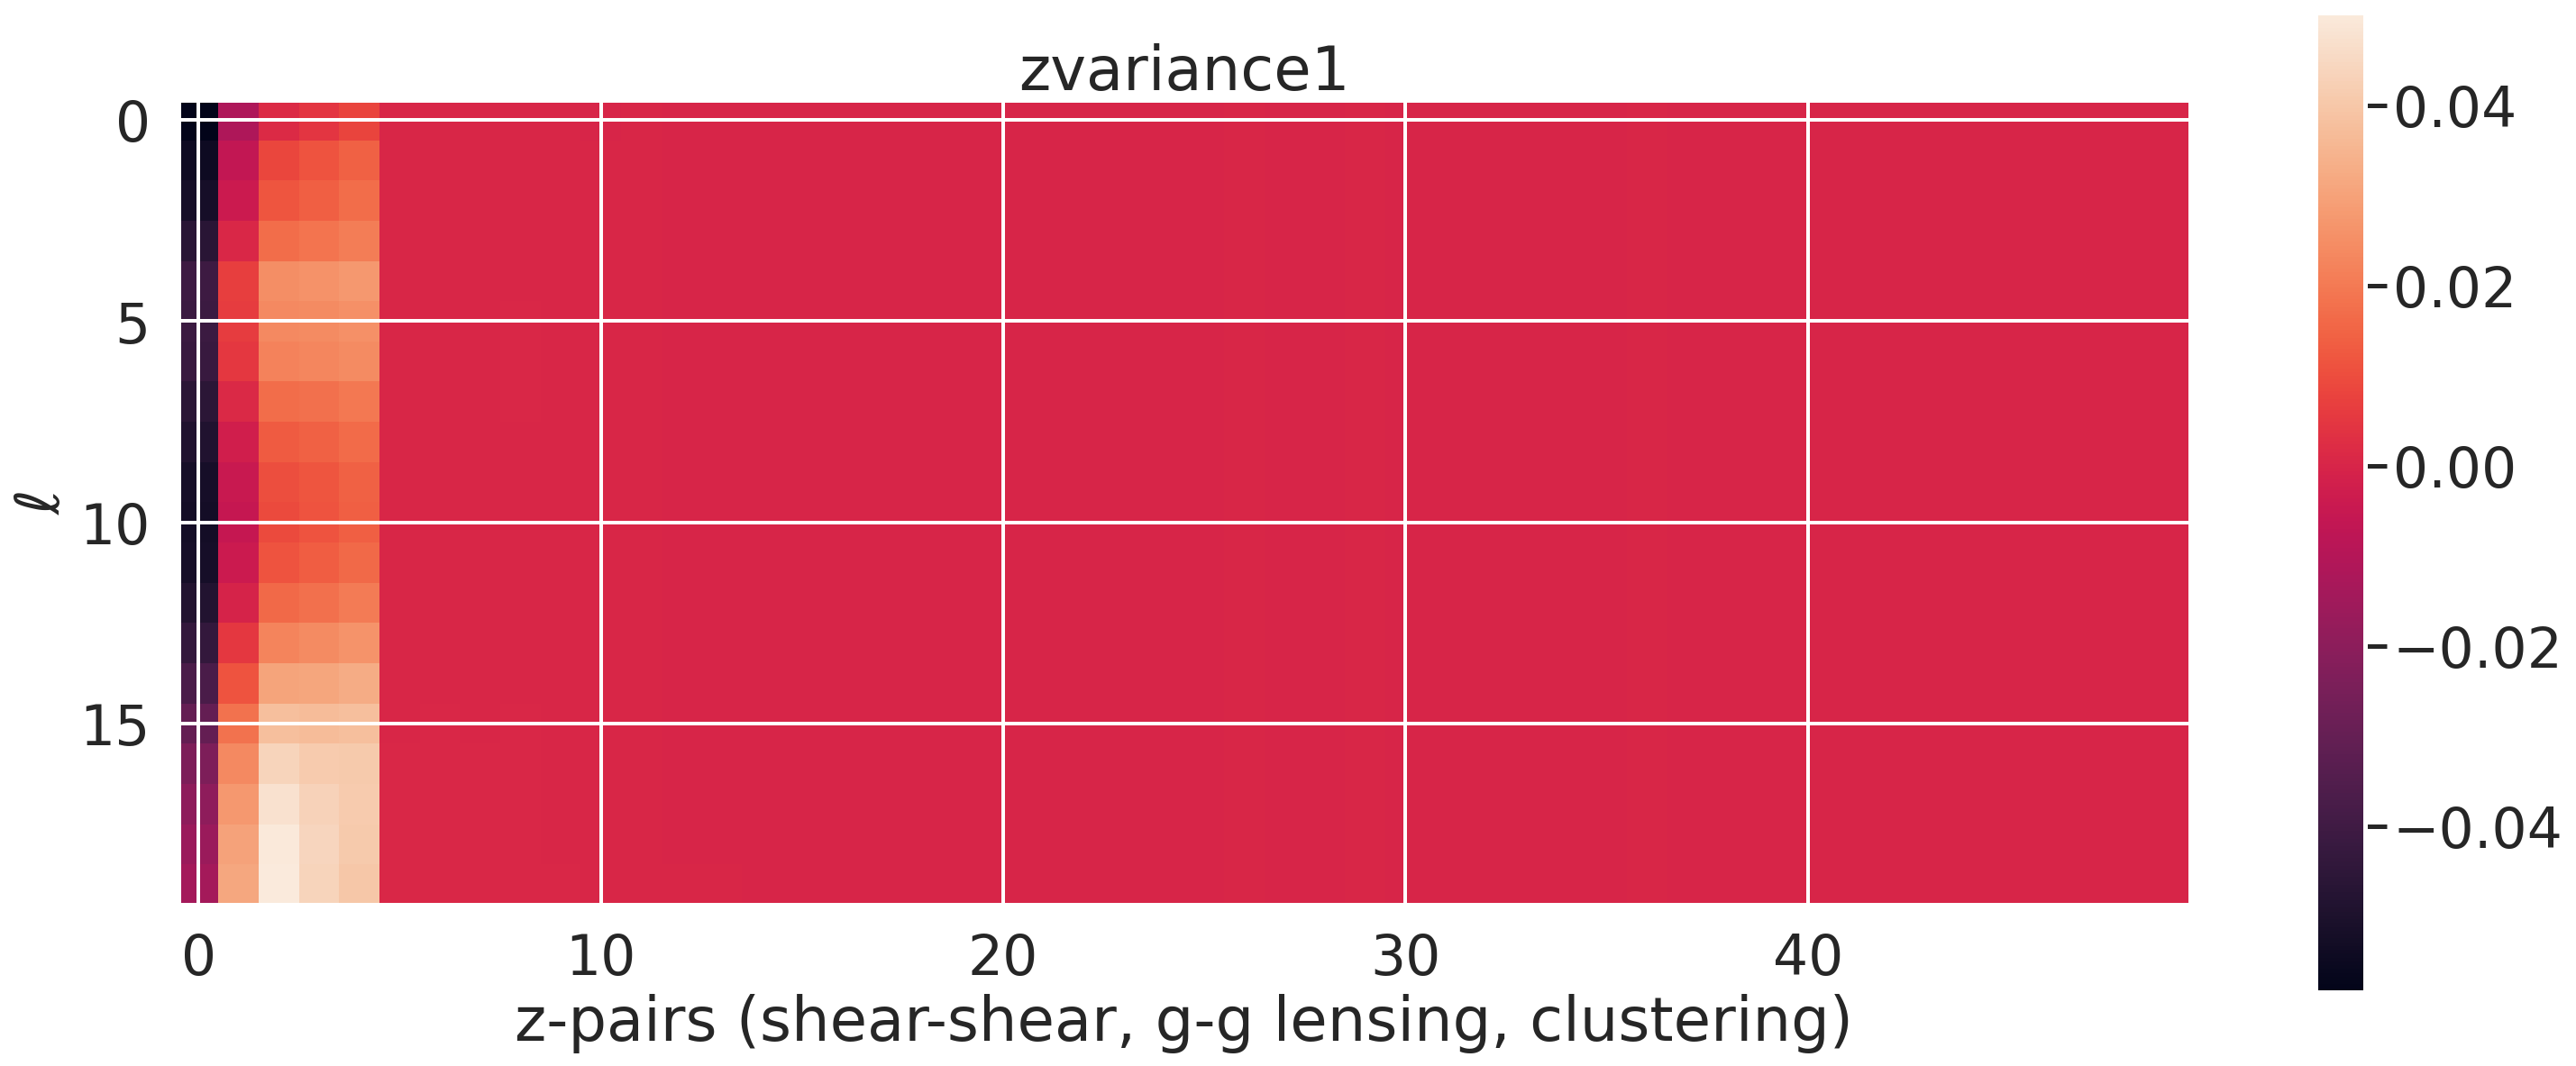

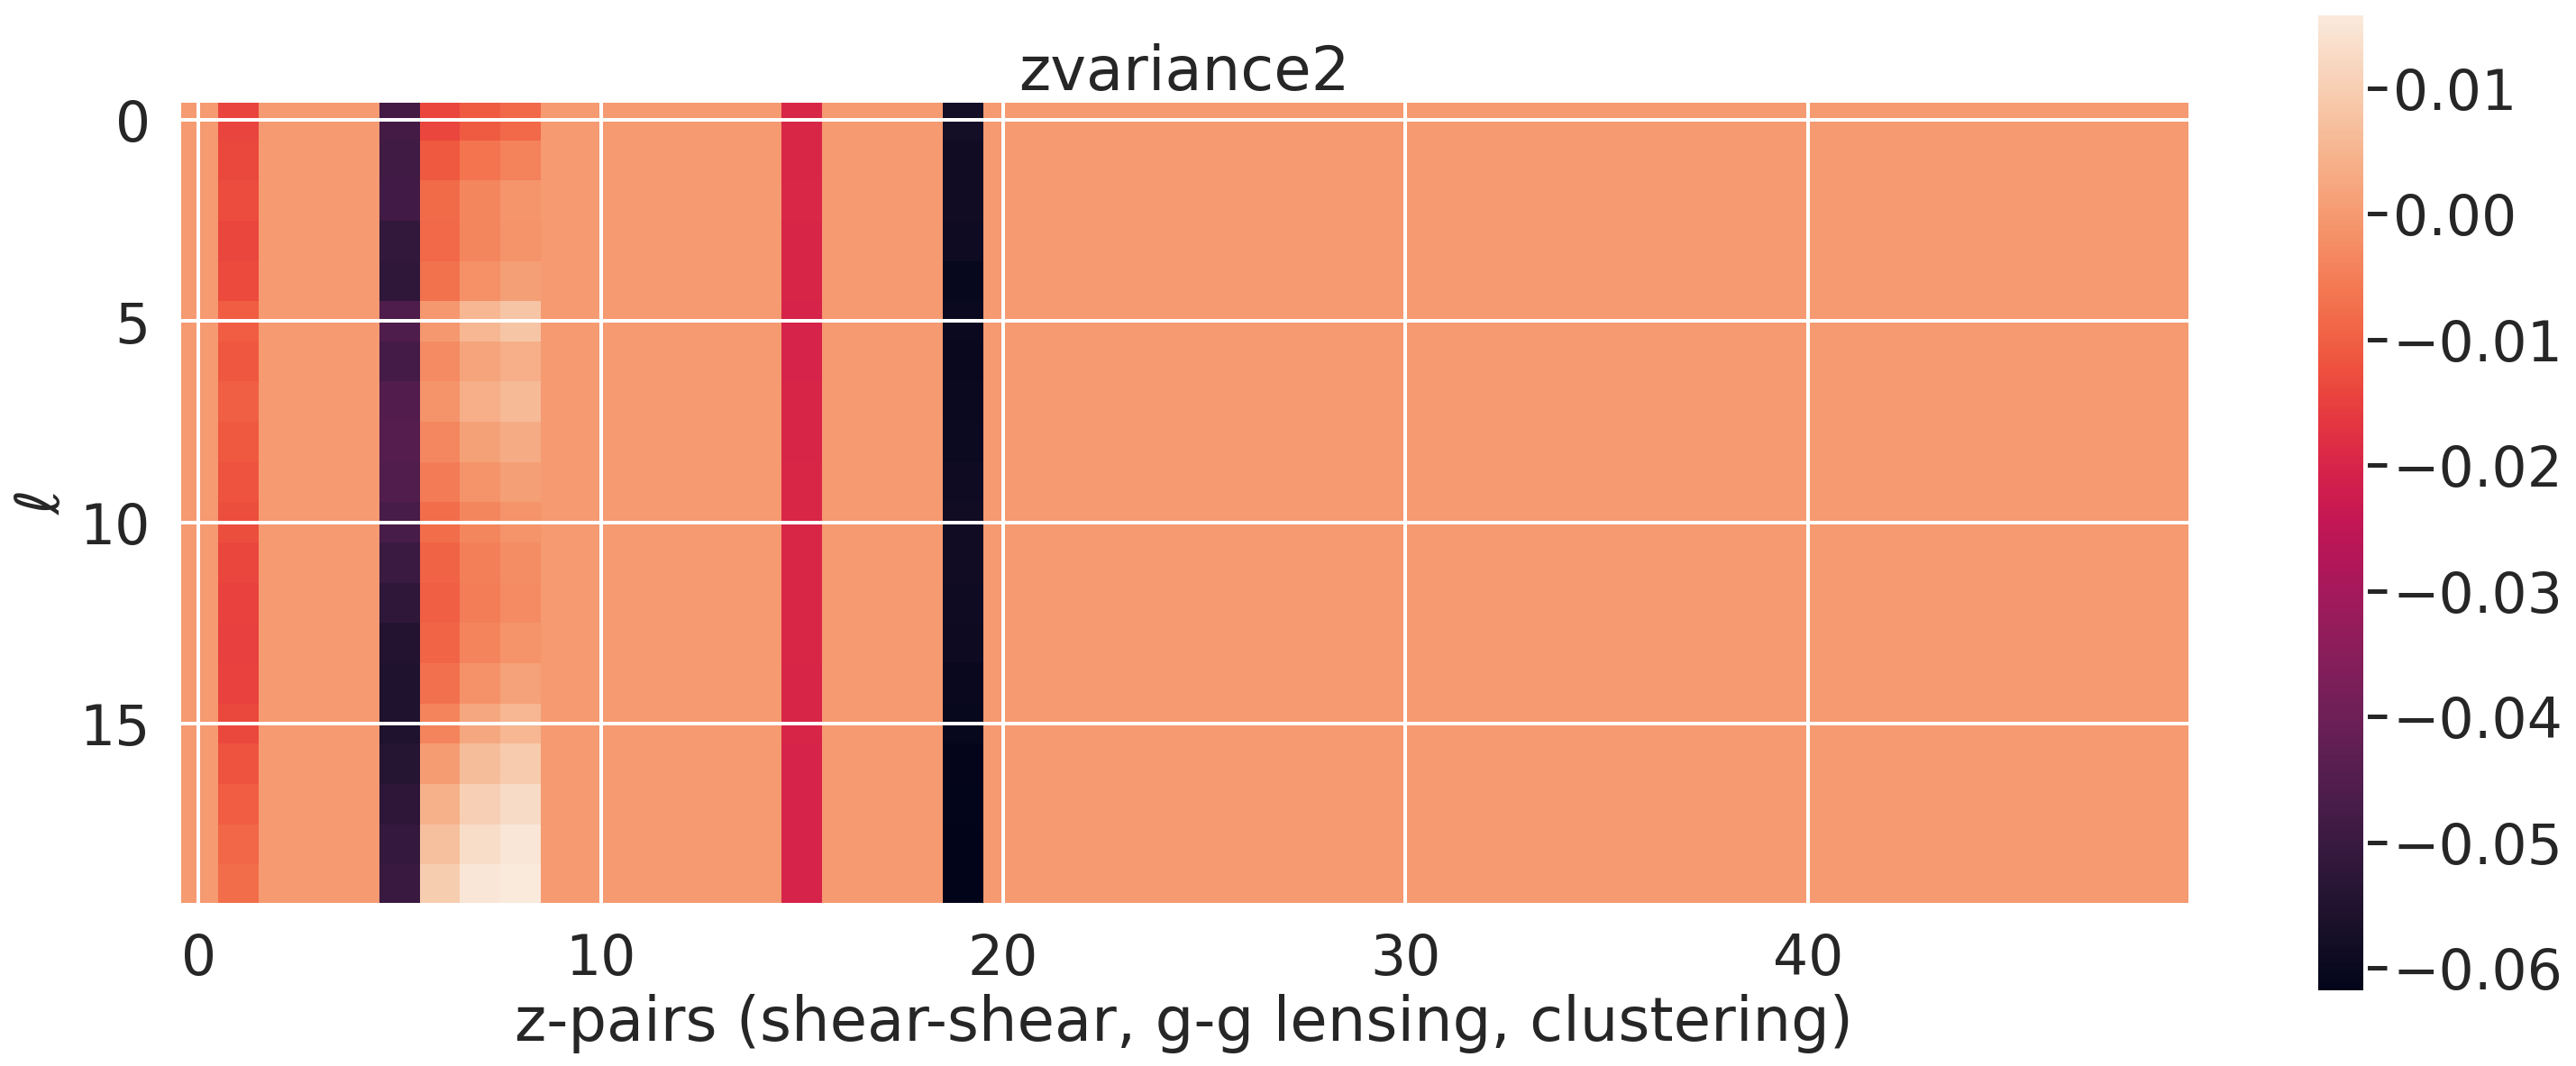

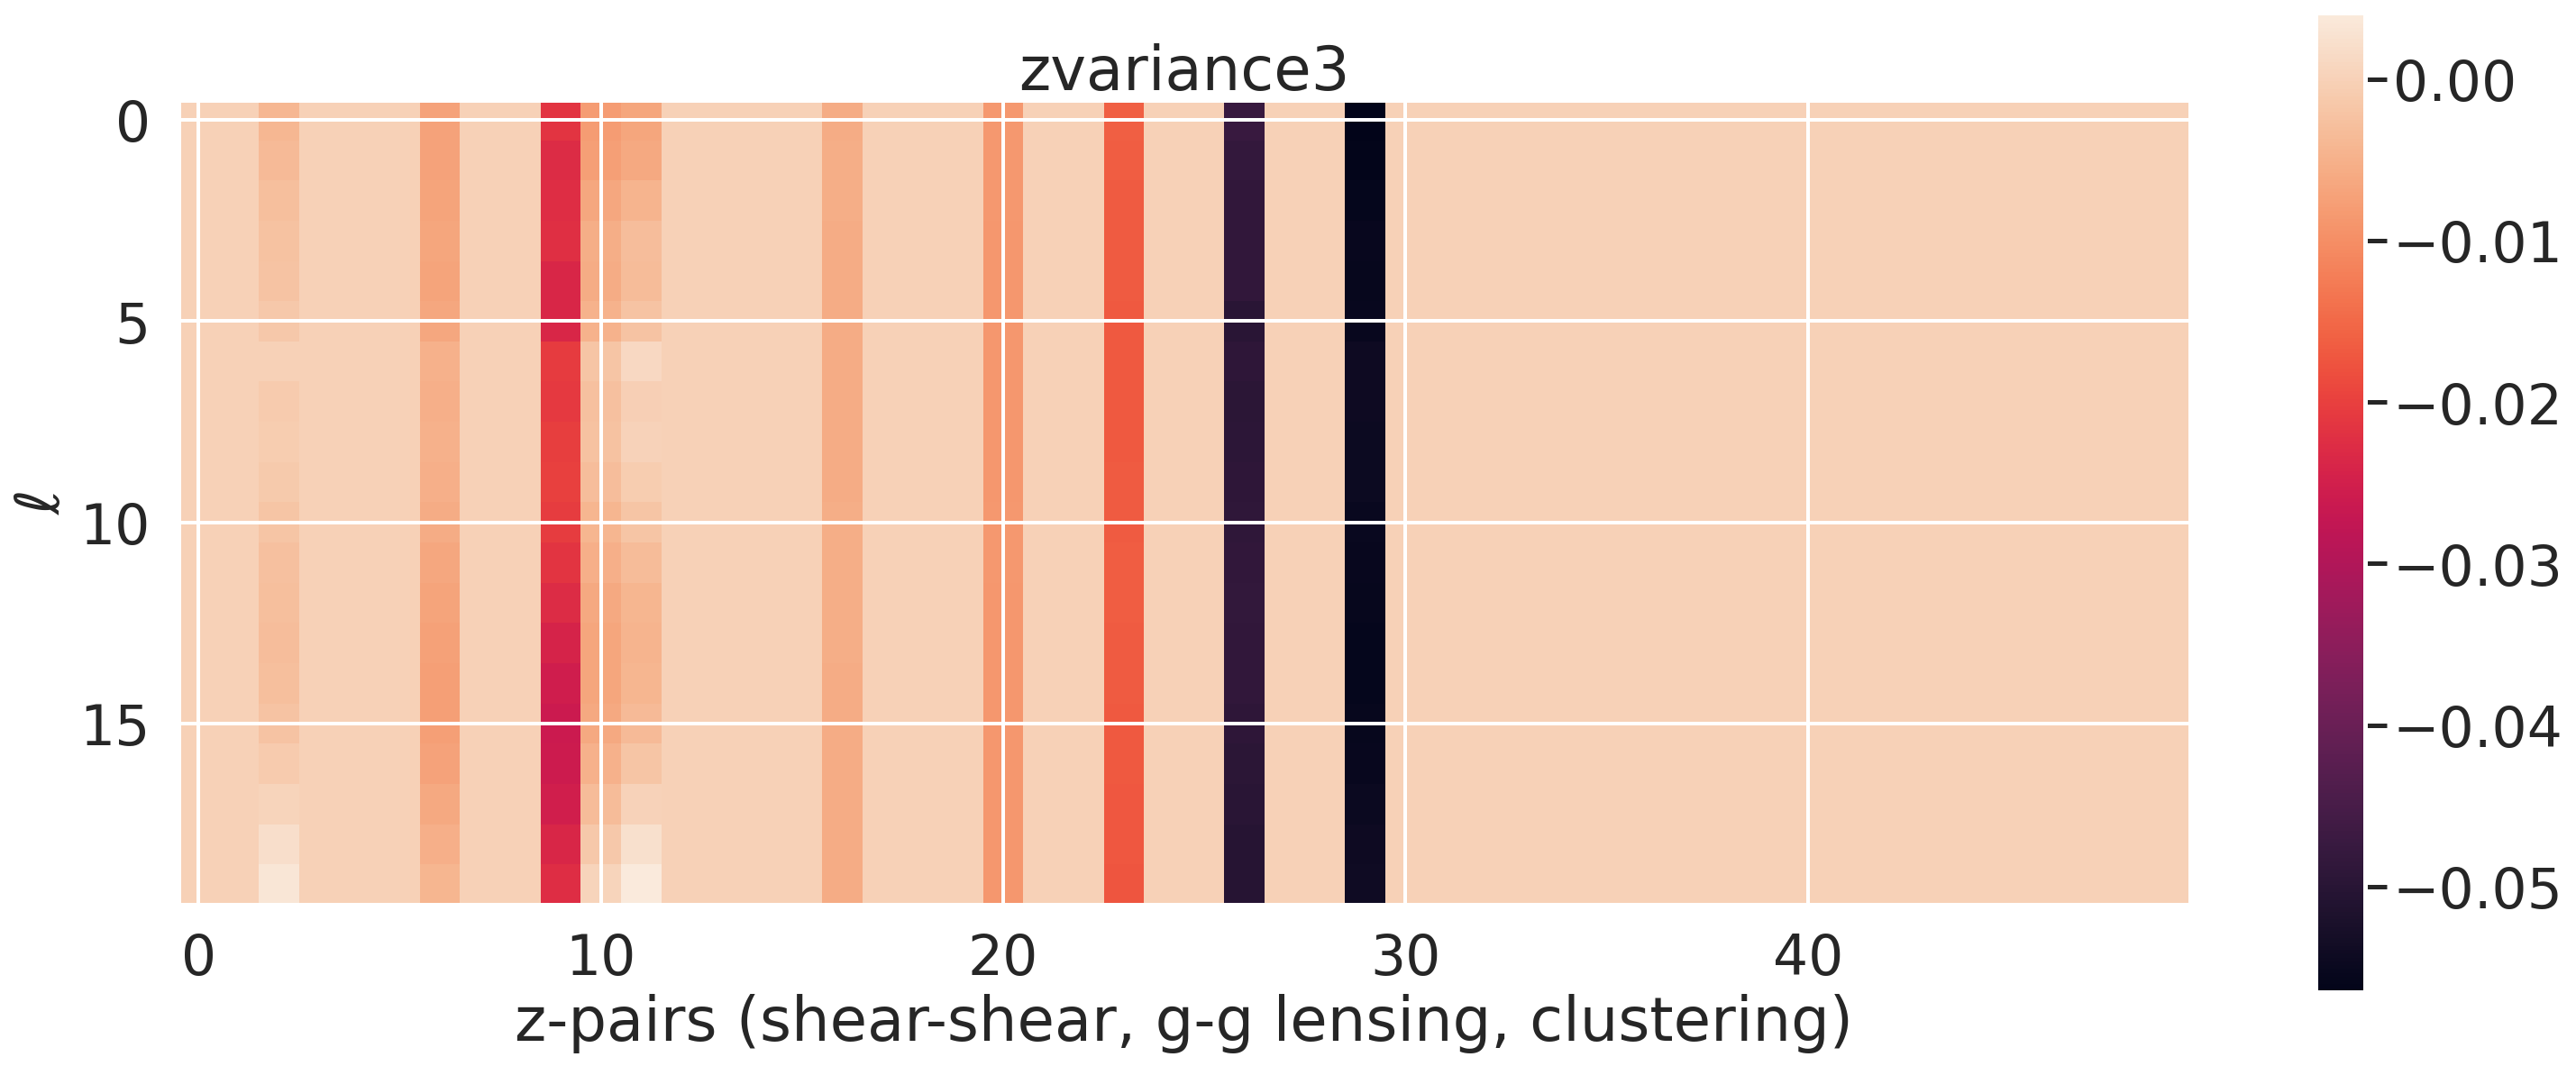

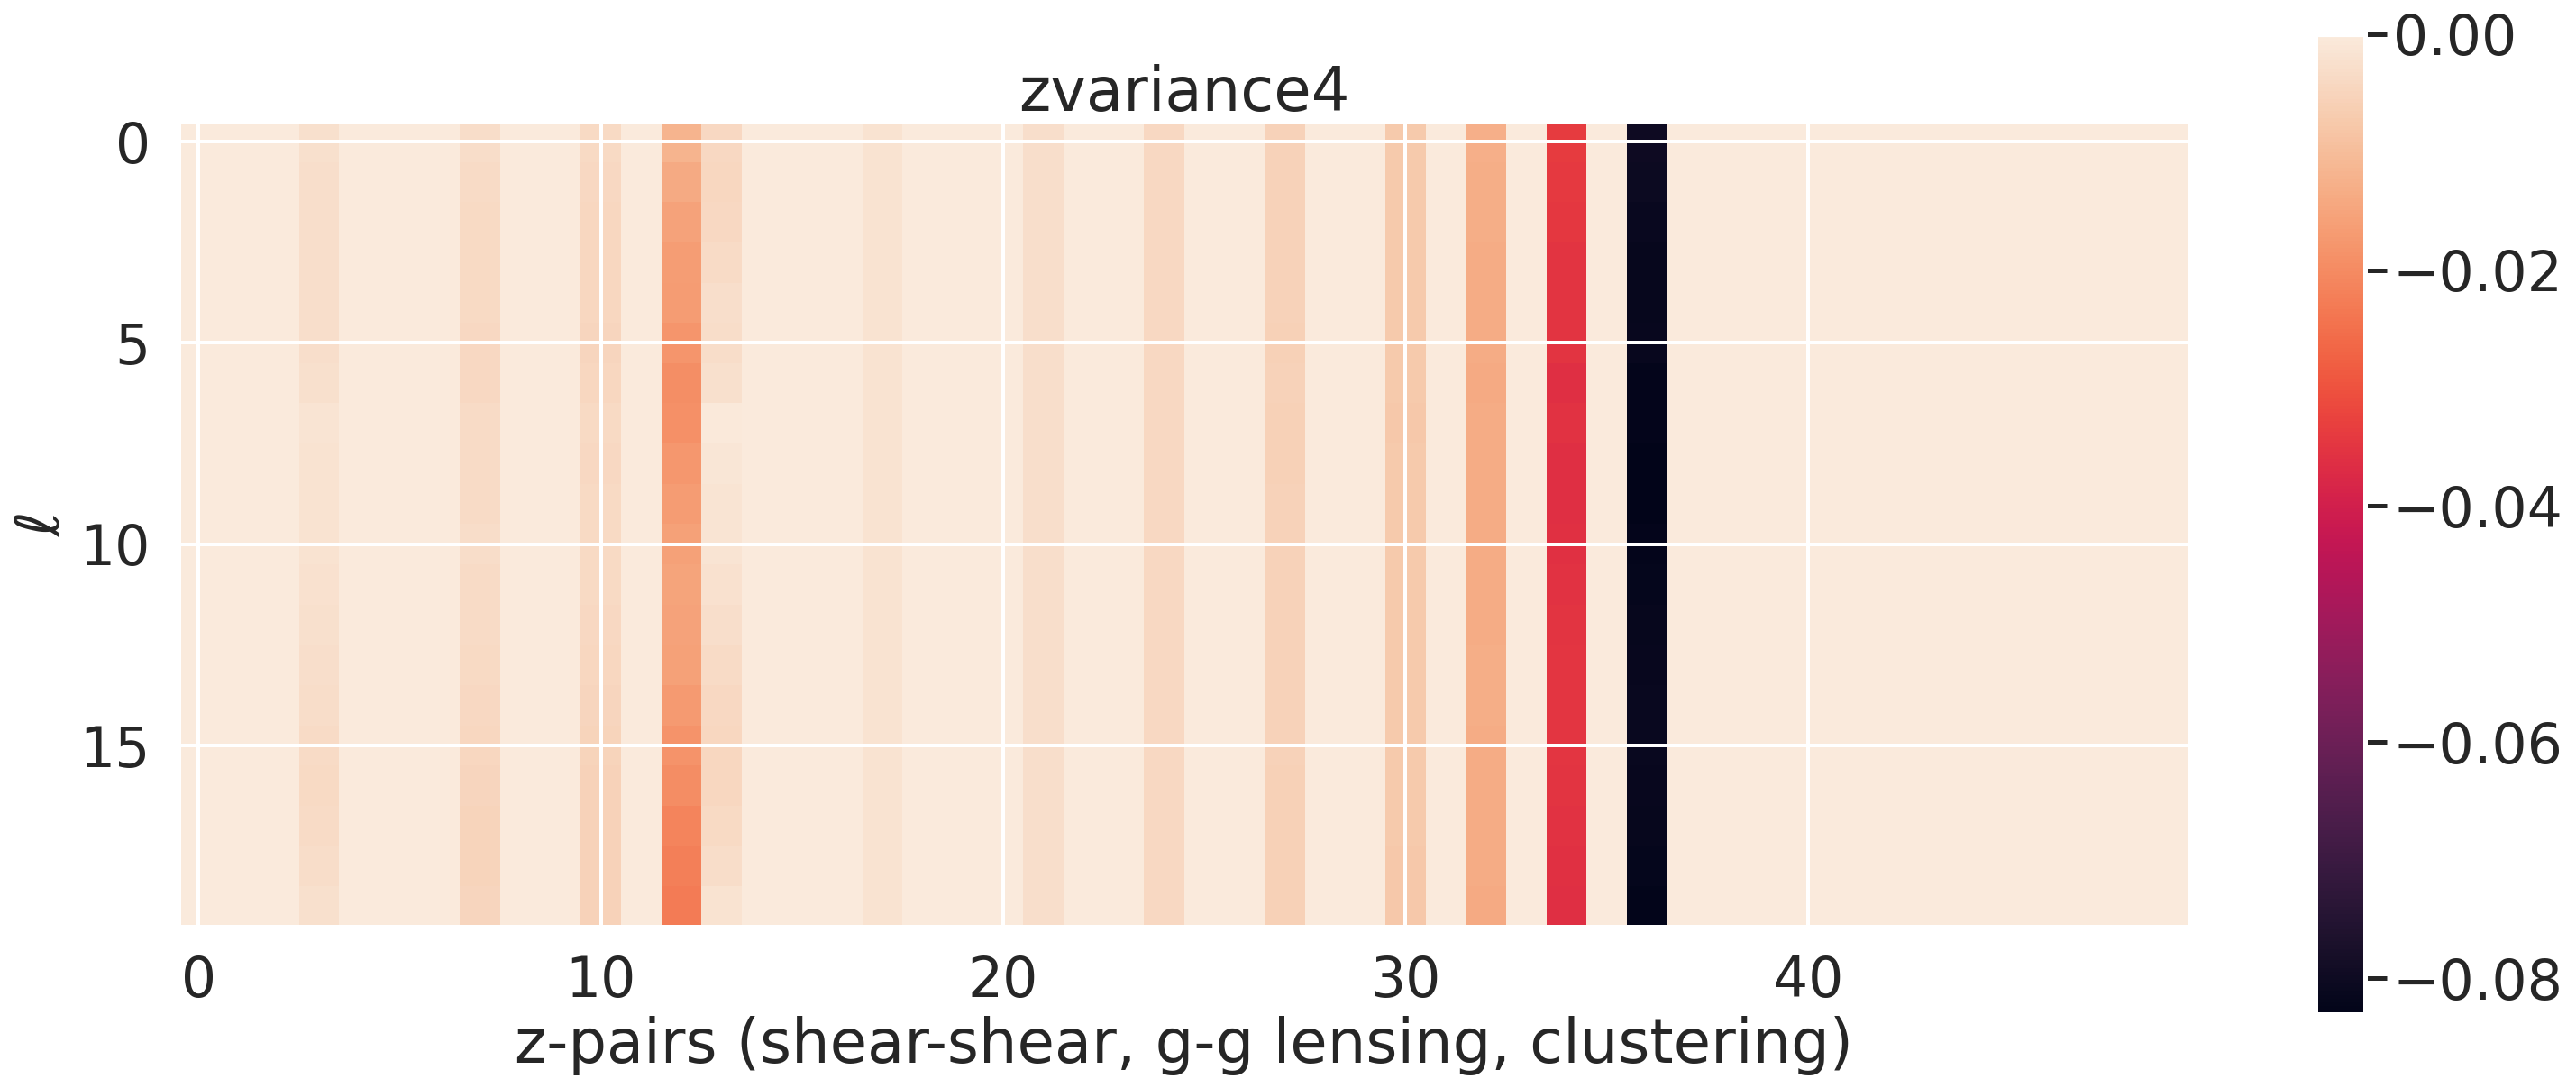

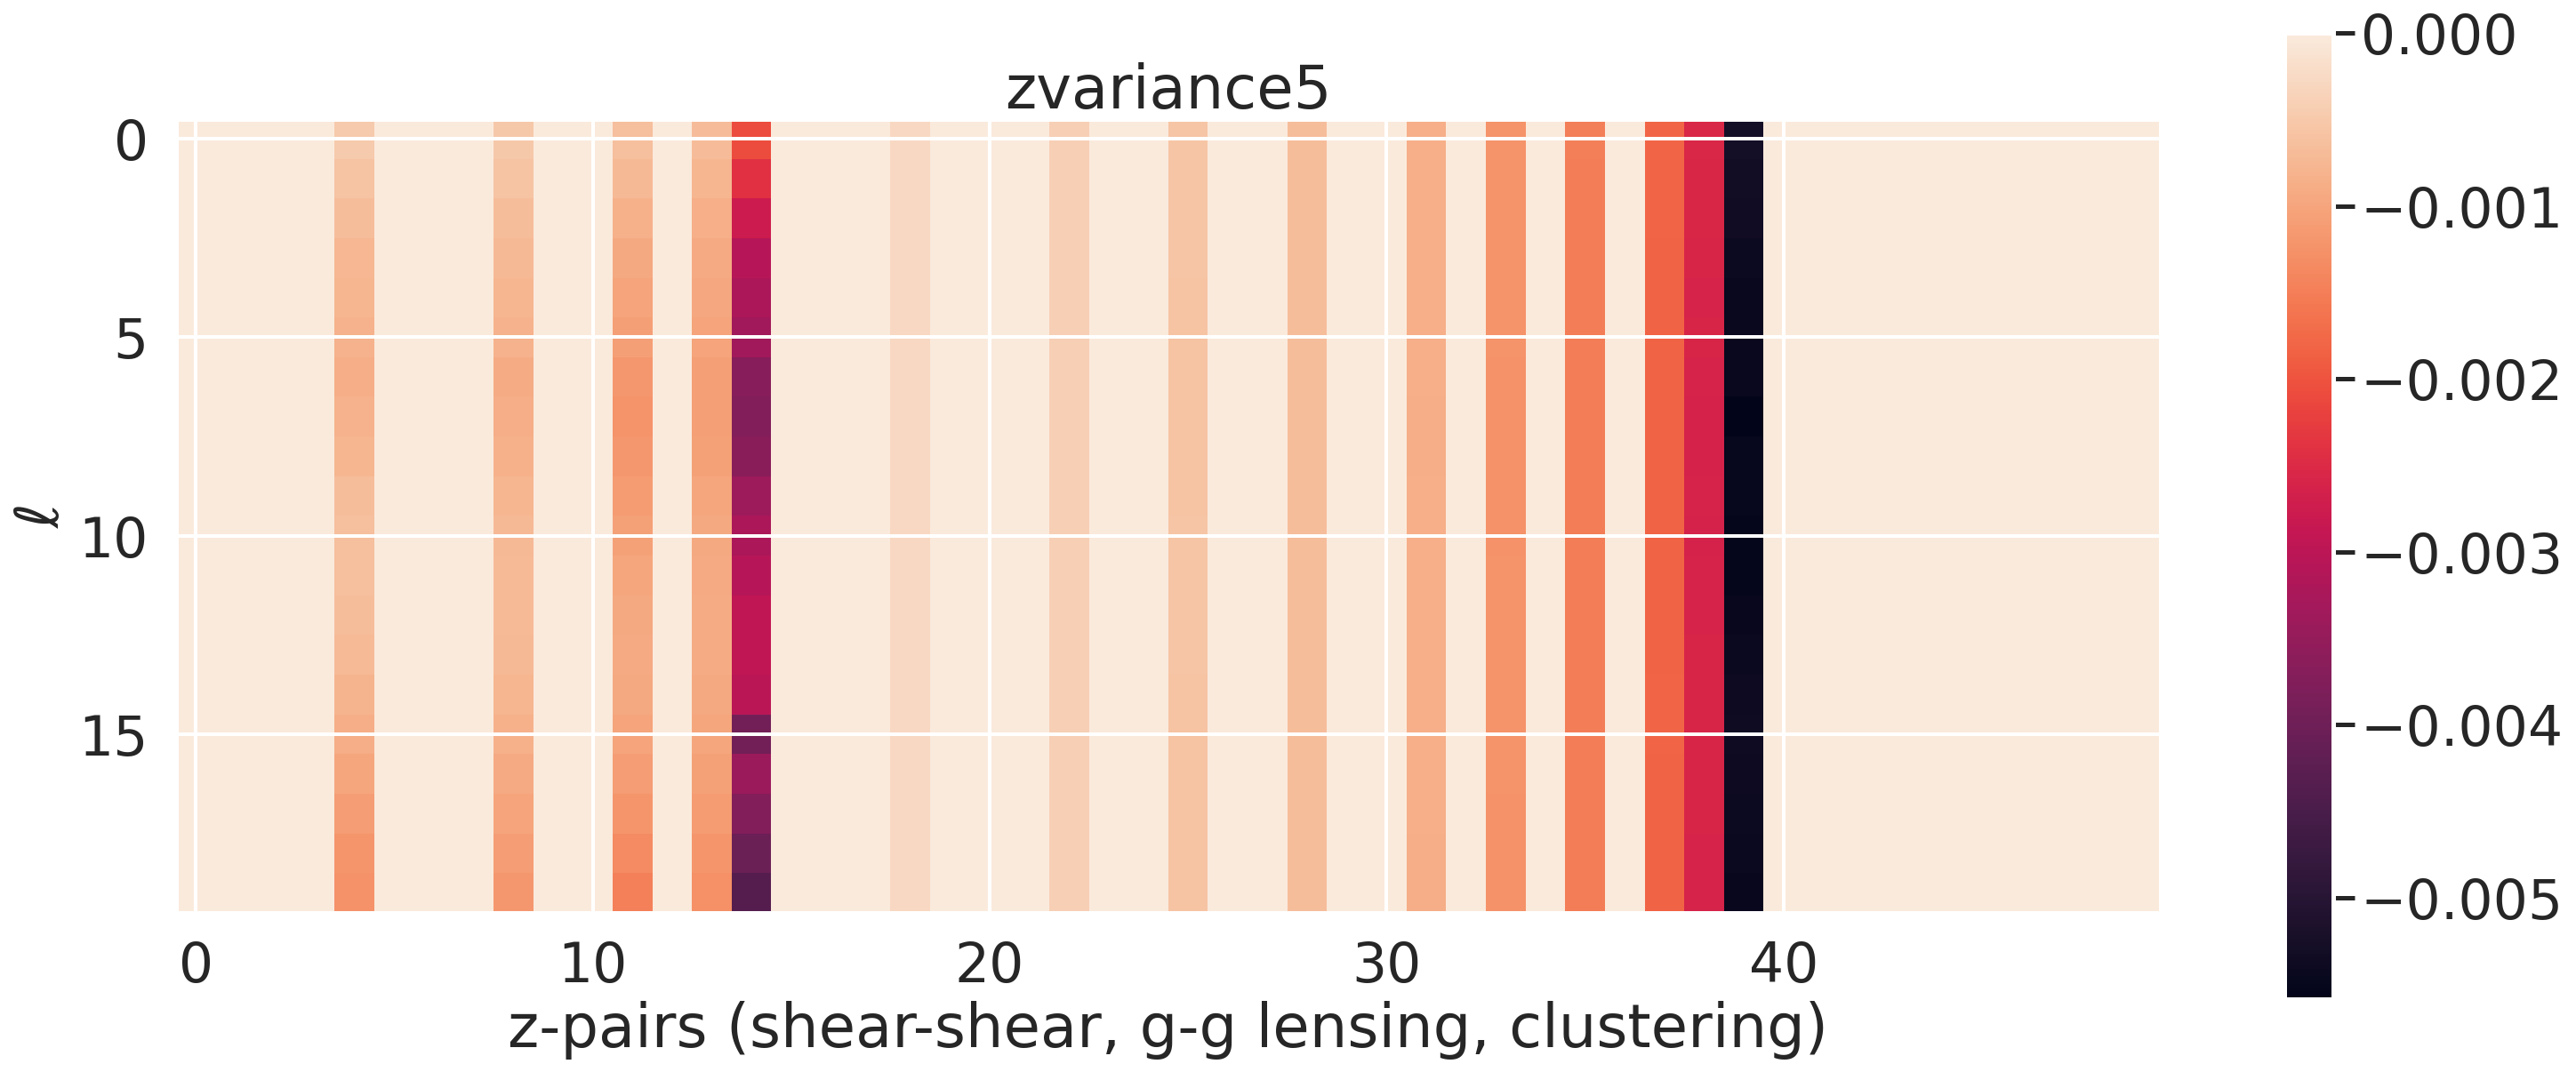

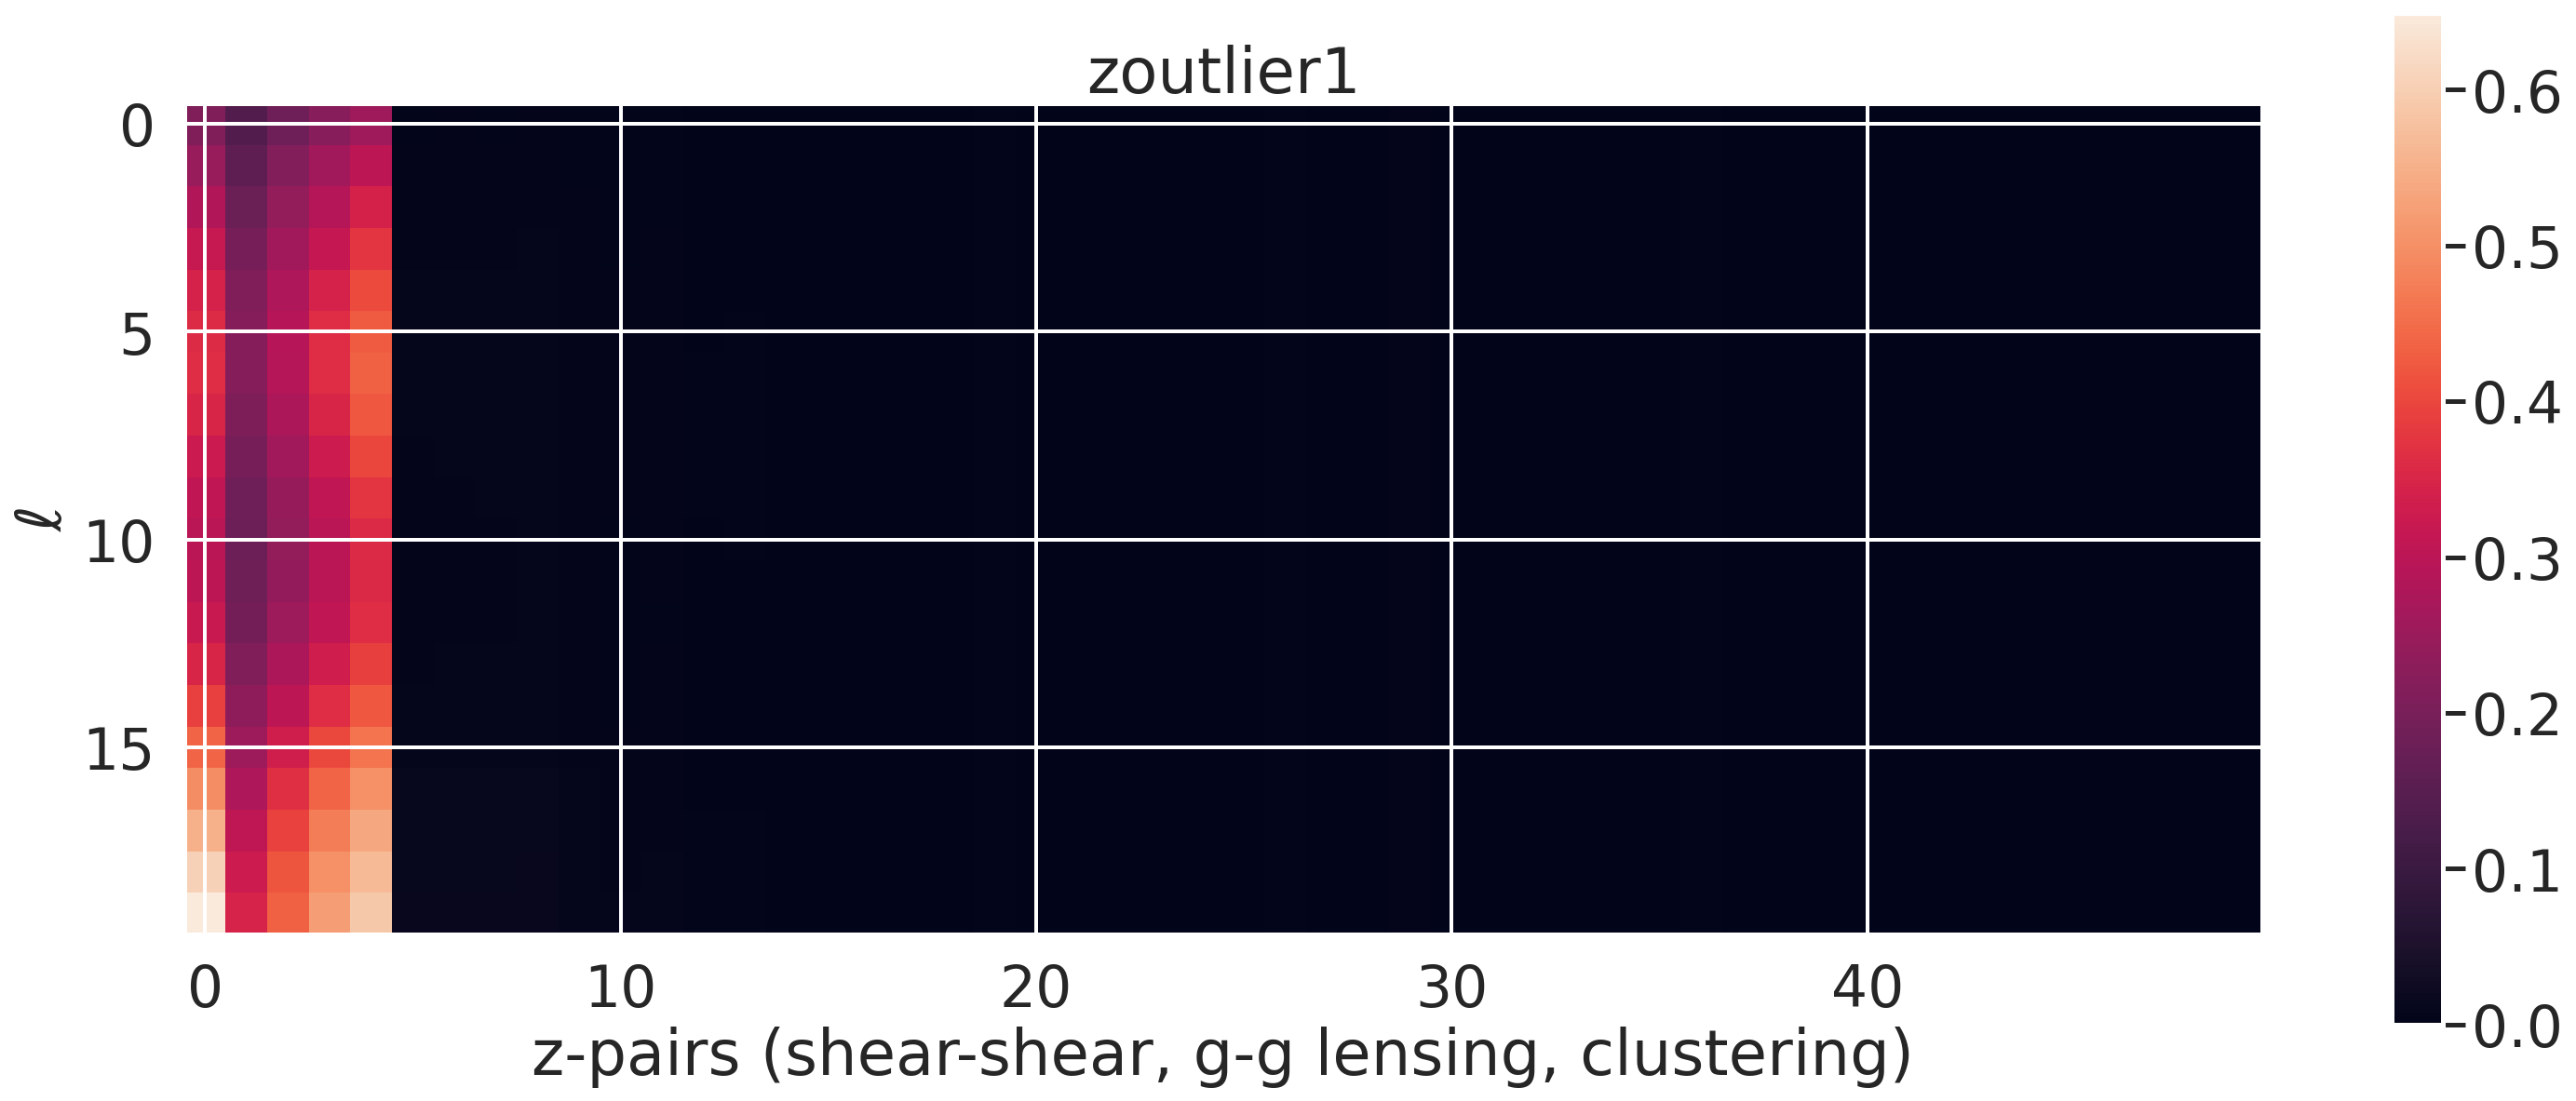

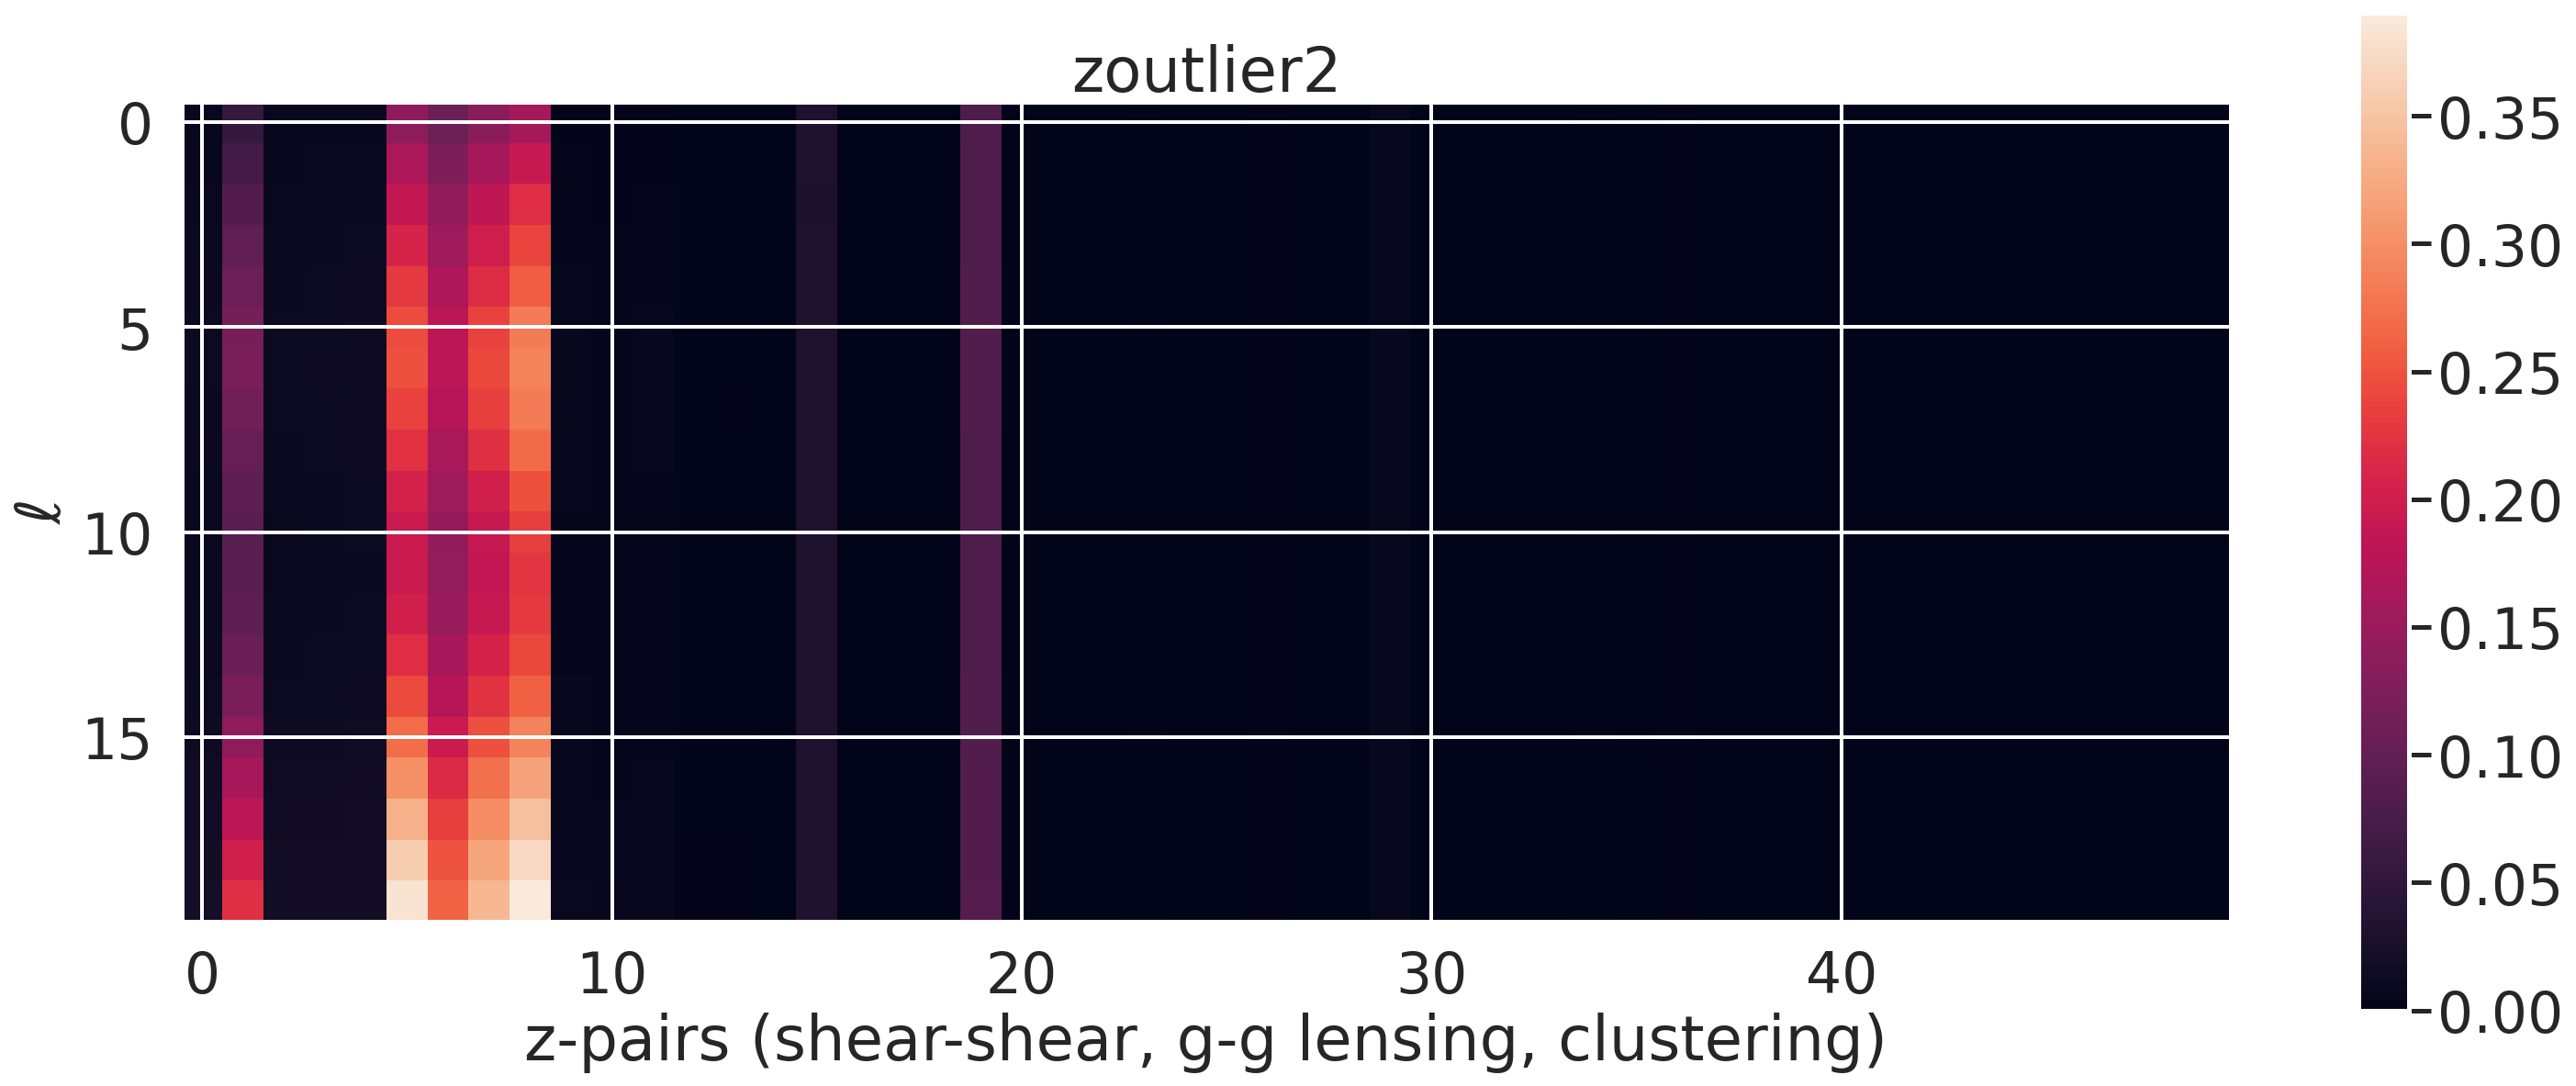

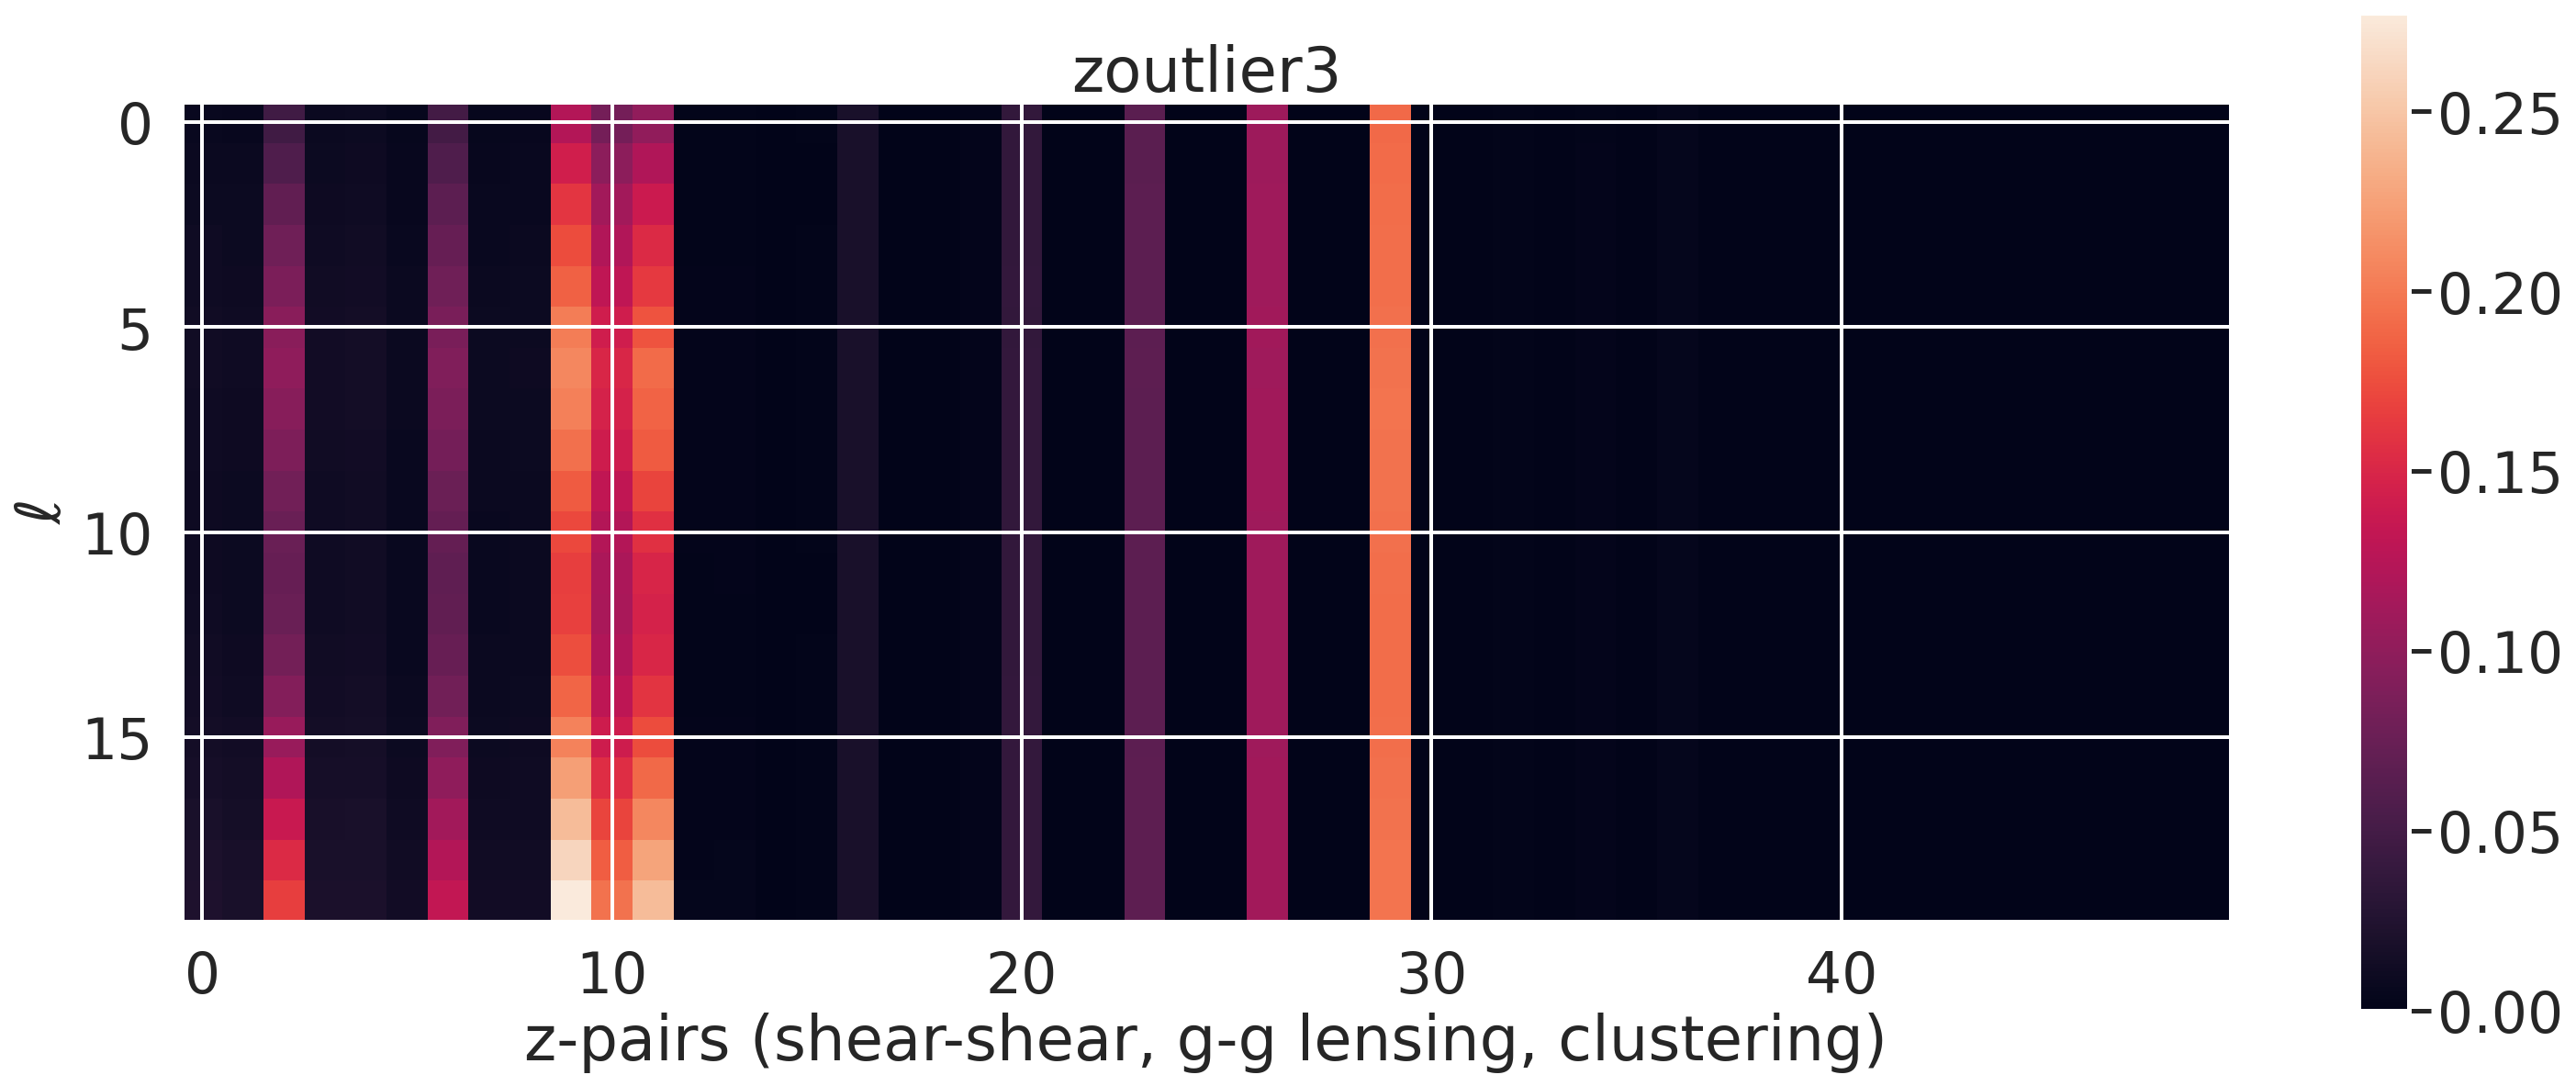

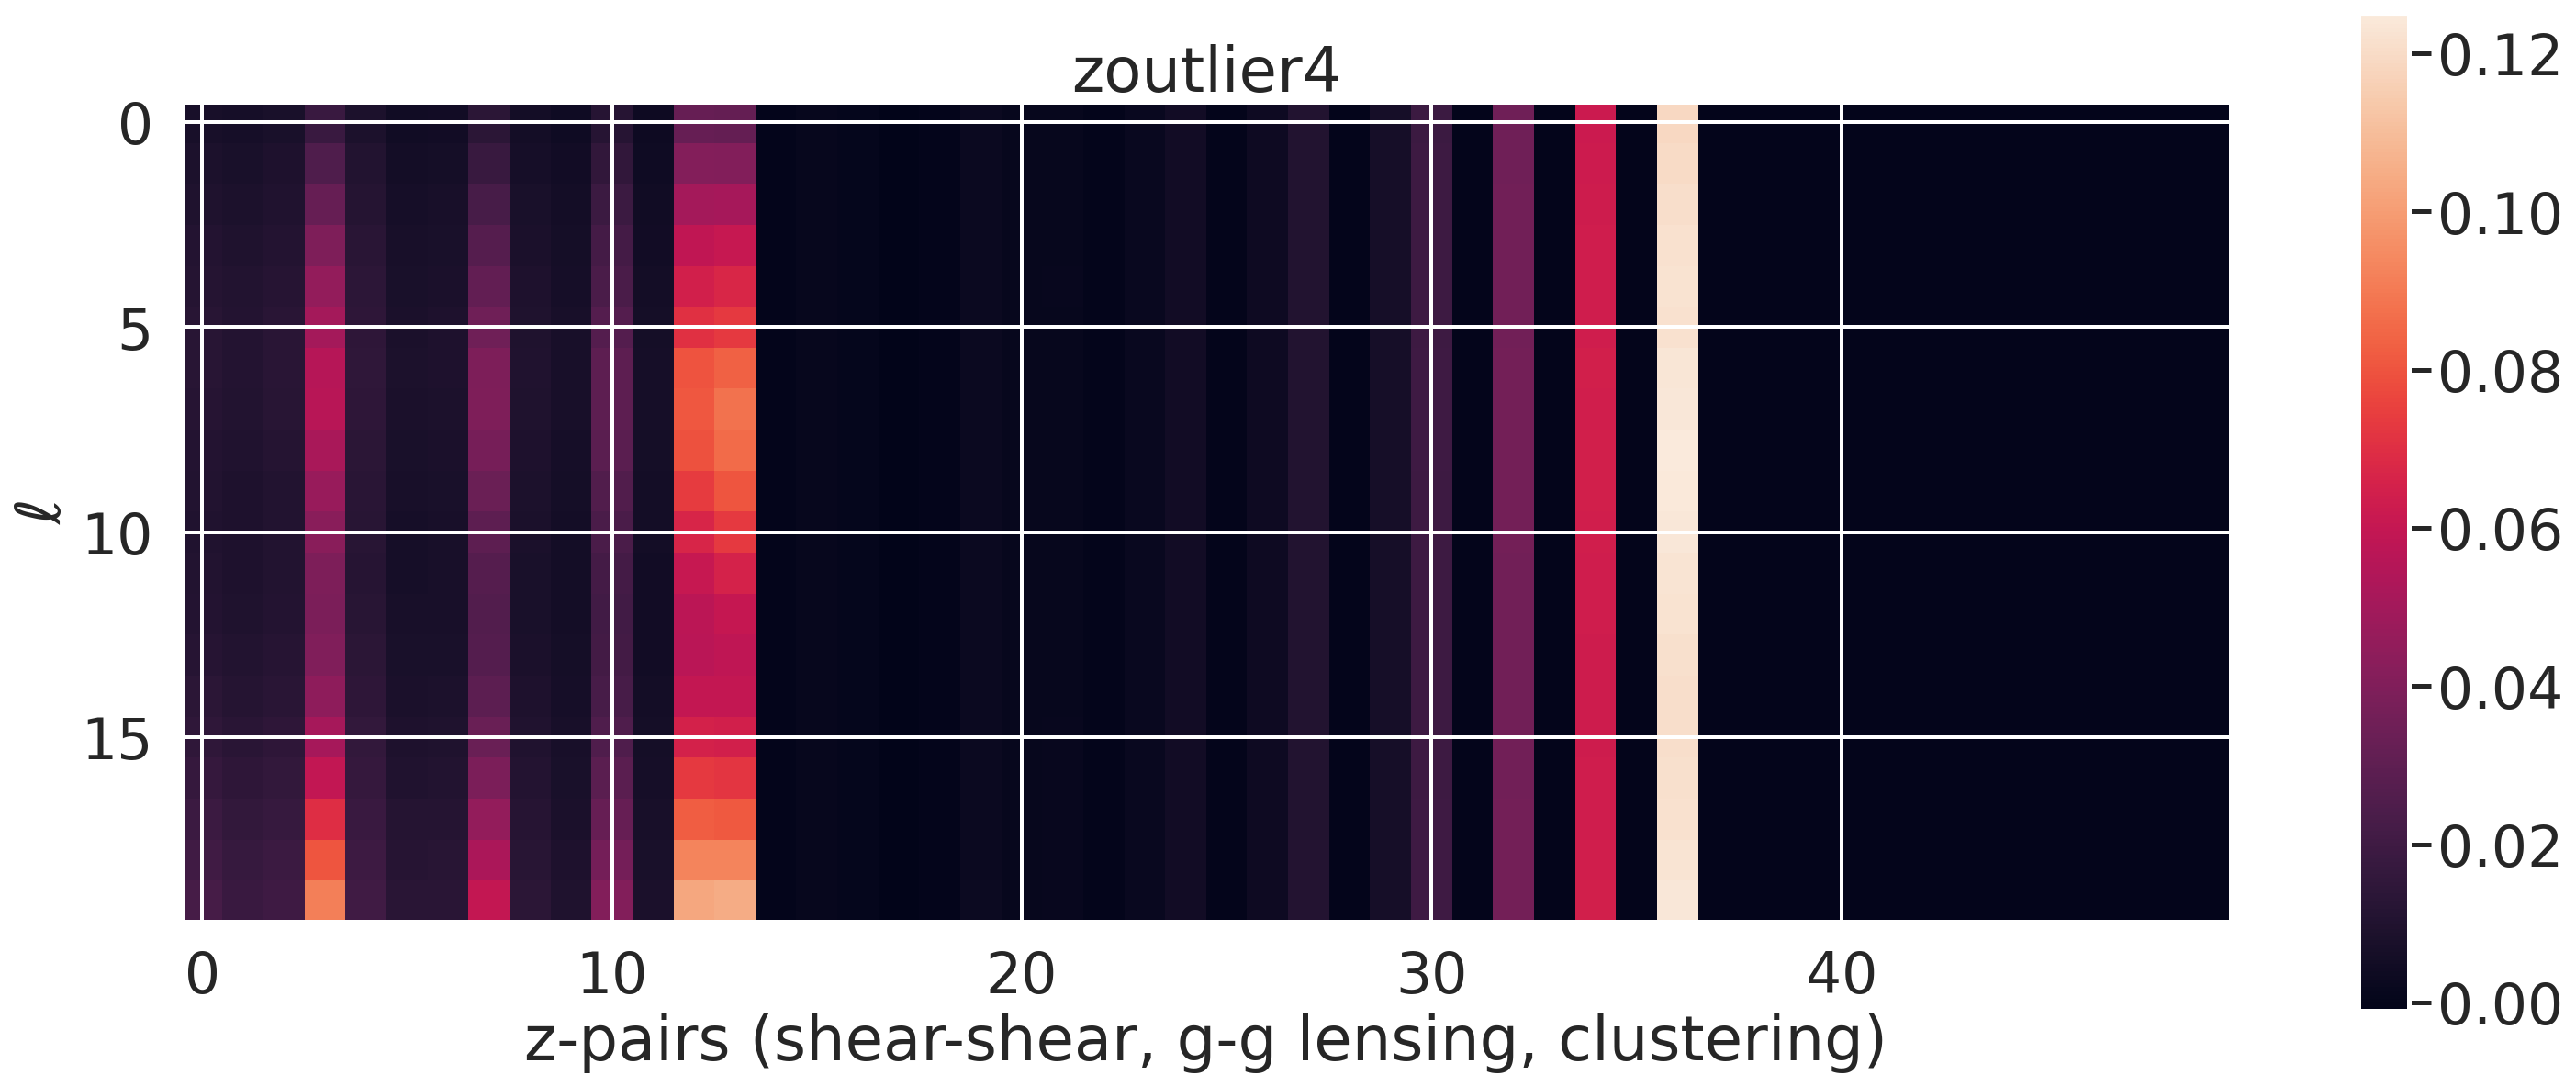

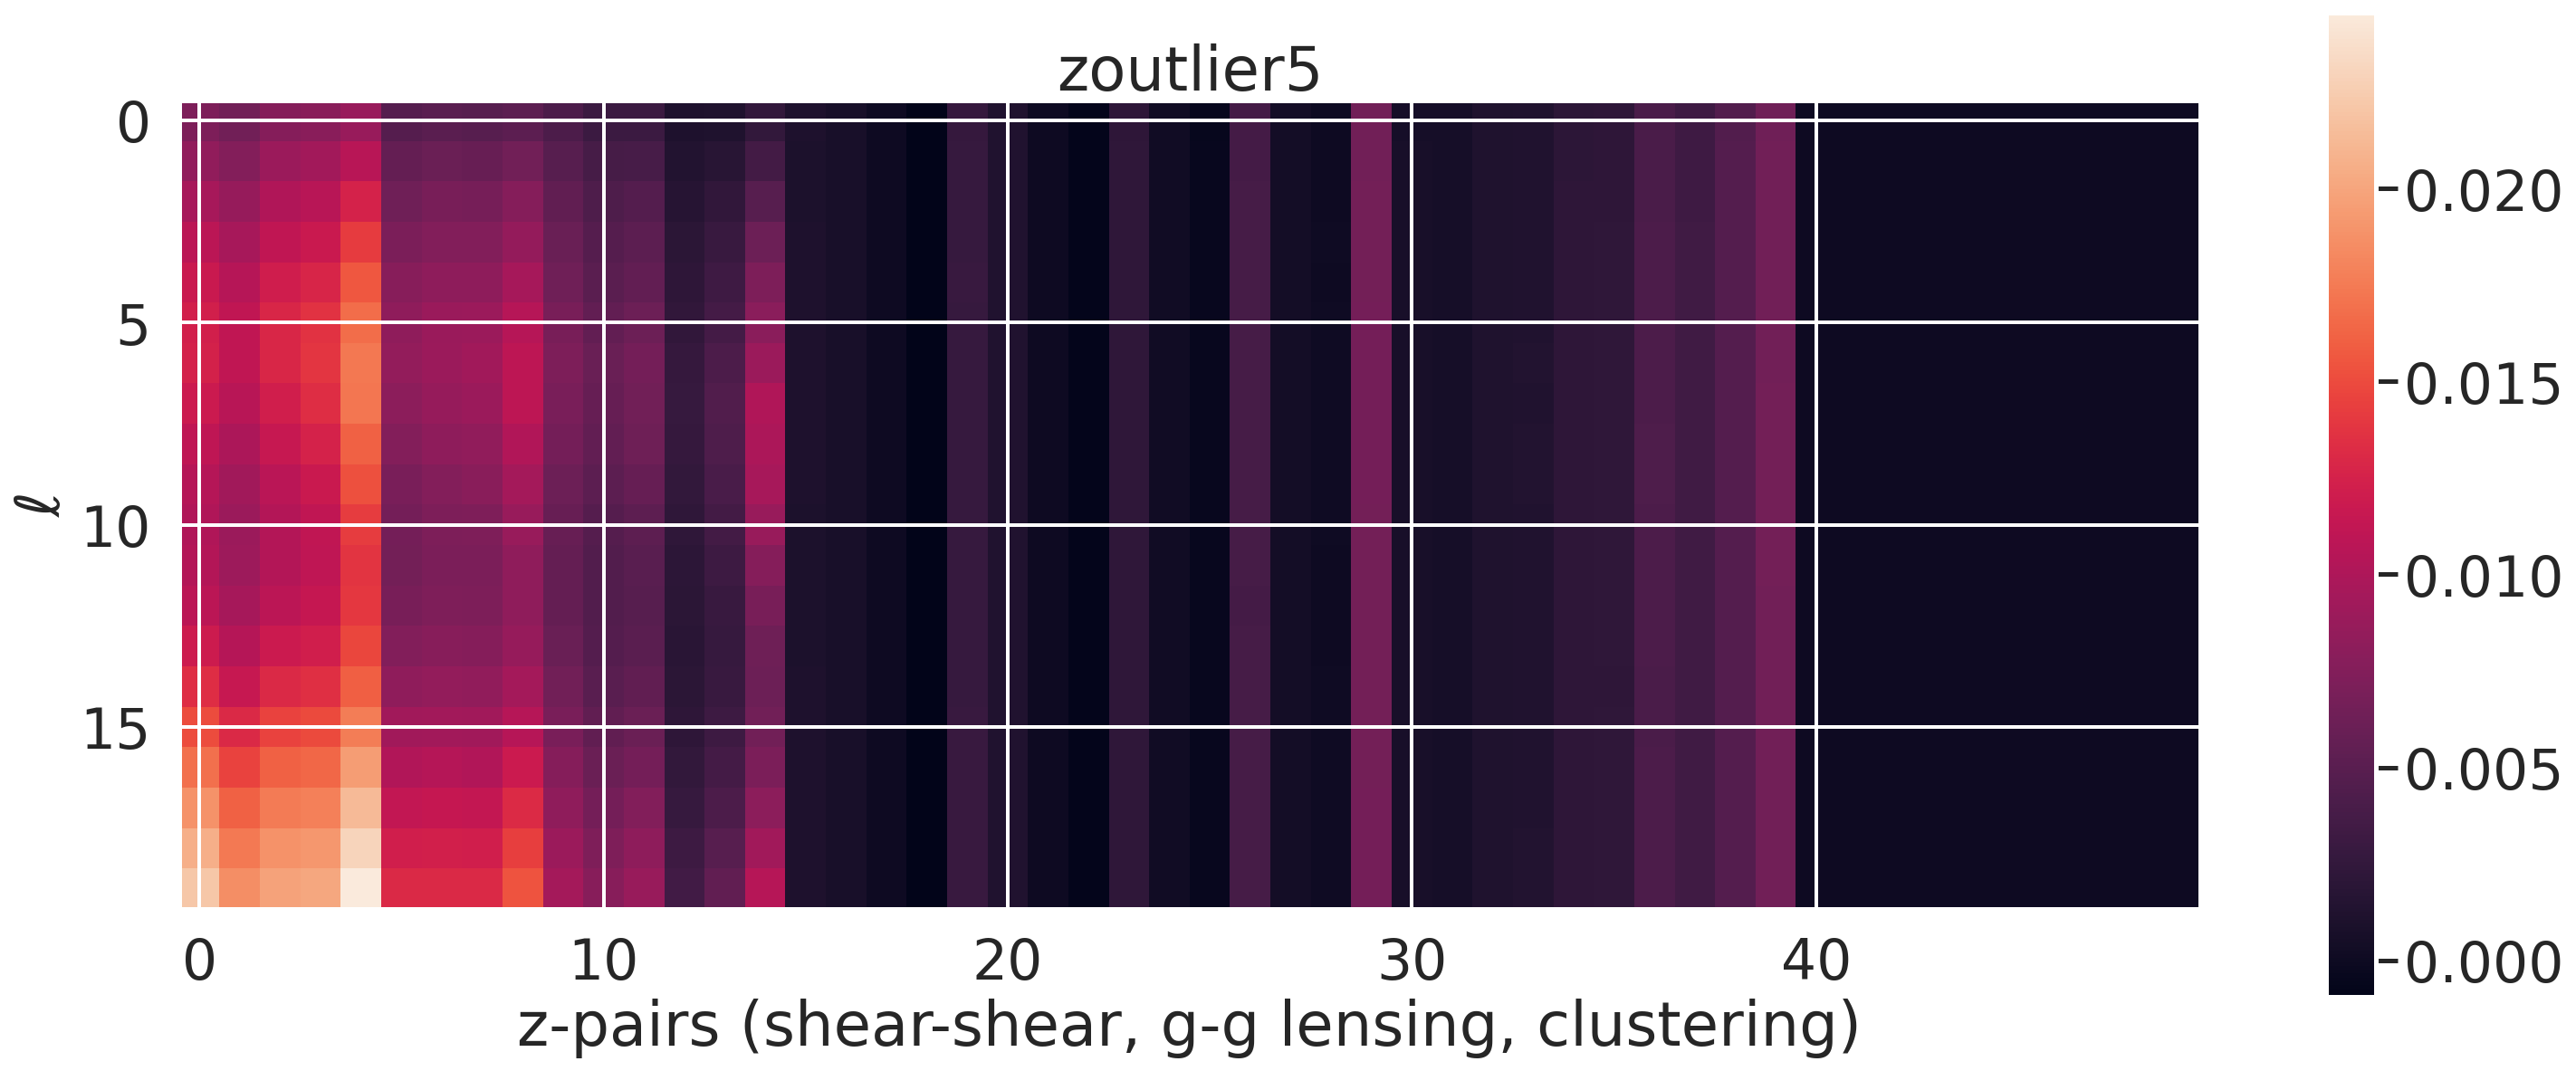

In [127]:
for k, v in derivs_3.items():
    plt.figure()
    plt.imshow(np.array(v)/np.vstack((obj.ShearShearFid, obj.PosShearFid, obj.PosPosFid)).T)
    plt.colorbar()
    plt.xlabel('z-pairs (shear-shear, g-g lensing, clustering)')
    plt.ylabel(r'$\ell$')
    plt.title(k)